# Jupyter Notebook to Analyize and Visualize BSR Screen CSV data


# 1. Importing Packages Required (No input required, just run)

In [2]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
from pingouin import ttest
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [3]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
# Jessica_chooser=FileChooser(starting_directory)
MakeUp_chooser=FileChooser(starting_directory)
display(chooser)
# display(Jessica_chooser)
display(MakeUp_chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [4]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop/BSR_Screen


In [5]:
BSR_Data = pd.read_csv(chooser.selected).drop(columns=['Unnamed: 0'])

In [6]:
BSR_Data

Group          Genotype      Gene   Allele  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
...                         ...               ...       ...      ...   
78483    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78484    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78485    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78486    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78487    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   

      Treatment  plate_id      date  worm  time_bin        time     speed  \
0       OffFood     90842  20240815     2     362.0  361.497837  0.216780   
1       OffFood     90842  20240815     3     319.5  319.003003  0.198285   
2       OffFood     90842  20240815    13     395.5  395.011394  0.213610   
3       OffFood     90842  20240815    14     302.5  301.981691  0.224755   
4       OffFood     90842  20240815    17     322.0  321.505312  0.265168   
...         ...       ...       ...   ...       ...         ...       ...   
78483    OnFood    100244  20250322    93     341.0  340.497208  0.125756   
78484    OnFood    100244  20250322    95     307.0  306.477149  0.127046   
78485    OnFood    100244  20250322    96     304.0  303.468317  0.236558   
78486    OnFood    100244  20250322    97     305.5  304.982494  0.075737   
78487    OnFood    100244  20250322    98     350.5  349.999344  0.160474   

               x          y  angularspeed  pathlength       kink      bias  \
0      23.739081  31.837911     12.340918    2.265208  59.659527  0.555807   
1      14.734667  47.567764     13.402628    6.605844  58.006378  0.977679   
2      22.991654  42.433511     14.726721    1.046752  58.586022  1.000000   
3      43.579099  37.484400     14.386366   12.909921  55.507687  0.961538   
4      22.113133  43.969759     13.815320    3.552500  48.547745  0.989418   
...          ...        ...           ...         ...        ...       ...   
78483  10.990115  35.883902      7.287016   41.023678  39.539288  0.989198   
78484  30.623298  48.954756      3.332326   21.926958  32.505447  0.916667   
78485  24.329687  42.109583      4.062769   40.414269  34.560397  0.942857   
78486  22.959398  43.074019      2.674893   20.485975  44.670722  0.941667   
78487  29.366075  27.514204      7.784355   39.791015  47.749306  0.991218   

           curve       dir      crab    length   midline     width  \
0      35.919010  0.002219  0.024609  0.974126  1.226183  0.287691   
1      38.539116  0.003824  0.026216  1.033487  1.295890  0.302002   
2      38.962963  0.000917  0.030576  1.003890  1.273466  0.317195   
3      41.571123  0.000574  0.034272  0.934712  1.182566  0.284480   
4      34.715602  0.000787  0.033891  1.045385  1.280736  0.292197   
...          ...       ...       ...       ...       ...       ...   
78483  34.143948  0.000321  0.015033  0.804094  0.972606  0.218191   
78484  28.438913  0.000218  0.004308  0.947426  1.078355  0.164799   
78485  31.647942  0.000103  0.016233  1.019542  1.120191  0.170107   
78486  31.295573  0.000000  0.006921  0.799742  1.030883  0.224048   
78487  32.406900  0.000708  0.015510  0.933148  1.129079  0.240257   

       morphwidth      area  
0        0.123186  0.140534  
1        0.129382  0.148725  
2        0.136351  0.142743  
3        0.149332  0.152765  
4        0.125675  0.144789  
...           ...       ...  
78483    0.119468  0.112210  
78484    0.096561  0.116067  
78485    0.112773  0.123308  
78486    0.112004  0.122510  
78487    0.114208  0.130966  

[78488 rows x 25 columns]

In [6]:
# BSR_Jessica_Data = pd.read_csv(Jessica_chooser.selected).drop(columns=['Unnamed: 0'])
BSR_MakeUp_Data = pd.read_csv(MakeUp_chooser.selected).drop(columns=['Unnamed: 0'])

In [7]:
BSR_MakeUp_Data

Group         Genotype    Gene   Allele Treatment  \
0                 N2_OffFood               N2      N2       N2   OffFood   
1                 N2_OffFood               N2      N2       N2   OffFood   
2                 N2_OffFood               N2      N2       N2   OffFood   
3                 N2_OffFood               N2      N2       N2   OffFood   
4                 N2_OffFood               N2      N2       N2   OffFood   
...                      ...              ...     ...      ...       ...   
2318  smrc-1(tm13785)_OnFood  smrc-1(tm13785)  smrc-1  tm13785    OnFood   
2319  smrc-1(tm13785)_OnFood  smrc-1(tm13785)  smrc-1  tm13785    OnFood   
2320  smrc-1(tm13785)_OnFood  smrc-1(tm13785)  smrc-1  tm13785    OnFood   
2321  smrc-1(tm13785)_OnFood  smrc-1(tm13785)  smrc-1  tm13785    OnFood   
2322  smrc-1(tm13785)_OnFood  smrc-1(tm13785)  smrc-1  tm13785    OnFood   

      plate_id      date  worm  time_bin        time     speed          x  \
0        20114  20250322    32     317.5  316.996181  0.231238   5.351691   
1        20114  20250322   413     338.5  338.002874  0.285988  33.463043   
2        20114  20250322   421     302.5  301.871317  0.267235   4.722138   
3        20114  20250322   493     304.0  303.480024  0.244829  16.024913   
4        20114  20250322   800     350.5  350.000668  0.240096   8.451070   
...        ...       ...   ...       ...         ...       ...        ...   
2318    100244  20250322    93     341.0  340.497208  0.125756  10.990115   
2319    100244  20250322    95     307.0  306.477149  0.127046  30.623298   
2320    100244  20250322    96     304.0  303.468317  0.236558  24.329687   
2321    100244  20250322    97     305.5  304.982494  0.075737  22.959398   
2322    100244  20250322    98     350.5  349.999344  0.160474  29.366075   

              y  angularspeed  pathlength       kink      bias      curve  \
0     43.436419     17.722743    4.257409  58.285553  0.998039  45.412297   
1     22.703895     13.153912    6.330089  49.084258  0.998551  37.790089   
2     26.431448     16.292679    6.892943  49.028155  0.750000  38.007500   
3     17.038204      7.035444   11.153676  46.230912  0.991071  35.873113   
4     27.863952     15.084746    3.750682  56.472629  0.609959  41.079383   
...         ...           ...         ...        ...       ...        ...   
2318  35.883902      7.287016   41.023678  39.539288  0.989198  34.143948   
2319  48.954756      3.332326   21.926958  32.505447  0.916667  28.438913   
2320  42.109583      4.062769   40.414269  34.560397  0.942857  31.647942   
2321  43.074019      2.674893   20.485975  44.670722  0.941667  31.295573   
2322  27.514204      7.784355   39.791015  47.749306  0.991218  32.406900   

           dir      crab    length   midline     width  morphwidth      area  
0     0.000826  0.039059  0.931991  1.245131  0.326778    0.125882  0.136096  
1     0.000521  0.031536  0.915949  1.169043  0.271817    0.109528  0.122515  
2     0.000381  0.038545  0.986704  1.194472  0.277624    0.123797  0.127400  
3     0.000243  0.020092  1.068223  1.216813  0.218744    0.099062  0.130753  
4     0.001845  0.030755  0.918871  1.176443  0.286479    0.123713  0.129612  
...        ...       ...       ...       ...       ...         ...       ...  
2318  0.000321  0.015033  0.804094  0.972606  0.218191    0.119468  0.112210  
2319  0.000218  0.004308  0.947426  1.078355  0.164799    0.096561  0.116067  
2320  0.000103  0.016233  1.019542  1.120191  0.170107    0.112773  0.123308  
2321  0.000000  0.006921  0.799742  1.030883  0.224048    0.112004  0.122510  
2322  0.000708  0.015510  0.933148  1.129079  0.240257    0.114208  0.130966  

[2323 rows x 25 columns]

In [8]:
BSR_Data = pd.concat([BSR_Data,BSR_MakeUp_Data], ignore_index=False)
BSR_Data.drop_duplicates().reset_index()
BSR_Data


Group          Genotype      Gene   Allele Treatment  \
0     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
1     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
2     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
3     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
4     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
...                        ...               ...       ...      ...       ...   
2318    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2319    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2320    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2321    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2322    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   

      plate_id      date  worm  time_bin        time     speed          x  \
0        90842  20240815     2     362.0  361.497837  0.216780  23.739081   
1        90842  20240815     3     319.5  319.003003  0.198285  14.734667   
2        90842  20240815    13     395.5  395.011394  0.213610  22.991654   
3        90842  20240815    14     302.5  301.981691  0.224755  43.579099   
4        90842  20240815    17     322.0  321.505312  0.265168  22.113133   
...        ...       ...   ...       ...         ...       ...        ...   
2318    100244  20250322    93     341.0  340.497208  0.125756  10.990115   
2319    100244  20250322    95     307.0  306.477149  0.127046  30.623298   
2320    100244  20250322    96     304.0  303.468317  0.236558  24.329687   
2321    100244  20250322    97     305.5  304.982494  0.075737  22.959398   
2322    100244  20250322    98     350.5  349.999344  0.160474  29.366075   

              y  angularspeed  pathlength       kink      bias      curve  \
0     31.837911     12.340918    2.265208  59.659527  0.555807  35.919010   
1     47.567764     13.402628    6.605844  58.006378  0.977679  38.539116   
2     42.433511     14.726721    1.046752  58.586022  1.000000  38.962963   
3     37.484400     14.386366   12.909921  55.507687  0.961538  41.571123   
4     43.969759     13.815320    3.552500  48.547745  0.989418  34.715602   
...         ...           ...         ...        ...       ...        ...   
2318  35.883902      7.287016   41.023678  39.539288  0.989198  34.143948   
2319  48.954756      3.332326   21.926958  32.505447  0.916667  28.438913   
2320  42.109583      4.062769   40.414269  34.560397  0.942857  31.647942   
2321  43.074019      2.674893   20.485975  44.670722  0.941667  31.295573   
2322  27.514204      7.784355   39.791015  47.749306  0.991218  32.406900   

           dir      crab    length   midline     width  morphwidth      area  
0     0.002219  0.024609  0.974126  1.226183  0.287691    0.123186  0.140534  
1     0.003824  0.026216  1.033487  1.295890  0.302002    0.129382  0.148725  
2     0.000917  0.030576  1.003890  1.273466  0.317195    0.136351  0.142743  
3     0.000574  0.034272  0.934712  1.182566  0.284480    0.149332  0.152765  
4     0.000787  0.033891  1.045385  1.280736  0.292197    0.125675  0.144789  
...        ...       ...       ...       ...       ...         ...       ...  
2318  0.000321  0.015033  0.804094  0.972606  0.218191    0.119468  0.112210  
2319  0.000218  0.004308  0.947426  1.078355  0.164799    0.096561  0.116067  
2320  0.000103  0.016233  1.019542  1.120191  0.170107    0.112773  0.123308  
2321  0.000000  0.006921  0.799742  1.030883  0.224048    0.112004  0.122510  
2322  0.000708  0.015510  0.933148  1.129079  0.240257    0.114208  0.130966  

[78488 rows x 25 columns]

In [ ]:
BSR_Data = BSR_Data[BSR_Data["time"] >= 300]
BSR_Data = BSR_Data[BSR_Data["time"] <= 400]
BSR_Data
# BSR_Data = chunkeddata.groupby(["Group","Genotype","Allele","Treatment","plate_id","date","worm"], as_index=False).mean()
# BSR_Data

In [ ]:
BSR_Data = BSR_Data.rename(columns={'Strain':'Group'})
BSR_Data[["Genotype", "Treatment"]] = BSR_Data["Group"].str.split(pat="_", n=1, expand=True)
BSR_Data['Gene'] = BSR_Data['Genotype'].str.split(pat='(', expand=True)[0]
BSR_Data['Allele'] = BSR_Data['Genotype'].str.split(pat='(', expand=True)[1]
BSR_Data['Allele'] = BSR_Data['Allele'].str.split(pat=')', expand=True)[0]
BSR_Data['Allele'] = BSR_Data['Allele'].fillna('N2')

In [ ]:
# Test allele to make sure
# BSR_Data[BSR_Data.Allele == 'tm1584']

In [ ]:
BSR_Data

In [ ]:
# print(len(BSR_Data['Gene'].unique()))

In [ ]:
BSR_Data = BSR_Data.groupby(["Group","Genotype","Gene","Allele","Treatment","plate_id","date","worm"], as_index=False).mean()
BSR_Data

In [ ]:
BSR_Data[BSR_Data.Allele=='ok877'].date.unique()

In [9]:
BSR_Data.to_csv("/Users/Joseph/Desktop/BSR_Screen/BSR_Screen_by_worm_July3_2025.csv")

In [14]:
BSR_Data = BSR_Data[BSR_Data.Allele != 'n498']

In [26]:
BSR_Data = BSR_Data.replace([20240114, 20240113],20231128)
BSR_Data

Group          Genotype      Gene   Allele Treatment  \
0     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
1     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
2     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
3     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
4     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
...                        ...               ...       ...      ...       ...   
2318    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2319    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2320    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2321    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2322    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   

      plate_id      date  worm  time_bin        time     speed          x  \
0        90842  20240815     2     362.0  361.497837  0.216780  23.739081   
1        90842  20240815     3     319.5  319.003003  0.198285  14.734667   
2        90842  20240815    13     395.5  395.011394  0.213610  22.991654   
3        90842  20240815    14     302.5  301.981691  0.224755  43.579099   
4        90842  20240815    17     322.0  321.505312  0.265168  22.113133   
...        ...       ...   ...       ...         ...       ...        ...   
2318    100244  20250322    93     341.0  340.497208  0.125756  10.990115   
2319    100244  20250322    95     307.0  306.477149  0.127046  30.623298   
2320    100244  20250322    96     304.0  303.468317  0.236558  24.329687   
2321    100244  20250322    97     305.5  304.982494  0.075737  22.959398   
2322    100244  20250322    98     350.5  349.999344  0.160474  29.366075   

              y  angularspeed  pathlength       kink      bias      curve  \
0     31.837911     12.340918    2.265208  59.659527  0.555807  35.919010   
1     47.567764     13.402628    6.605844  58.006378  0.977679  38.539116   
2     42.433511     14.726721    1.046752  58.586022  1.000000  38.962963   
3     37.484400     14.386366   12.909921  55.507687  0.961538  41.571123   
4     43.969759     13.815320    3.552500  48.547745  0.989418  34.715602   
...         ...           ...         ...        ...       ...        ...   
2318  35.883902      7.287016   41.023678  39.539288  0.989198  34.143948   
2319  48.954756      3.332326   21.926958  32.505447  0.916667  28.438913   
2320  42.109583      4.062769   40.414269  34.560397  0.942857  31.647942   
2321  43.074019      2.674893   20.485975  44.670722  0.941667  31.295573   
2322  27.514204      7.784355   39.791015  47.749306  0.991218  32.406900   

           dir      crab    length   midline     width  morphwidth      area  
0     0.002219  0.024609  0.974126  1.226183  0.287691    0.123186  0.140534  
1     0.003824  0.026216  1.033487  1.295890  0.302002    0.129382  0.148725  
2     0.000917  0.030576  1.003890  1.273466  0.317195    0.136351  0.142743  
3     0.000574  0.034272  0.934712  1.182566  0.284480    0.149332  0.152765  
4     0.000787  0.033891  1.045385  1.280736  0.292197    0.125675  0.144789  
...        ...       ...       ...       ...       ...         ...       ...  
2318  0.000321  0.015033  0.804094  0.972606  0.218191    0.119468  0.112210  
2319  0.000218  0.004308  0.947426  1.078355  0.164799    0.096561  0.116067  
2320  0.000103  0.016233  1.019542  1.120191  0.170107    0.112773  0.123308  
2321  0.000000  0.006921  0.799742  1.030883  0.224048    0.112004  0.122510  
2322  0.000708  0.015510  0.933148  1.129079  0.240257    0.114208  0.130966  

[78474 rows x 25 columns]

# Stats Stuff Here

## By Gene:

In [183]:
GenotypeList = BSR_Data.Gene.unique().tolist()
GenotypeList.sort()

In [184]:
len(GenotypeList)

104

In [185]:
ListOfStrains = BSR_Data.Gene.unique().tolist()
ListOfStrains.remove('N2')
print(ListOfStrains)

['C29E4.10', 'F53B2.5', 'F54B11.5', 'R07G3.8', 'SSSD1.1', 'T08G11.1', 'T20F7.3', 'W07B8.4', 'Y18D10A.22', 'acr-12', 'acr-3', 'acr-6', 'acr-8', 'bas-1', 'cat-1', 'cat-2', 'cat-4', 'catp-6', 'catp-7', 'chd-1', 'chd-7', 'cpr-1', 'cpr-2', 'cpr-4', 'cpr-5', 'cpr-6', 'cpr-8', 'cpr-9', 'crls-1', 'csb-1', 'djr-1.1', 'djr-1.2', 'dma-1', 'dnj-25', 'dop-1', 'dop-3', 'dve-1', 'exp-2', 'gba-1', 'gba-2', 'gba-3', 'gba-4', 'gbf-1', 'gck-3', 'gipc-1', 'gipc-2', 'glo-1', 'gly-5', 'har-1', 'hipr-1', 'ifg-1', 'igcm-2', 'imp-1', 'ipla-3', 'klp-12', 'klu-1', 'kvs-1', 'kvs-2', 'kvs-3', 'kvs-4', 'kvs-5', 'let-19', 'lfe-2', 'lrk-1', 'mbk-1', 'mbl-1', 'mbr-1', 'mex-3', 'mig-32', 'miro-1', 'mop-25.1', 'ncs-4', 'ncs-7', 'pamn-1', 'pdr-1', 'pink-1', 'ptl-1', 'rme-8', 'rskd-1', 'sac-2', 'scav-2', 'scav-5', 'sek-4', 'sek-5', 'set-2', 'sipa-1', 'smrc-1', 'snb-5', 'snb-7', 'tag-138', 'ubh-1', 'ubh-2', 'ubh-3', 'unc-10', 'unc-43', 'unc-57', 'unc-70', 'vps-35', 'scav-1', 'gly-7', 'gyf-1', 'unc-26', 'dat-1']


In [186]:

InteractionTest = pd.DataFrame(columns=['Source','SS','DF','MS','F','p-unc','np2','Gene'])
for i in tqdm(ListOfStrains):
    # print("testing gene: " + i)
    gene_of_interest = i
    Comparison = ['N2', i]
    gene_data = BSR_Data[BSR_Data.Gene == gene_of_interest]
    precomparisondata = BSR_Data[BSR_Data['date'].isin(gene_data.date.unique())]
    Comparisondata = precomparisondata[precomparisondata.Gene.isin(Comparison)]


    # result=Comparisondata.anova(dv="speed", between=["Gene","Treatment"]).round(7)
    # result['Gene']=i
    # InteractionTest = pd.concat([result, InteractionTest])

    try:    
        result=Comparisondata.anova(dv="speed", between=["Gene","Treatment"]).round(7)
        result['Gene']=i
        InteractionTest = pd.concat([result, InteractionTest])
    except:
        print("error in gene " + i)

  0%|          | 0/103 [00:00<?, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_47351/2915063712.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  InteractionTest = pd.concat([result, InteractionTest])


error in gene rme-8


In [ ]:
Comparison = ['N2', 'rme-8']
gene_of_interest = 'rme-8'
gene_data = BSR_Data[BSR_Data.Gene == gene_of_interest]
precomparisondata = BSR_Data[BSR_Data['date'].isin(gene_data.date.unique())]
# Comparisondata = precomparisondata[precomparisondata.Gene.isin(Comparison)]

In [ ]:
# precomparisondata

In [ ]:
# precomparisondata.Group.unique()

In [ ]:
# Comparisondata

array([20240114, 20240113])

In [ ]:
# Comparisondata.anova(dv="speed", between=["Gene","Treatment"])

In [ ]:
# print(precomparisondata.Gene.unique())

In [ ]:
# precomparisondata[precomparisondata.Gene == 'N2']

In [187]:
InteractionTest.reset_index(drop=True)

Source        SS     DF        MS           F     p-unc  \
0                Gene  0.007783    1.0  0.007783    5.908311  0.015797   
1           Treatment  0.350984    1.0  0.350984  266.439601  0.000000   
2    Gene * Treatment  0.025962    1.0  0.025962   19.708247  0.000014   
3            Residual  0.318790  242.0  0.001317         NaN       NaN   
4                Gene  0.302841    1.0  0.302841   87.235474  0.000000   
..                ...       ...    ...       ...         ...       ...   
403          Residual  0.057625   53.0  0.001087         NaN       NaN   
404              Gene  0.010494    1.0  0.010494    5.803288  0.016258   
405         Treatment  1.231278    1.0  1.231278  680.889299  0.000000   
406  Gene * Treatment  0.000902    1.0  0.000902    0.498629  0.480342   
407          Residual  1.244136  688.0  0.001808         NaN       NaN   

          np2      Gene  
0    0.023833     dat-1  
1    0.524034     dat-1  
2    0.075306     dat-1  
3         NaN     dat-1  
4    0.309088    unc-26  
..        ...       ...  
403       NaN   F53B2.5  
404  0.008365  C29E4.10  
405  0.497403  C29E4.10  
406  0.000724  C29E4.10  
407       NaN  C29E4.10  

[408 rows x 8 columns]

In [29]:
name = "July3_Complete_Screen_ByGene"
InteractionTest.reset_index(drop=True).to_csv(f"/Users/Joseph/Desktop/BSR_Screen/BSR_Interaction_Test_{name}.csv")

## By Allele:

In [30]:
ListOfStrains = BSR_Data.Genotype.unique().tolist()
ListOfStrains.remove('N2')
print(ListOfStrains)

['C29E4.10(ok2752)', 'F53B2.5(ok226)', 'F54B11.5(ve743)', 'R07G3.8(tm5683)', 'SSSD1.1(ok1527)', 'T08G11.1(ok2190)', 'T20F7.3(tm2936)', 'W07B8.4(ok2537)', 'Y18D10A.22(ok3535)', 'acr-12(ok367)', 'acr-3(ok2049)', 'acr-6(ok3117)', 'acr-8(ok1240)', 'bas-1(tm351)', 'cat-1(e1111)', 'cat-1(ok411)', 'cat-2(e1112)', 'cat-2(n4547)', 'cat-2(tm2261)', 'cat-4(e1141)', 'cat-4(tm773)', 'catp-6(ok3473)', 'catp-7(tm4438)', 'catp-7(tm8556)', 'chd-1(ok2798)', 'chd-1(rb2613)', 'chd-7(tm6183)', 'cpr-1(ok1344)', 'cpr-2(ok2833)', 'cpr-4(ok3413)', 'cpr-4(tm3718)', 'cpr-5(ok2344)', 'cpr-5(rb1810)', 'cpr-6(tm12210)', 'cpr-8(ok2956)', 'cpr-9(tm1759)', 'crls-1(tm2542)', 'crls-1(tm2575)', 'csb-1(ok2335)', 'csb-1(rb1801)', 'djr-1.1(tm918)', 'djr-1.2(tm1346)', 'djr-1.2(tm817)', 'djr-1.2(tm951)', 'dma-1(tm5159)', 'dnj-25(ok422)', 'dop-1(vs101)', 'dop-3(ok295)', 'dop-3(tm1356)', 'dve-1(tm4803)', 'dve-1(tm7599)', 'exp-2(sa26ad1426)', 'exp-2(tm5668)', 'gba-1(tm3816)', 'gba-1(tm4173)', 'gba-2(tm4623)', 'gba-2(tm4808)', 'g

In [31]:

InteractionTest = pd.DataFrame(columns=['Source','SS','DF','MS','F','p-unc','np2','Genotype'])
for i in ListOfStrains:
    # print("testing gene: " + i)
    gene_of_interest = i
    Comparison = ['N2', i]
    gene_data = BSR_Data[BSR_Data.Genotype == gene_of_interest]
    precomparisondata = BSR_Data[BSR_Data['date'].isin(gene_data.date.unique())]
    try:    
        Comparisondata = precomparisondata[precomparisondata['Genotype'].isin(Comparison)]
        result=Comparisondata.anova(dv="speed", between=["Genotype","Treatment"]).round(7)
        result['Genotype']=i
        InteractionTest = pd.concat([result, InteractionTest])
    except:
        print("error in gene " + i)
    
    

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_20889/1770480241.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  InteractionTest = pd.concat([result, InteractionTest])


In [ ]:
# test = BSR_Data[BSR_Data.Genotype == 'rme-8(b1023)']
# print(test)
# print("-"*50)
# datetest = BSR_Data[BSR_Data.date == 20250322]
# print(datetest.Genotype.unique())
# print(datetest)

In [33]:
InteractionTest

Source        SS     DF        MS           F     p-unc  \
0               Genotype  0.021748    1.0  0.021748   16.509881  0.000064   
1              Treatment  0.902882    1.0  0.902882  685.429107  0.000000   
2   Genotype * Treatment  0.000015    1.0  0.000015    0.011188  0.915841   
3               Residual  0.347754  264.0  0.001317         NaN       NaN   
0               Genotype  0.025948    1.0  0.025948   15.595404  0.000100   
..                   ...       ...    ...       ...         ...       ...   
3               Residual  0.057625   53.0  0.001087         NaN       NaN   
0               Genotype  0.010494    1.0  0.010494    5.803288  0.016258   
1              Treatment  1.231278    1.0  1.231278  680.889299  0.000000   
2   Genotype * Treatment  0.000902    1.0  0.000902    0.498629  0.480342   
3               Residual  1.244136  688.0  0.001808         NaN       NaN   

         np2          Genotype  
0   0.058857      pdr-1(tm395)  
1   0.721938      pdr-1(tm395)  
2   0.000042      pdr-1(tm395)  
3        NaN      pdr-1(tm395)  
0   0.054798     gba-3(gk3827)  
..       ...               ...  
3        NaN    F53B2.5(ok226)  
0   0.008365  C29E4.10(ok2752)  
1   0.497403  C29E4.10(ok2752)  
2   0.000724  C29E4.10(ok2752)  
3        NaN  C29E4.10(ok2752)  

[656 rows x 8 columns]

In [32]:
name = "July3_Complete_Screen_ByAllele"
InteractionTest.to_csv(f"/Users/Joseph/Desktop/BSR_Screen/BSR_Interaction_Test_{name}.csv")

# Correlation plot for just phenotypes

In [50]:
BSR_Data
cols = list(BSR_Data.columns.values)

In [51]:
cols

['Group',
 'Genotype',
 'Gene',
 'Allele',
 'Treatment',
 'plate_id',
 'date',
 'worm',
 'time_bin',
 'time',
 'speed',
 'x',
 'y',
 'angularspeed',
 'pathlength',
 'kink',
 'bias',
 'curve',
 'dir',
 'crab',
 'length',
 'midline',
 'width',
 'morphwidth',
 'area']

In [166]:
desired_order = ['Genotype','Gene','Allele','Treatment','plate_id','date','length','midline','width','morphwidth','area','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']
BSR_Data_ordered = BSR_Data[desired_order]
BSR_Data_ordered = BSR_Data_ordered[BSR_Data_ordered.Gene != 'N2']
BSR_Data_OnFood = BSR_Data_ordered[BSR_Data_ordered.Treatment == 'OnFood']
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns={'speed':'Speed_OnFood',
                                                  'angularspeed':'AngularSpeed_OnFood',
                                                  'pathlength':'Pathlength_OnFood',
                                                  'bias':'Bias_OnFood',
                                                  'dir':'Dir_OnFood',
                                                  'kink':'Kink_OnFood',
                                                  'curve':'Curve_OnFood',
                                                  'crab':'Crab_OnFood'})

BSR_Data_OnFood = BSR_Data_OnFood.drop(columns=['Treatment','plate_id','date']).groupby(['Genotype','Gene','Allele'], as_index=False).mean()

BSR_Data_OffFood = BSR_Data_ordered[BSR_Data_ordered.Treatment == 'OffFood']
BSR_Data_OffFood = BSR_Data_OffFood[['Genotype','Gene','Allele','Treatment','plate_id','date','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']]
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns={'speed':'Speed_OffFood',
                                                  'angularspeed':'AngularSpeed_OffFood',
                                                  'pathlength':'Pathlength_OffFood',
                                                  'bias':'Bias_OffFood',
                                                  'dir':'Dir_OffFood',
                                                  'kink':'Kink_OffFood',
                                                  'curve':'Curve_OffFood',
                                                  'crab':'Crab_OffFood'})

BSR_Data_OffFood = BSR_Data_OffFood.drop(columns=['Treatment','plate_id','date']).groupby(['Genotype','Gene','Allele'], as_index=False).mean()

BSR_Data_Correlation = BSR_Data_OnFood.merge(BSR_Data_OffFood, on=['Genotype','Gene','Allele'], how='left')




In [167]:
print(BSR_Data_OnFood.shape)
print(BSR_Data_OffFood.shape)
print(BSR_Data_Correlation.shape)

(164, 16)
(164, 11)
(164, 24)


In [168]:
BSR_Data_Correlation = BSR_Data_Correlation.drop(columns = ['Genotype','Gene','Allele'])
BSR_Data_Correlation = BSR_Data_Correlation.rename(columns={'length':'Length',
                                                            'midline':'Midline',
                                                            'width':'Width',
                                                            'morphwidth':'Morphwidth',
                                                            'area':'Area'})

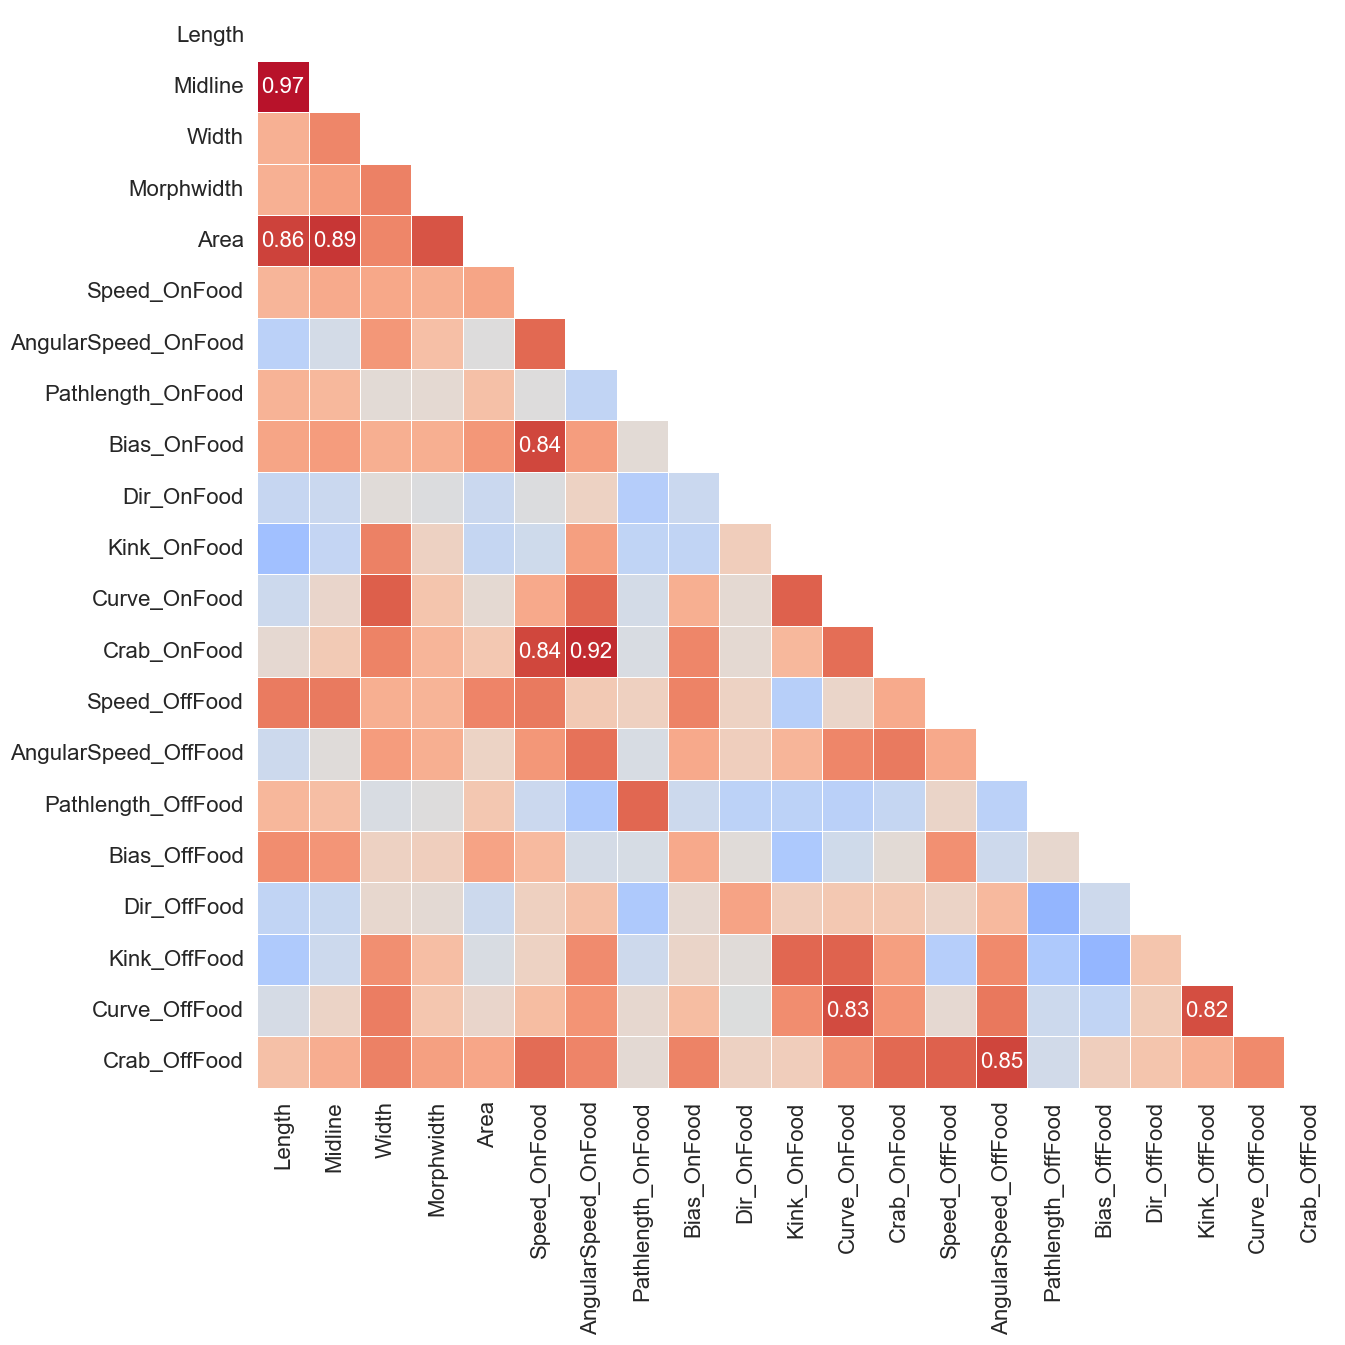

In [174]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
BSR_corr = BSR_Data_Correlation.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = BSR_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_NoN2.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Correlation of just N2 Data

In [160]:
desired_order = ['Genotype','Gene','Allele','Treatment','plate_id','date','length','midline','width','morphwidth','area','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']
BSR_Data_ordered = BSR_Data[desired_order]
BSR_N2_Data = BSR_Data_ordered[BSR_Data_ordered.Gene == 'N2']
BSR_Data_OnFood = BSR_N2_Data[BSR_N2_Data.Treatment == 'OnFood']
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns={'speed':'Speed_OnFood',
                                                  'angularspeed':'AngularSpeed_OnFood',
                                                  'pathlength':'Pathlength_OnFood',
                                                  'bias':'Bias_OnFood',
                                                  'dir':'Dir_OnFood',
                                                  'kink':'Kink_OnFood',
                                                  'curve':'Curve_OnFood',
                                                  'crab':'Crab_OnFood'})

BSR_Data_OnFood = BSR_Data_OnFood.drop(columns=['Treatment','date']).groupby(['Genotype','Gene','Allele','plate_id'], as_index=False).mean()
# BSR_Data_OnFood = BSR_Data_OnFood.drop(columns=['Treatment','plate_id','date'])

BSR_Data_OffFood = BSR_N2_Data[BSR_N2_Data.Treatment == 'OffFood']
BSR_Data_OffFood = BSR_Data_OffFood[['Genotype','Gene','Allele','Treatment','plate_id','date','length','midline','width','morphwidth','area','speed','angularspeed','pathlength','bias','dir','kink','curve','crab']]
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns={'speed':'Speed_OffFood',
                                                  'angularspeed':'AngularSpeed_OffFood',
                                                  'pathlength':'Pathlength_OffFood',
                                                  'bias':'Bias_OffFood',
                                                  'dir':'Dir_OffFood',
                                                  'kink':'Kink_OffFood',
                                                  'curve':'Curve_OffFood',
                                                  'crab':'Crab_OffFood'})

BSR_Data_OffFood = BSR_Data_OffFood.drop(columns=['Treatment','date']).groupby(['Genotype','Gene','Allele','plate_id'], as_index=False).mean()
# BSR_Data_OffFood = BSR_Data_OffFood.drop(columns=['Treatment','plate_id','date'])

N2_Morphology_OnFood = BSR_Data_OnFood[['Genotype','Gene','Allele','plate_id','length','midline','width','morphwidth','area']]
N2_Morphology_OffFood = BSR_Data_OnFood [['Genotype','Gene','Allele','plate_id','length','midline','width','morphwidth','area']]
BSR_Data_Correlation_N2_Morphology = pd.concat([N2_Morphology_OnFood,N2_Morphology_OffFood])


BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2_Morphology.merge(BSR_Data_OnFood.drop(columns=['length','midline','width','morphwidth','area']), on=['Genotype','Gene','Allele','plate_id'], how='left')
BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2.merge(BSR_Data_OffFood.drop(columns=['length','midline','width','morphwidth','area']), on=['Genotype','Gene','Allele','plate_id'], how='left')



In [161]:
BSR_Data_Correlation_N2
# BSR_Data_Correlation_N2_Morphology
# BSR_Data_OnFood
# BSR_Data_OffFood

Genotype Gene Allele  plate_id    length   midline     width  morphwidth  \
0         N2   N2     N2      2353  0.854409  1.018120  0.212500    0.099577   
1         N2   N2     N2     11200  0.983705  1.161376  0.231062    0.117000   
2         N2   N2     N2     15840  0.826496  1.023297  0.256356    0.131300   
3         N2   N2     N2     21515  0.898953  1.068220  0.227259    0.113716   
4         N2   N2     N2     21729  0.879858  1.038564  0.204914    0.102762   
..       ...  ...    ...       ...       ...       ...       ...         ...   
437       N2   N2     N2    202034  0.861022  1.081859  0.255450    0.127848   
438       N2   N2     N2    203726  0.857603  1.016946  0.219577    0.117496   
439       N2   N2     N2    210118  0.867521  1.072550  0.265746    0.117821   
440       N2   N2     N2    212653  0.798528  1.036142  0.291303    0.155276   
441       N2   N2     N2    223746  1.087329  1.242798  0.216105    0.092998   

         area  Speed_OnFood  AngularSpeed_OnFood  Pathlength_OnFood  \
0    0.100974      0.079834             5.093192           5.171363   
1    0.131176      0.186982             7.380868           5.021848   
2    0.126189      0.095966             8.695744           4.075928   
3    0.116200      0.068438             4.885345           7.187067   
4    0.106746      0.157529             7.118635           4.424731   
..        ...           ...                  ...                ...   
437  0.122495      0.157456            14.282052          13.501986   
438  0.113490      0.066095             3.757327           7.639670   
439  0.118162      0.111904             8.764700           4.516938   
440  0.130920      0.151141            15.560389           8.911263   
441  0.131764      0.170749             5.945455           7.962192   

     Bias_OnFood  Dir_OnFood  Kink_OnFood  Curve_OnFood  Crab_OnFood  \
0       0.676608    0.003577    46.098693     33.438736     0.008878   
1       0.759653    0.025932    43.696156     33.874369     0.018250   
2       0.640387    0.018120    55.020041     34.571798     0.012929   
3       0.576818    0.003379    51.836228     33.716266     0.009573   
4       0.876900    0.007314    41.338068     33.351618     0.013578   
..           ...         ...          ...           ...          ...   
437     0.812164    0.003814    51.641391     35.608343     0.021269   
438     0.617076    0.002649    48.795008     32.297369     0.008272   
439     0.720018    0.008781    55.825292     37.072737     0.014580   
440     0.950112    0.000541    50.701262     37.157860     0.019405   
441     0.909091    0.000000    40.490260     32.652597     0.009188   

     Speed_OffFood  AngularSpeed_OffFood  Pathlength_OffFood  Bias_OffFood  \
0              NaN                   NaN                 NaN           NaN   
1              NaN                   NaN                 NaN           NaN   
2              NaN                   NaN                 NaN           NaN   
3              NaN                   NaN                 NaN           NaN   
4              NaN                   NaN                 NaN           NaN   
..             ...                   ...                 ...           ...   
437            NaN                   NaN                 NaN           NaN   
438            NaN                   NaN                 NaN           NaN   
439            NaN                   NaN                 NaN           NaN   
440            NaN                   NaN                 NaN           NaN   
441            NaN                   NaN                 NaN           NaN   

     Dir_OffFood  Kink_OffFood  Curve_OffFood  Crab_OffFood  
0            NaN           NaN            NaN           NaN  
1            NaN           NaN            NaN           NaN  
2            NaN           NaN            NaN           NaN  
3            NaN           NaN            NaN           NaN  
4            NaN           NaN            NaN           NaN  
..           ...

In [162]:
BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2.drop(columns = ['Genotype','Gene','Allele','plate_id'])
BSR_Data_Correlation_N2 = BSR_Data_Correlation_N2.rename(columns={'length':'Length',
                                                            'midline':'Midline',
                                                            'width':'Width',
                                                            'morphwidth':'Morphwidth',
                                                            'area':'Area'})
BSR_Data_Correlation_N2

Length   Midline     Width  Morphwidth      Area  Speed_OnFood  \
0    0.854409  1.018120  0.212500    0.099577  0.100974      0.079834   
1    0.983705  1.161376  0.231062    0.117000  0.131176      0.186982   
2    0.826496  1.023297  0.256356    0.131300  0.126189      0.095966   
3    0.898953  1.068220  0.227259    0.113716  0.116200      0.068438   
4    0.879858  1.038564  0.204914    0.102762  0.106746      0.157529   
..        ...       ...       ...         ...       ...           ...   
437  0.861022  1.081859  0.255450    0.127848  0.122495      0.157456   
438  0.857603  1.016946  0.219577    0.117496  0.113490      0.066095   
439  0.867521  1.072550  0.265746    0.117821  0.118162      0.111904   
440  0.798528  1.036142  0.291303    0.155276  0.130920      0.151141   
441  1.087329  1.242798  0.216105    0.092998  0.131764      0.170749   

     AngularSpeed_OnFood  Pathlength_OnFood  Bias_OnFood  Dir_OnFood  \
0               5.093192           5.171363     0.676608    0.003577   
1               7.380868           5.021848     0.759653    0.025932   
2               8.695744           4.075928     0.640387    0.018120   
3               4.885345           7.187067     0.576818    0.003379   
4               7.118635           4.424731     0.876900    0.007314   
..                   ...                ...          ...         ...   
437            14.282052          13.501986     0.812164    0.003814   
438             3.757327           7.639670     0.617076    0.002649   
439             8.764700           4.516938     0.720018    0.008781   
440            15.560389           8.911263     0.950112    0.000541   
441             5.945455           7.962192     0.909091    0.000000   

     Kink_OnFood  Curve_OnFood  Crab_OnFood  Speed_OffFood  \
0      46.098693     33.438736     0.008878            NaN   
1      43.696156     33.874369     0.018250            NaN   
2      55.020041     34.571798     0.012929            NaN   
3      51.836228     33.716266     0.009573            NaN   
4      41.338068     33.351618     0.013578            NaN   
..           ...           ...          ...            ...   
437    51.641391     35.608343     0.021269            NaN   
438    48.795008     32.297369     0.008272            NaN   
439    55.825292     37.072737     0.014580            NaN   
440    50.701262     37.157860     0.019405            NaN   
441    40.490260     32.652597     0.009188            NaN   

     AngularSpeed_OffFood  Pathlength_OffFood  Bias_OffFood  Dir_OffFood  \
0                     NaN                 NaN           NaN          NaN   
1                     NaN                 NaN           NaN          NaN   
2                     NaN                 NaN           NaN          NaN   
3                     NaN                 NaN           NaN          NaN   
4                     NaN                 NaN           NaN          NaN   
..                    ...                 ...           ...          ...   
437                   NaN                 NaN           NaN          NaN   
438                   NaN                 NaN           NaN          NaN   
439                   NaN                 NaN           NaN          NaN   
440                   NaN                 NaN           NaN          NaN   
441                   NaN                 NaN           NaN          NaN   

     Kink_OffFood  Curve_OffFood  Crab_OffFood  
0             NaN            NaN           NaN  
1             NaN            NaN           NaN  
2             NaN            NaN           NaN  
3             NaN            NaN           NaN  
4             NaN            NaN           NaN  
..            ...            ...           ...  
437           NaN            NaN           NaN  
438           NaN            NaN           NaN  
439           NaN            NaN           NaN  
440           NaN            NaN           NaN  
441           NaN            NaN           NaN  

[442 rows x 21 col

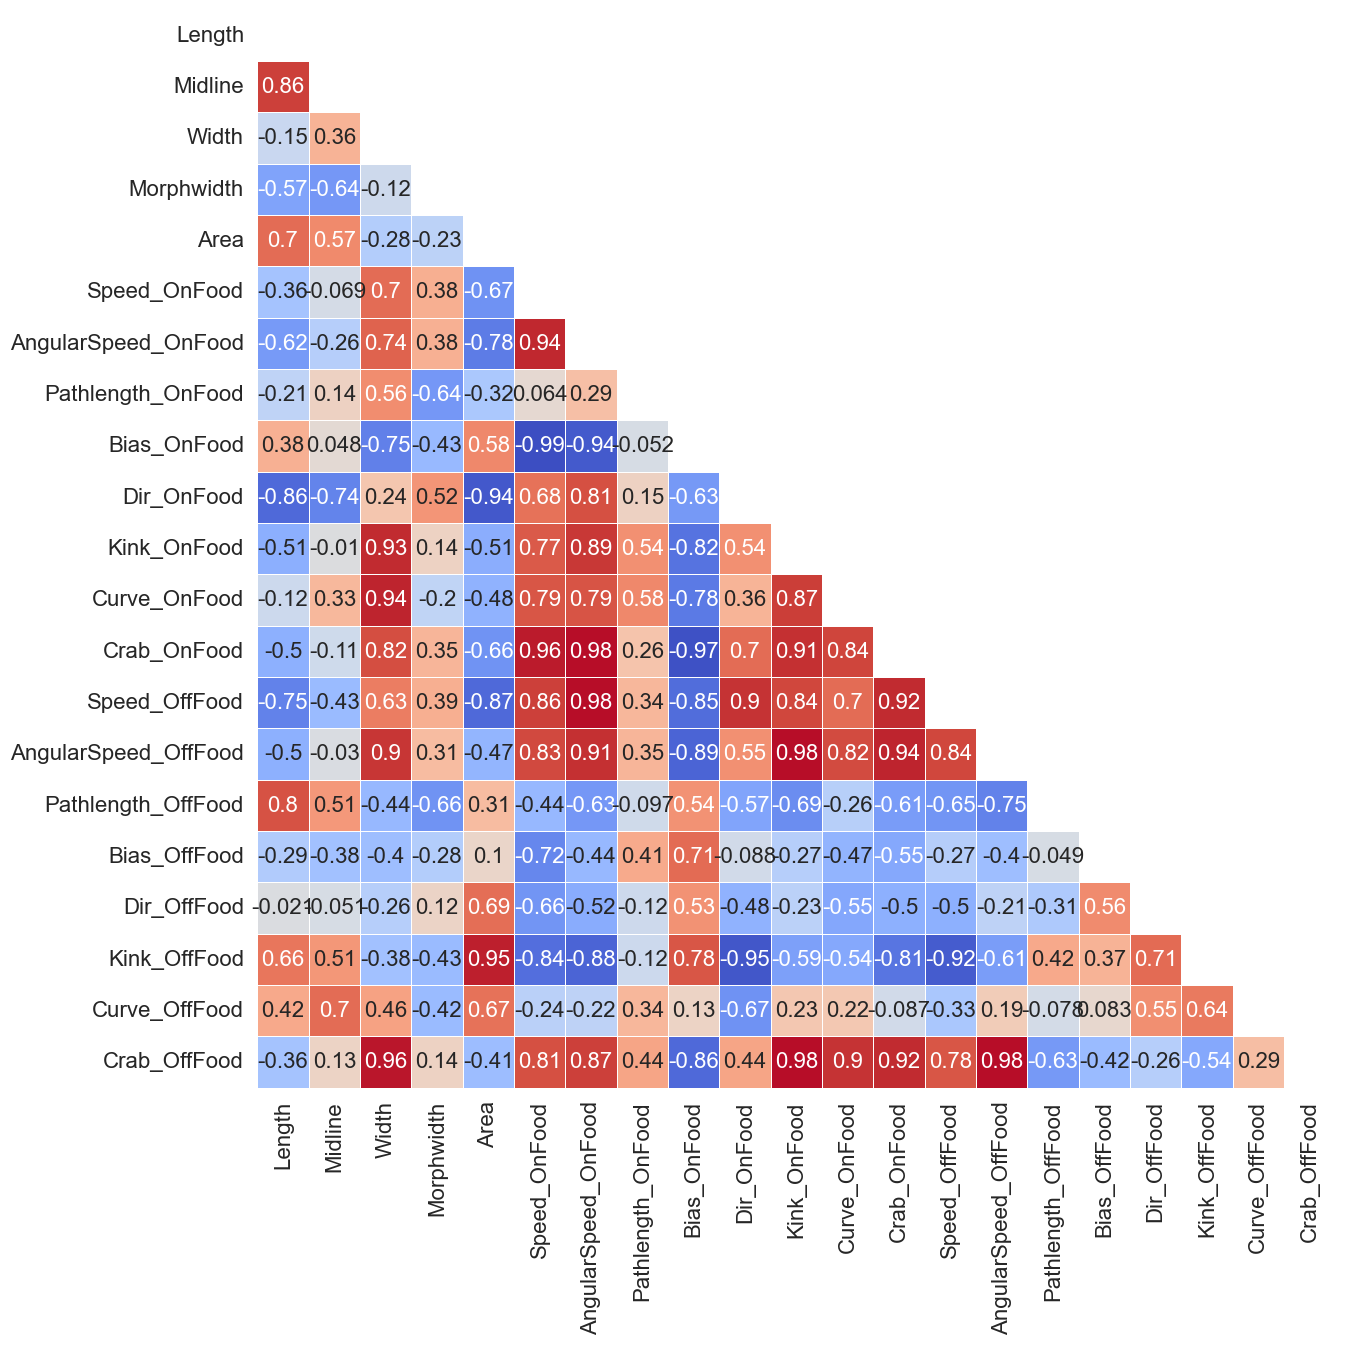

In [175]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
N2_corr = BSR_Data_Correlation_N2.dropna().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = N2_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_N2Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

## Differences in Correlation between N2 and Screen data

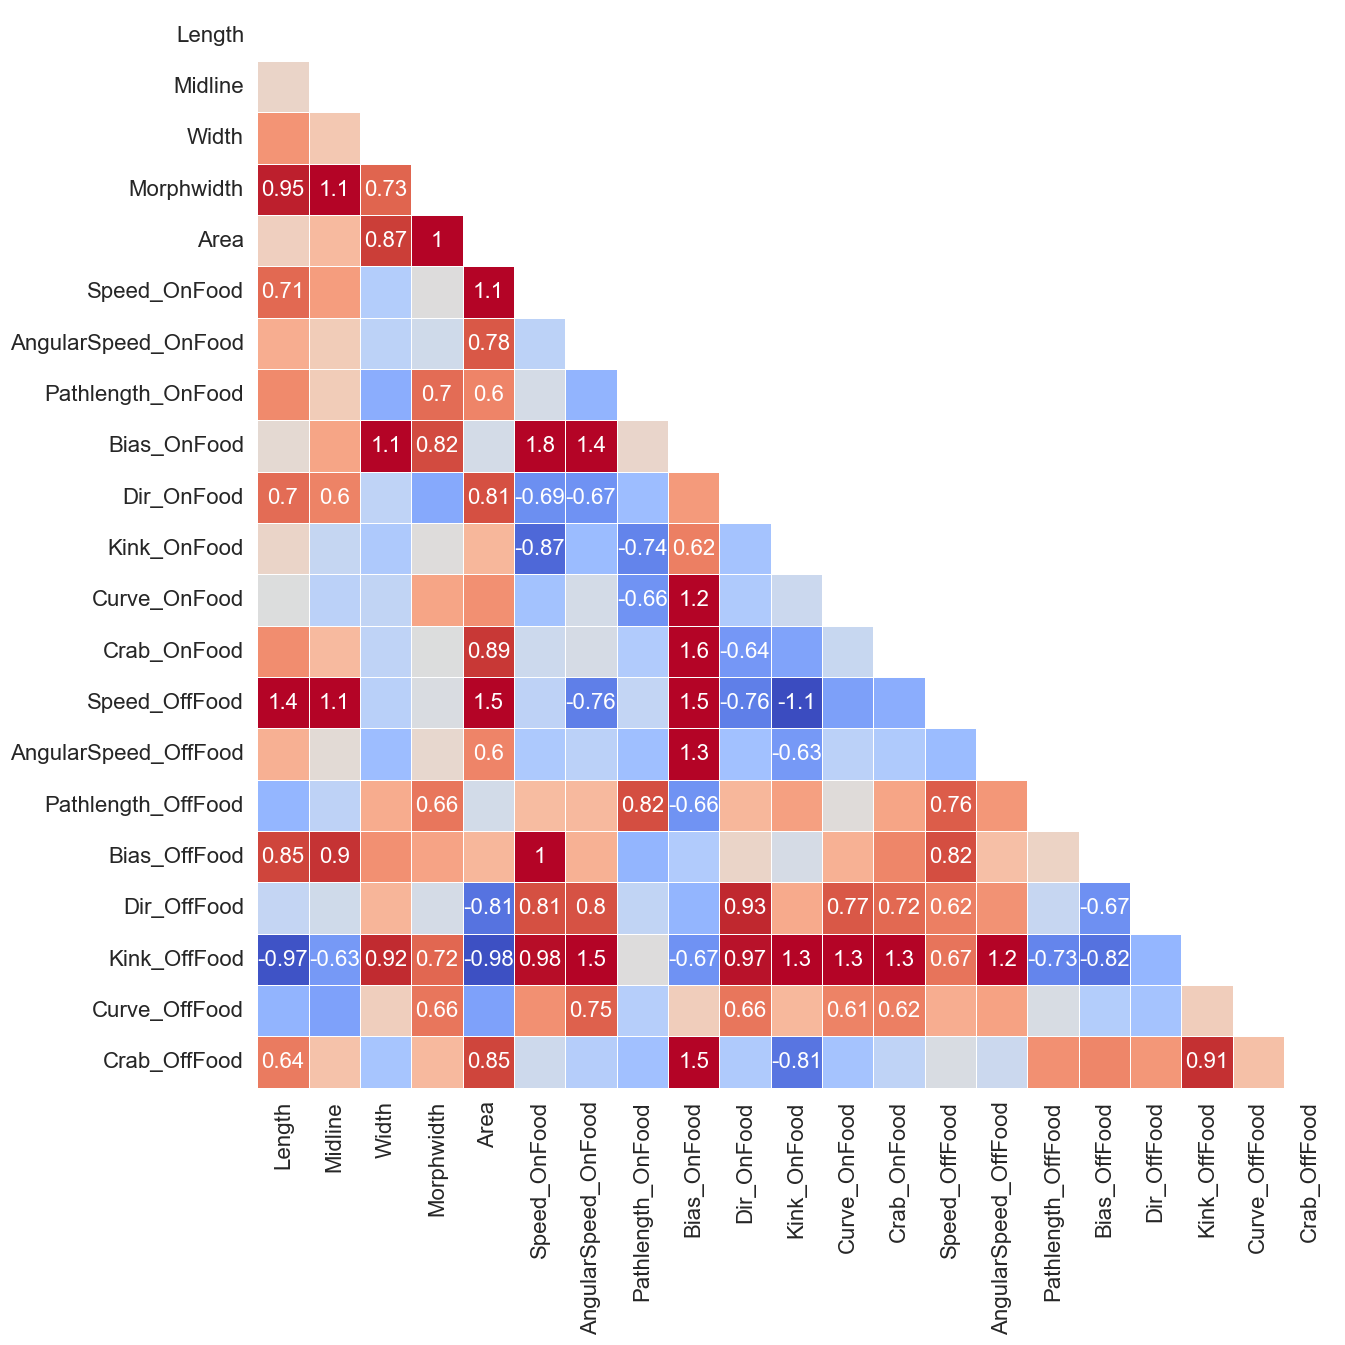

In [179]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
corr_diff = BSR_corr-N2_corr

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = corr_diff, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.6 or float(t.get_text())<=-0.6:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_ScreenMinusN2.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [111]:
# sns.set_theme(style="white")

# # Compute the correlation matrix
# corr = BSR_Data_Correlation.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=sns.color_palette("coolwarm", as_cmap=True), vmax=.9, vmin= -0.9,center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Just For Worm Speed:

### By Gene:

In [212]:
BSR_Data.Gene.unique()

array(['C29E4.10', 'F53B2.5', 'F54B11.5', 'N2', 'R07G3.8', 'SSSD1.1',
       'T08G11.1', 'T20F7.3', 'W07B8.4', 'Y18D10A.22', 'acr-12', 'acr-3',
       'acr-6', 'acr-8', 'bas-1', 'cat-1', 'cat-2', 'cat-4', 'catp-6',
       'catp-7', 'chd-1', 'chd-7', 'cpr-1', 'cpr-2', 'cpr-4', 'cpr-5',
       'cpr-6', 'cpr-8', 'cpr-9', 'crls-1', 'csb-1', 'djr-1.1', 'djr-1.2',
       'dma-1', 'dnj-25', 'dop-1', 'dop-3', 'dve-1', 'exp-2', 'gba-1',
       'gba-2', 'gba-3', 'gba-4', 'gbf-1', 'gck-3', 'gipc-1', 'gipc-2',
       'glo-1', 'gly-5', 'har-1', 'hipr-1', 'ifg-1', 'igcm-2', 'imp-1',
       'ipla-3', 'klp-12', 'klu-1', 'kvs-1', 'kvs-2', 'kvs-3', 'kvs-4',
       'kvs-5', 'let-19', 'lfe-2', 'lrk-1', 'mbk-1', 'mbl-1', 'mbr-1',
       'mex-3', 'mig-32', 'miro-1', 'mop-25.1', 'ncs-4', 'ncs-7',
       'pamn-1', 'pdr-1', 'pink-1', 'ptl-1', 'rme-8', 'rskd-1', 'sac-2',
       'scav-2', 'scav-5', 'sek-4', 'sek-5', 'set-2', 'sipa-1', 'smrc-1',
       'snb-5', 'snb-7', 'tag-138', 'ubh-1', 'ubh-2', 'ubh-3', 'unc-

In [213]:
worm_avg_speed = BSR_Data[['Gene', 'Treatment', 'speed']]
avg_speed = worm_avg_speed.groupby(["Gene", 'Treatment'], as_index=False).mean()
print(avg_speed)
print("-"*50)
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
print(speed_diff)
print("-"*50)
speed_diff.insert(loc=0, column='Gene', value=avg_speed['Gene'])
speed_diff=speed_diff.reset_index(drop=True)
print(speed_diff)
print("-"*50)
# speed_diff=speed_diff.sort_values(by=["speed"])
# print(speed_diff)
print("-"*50)
print(speed_diff.iloc[3,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[3,1]
print("-"*50)
print(speed_diff)
print("-"*50)
speed_diff=speed_diff.sort_values(by=["Score"])
print("-"*50)
print(speed_diff.head(10))
# speed_diff.to_csv("/Users/Joseph/Desktop/BSR_Screen_speed_diff.csv")

         Gene Treatment     speed
0    C29E4.10   OffFood  0.225740
1    C29E4.10    OnFood  0.140878
2     F53B2.5   OffFood  0.123559
3     F53B2.5    OnFood  0.053344
4    F54B11.5   OffFood  0.194966
..        ...       ...       ...
203    unc-57    OnFood  0.030208
204    unc-70   OffFood  0.074166
205    unc-70    OnFood  0.055663
206    vps-35   OffFood  0.075013
207    vps-35    OnFood  0.051642

[208 rows x 3 columns]
--------------------------------------------------
        speed
0    0.084863
2    0.070215
4    0.088286
6    0.070568
8    0.113898
..        ...
198 -0.011763
200  0.015082
202 -0.008624
204  0.018503
206  0.023371

[104 rows x 1 columns]
--------------------------------------------------
         Gene     speed
0    C29E4.10  0.084863
1     F53B2.5  0.070215
2    F54B11.5  0.088286
3          N2  0.070568
4     R07G3.8  0.113898
..        ...       ...
99     unc-26 -0.011763
100    unc-43  0.015082
101    unc-57 -0.008624
102    unc-70  0.018503
103    vps

In [216]:
speed_diff.Gene.unique()

array(['unc-26', 'unc-57', 'unc-10', 'unc-43', 'unc-70', 'cat-2',
       'vps-35', 'pink-1', 'smrc-1', 'rme-8', 'catp-6', 'gly-5', 'bas-1',
       'cat-4', 'ptl-1', 'cpr-5', 'cpr-8', 'gyf-1', 'gly-7', 'acr-8',
       'exp-2', 'kvs-5', 'gipc-2', 'set-2', 'ubh-3', 'mop-25.1', 'kvs-3',
       'snb-5', 'dat-1', 'cpr-4', 'gba-1', 'ubh-2', 'lrk-1', 'sac-2',
       'scav-2', 'F53B2.5', 'N2', 'har-1', 'W07B8.4', 'rskd-1', 'sek-4',
       'acr-3', 'mbr-1', 'acr-6', 'klu-1', 'cat-1', 'scav-5',
       'Y18D10A.22', 'kvs-1', 'ubh-1', 'mex-3', 'pdr-1', 'imp-1',
       'C29E4.10', 'pamn-1', 'cpr-1', 'SSSD1.1', 'igcm-2', 'kvs-4',
       'F54B11.5', 'ncs-7', 'gipc-1', 'lfe-2', 'dve-1', 'crls-1', 'mbl-1',
       'mbk-1', 'dop-3', 'gba-3', 'scav-1', 'gbf-1', 'djr-1.1', 'kvs-2',
       'djr-1.2', 'T08G11.1', 'snb-7', 'T20F7.3', 'miro-1', 'ncs-4',
       'R07G3.8', 'sek-5', 'sipa-1', 'chd-7', 'cpr-2', 'ifg-1', 'dma-1',
       'cpr-6', 'tag-138', 'gba-2', 'catp-7', 'gck-3', 'mig-32', 'hipr-1',
       'glo-

In [177]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/Gene_Orthology.csv').drop(columns=['Unnamed: 0'])
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
print(Gene_Orthology)

         Orthology    Gene Human Gene Category
0      KCNS3•kvs-5   kvs-5      KCNS3     GWAS
1      LAMB2•lam-1   lam-1      LAMB2     GWAS
2        GBA•gba-4   gba-4        GBA     GWAS
3     MCCC1•mccc-1  mccc-1      MCCC1     GWAS
4    CAMK2D•unc-43  unc-43     CAMK2D     GWAS
..             ...     ...        ...      ...
120  KIF21B•klp-12  klp-12     KIF21B     GWAS
121   ZRANB3•csb-1   csb-1     ZRANB3     GWAS
122   SYNJ1•unc-26  unc-26      SYNJ1     PARK
123   GIGYF2•gyf-1   gyf-1     GIGYF2     PARK
124  WBSCR17•gly-7   gly-7    WBSCR17     GWAS

[125 rows x 4 columns]


In [217]:
Gene_Orthology.Gene.unique()

array(['kvs-5', 'lam-1', 'gba-4', 'mccc-1', 'unc-43', 'F53B2.5', 'snb-7',
       'gba-3', 'crls-1', 'Y22D7AR.6', 'set-2', 'bas-1', 'let-756',
       'C29E4.10', 'snb-5', 'hipr-1', 'dat-1', 'kvs-4', 'gbf-1', 'scav-2',
       'pdr-1', 'dve-1', 'mop-25.1', 'scav-1', 'cat-1', 'igcm-2', 'dop-3',
       'cpr-6', 'acr-3', 'unc-10', 'kvs-1', 'dpy-22', 'scav-5', 'glo-1',
       'ncs-4', 'acr-8', 'mig-15', 'mbr-1', 'acr-12', 'F54B11.5', 'mbk-1',
       'T20F7.3', 'mbl-1', 'ncs-7', 'mex-3', 'pqn-59', 'src-1', 'pghm-1',
       'acr-6', 'unc-57', 'chd-7', 'pgal-1', 'lfe-2', 'pamn-1', 'ima-2',
       'imp-1', 'T08G11.1', 'pgrn-1', 'Y18D10A.22', 'tag-138', 'sac-2',
       'W07B8.4', 'cpr-5', 'cpr-8', 'djr-1.2', 'exp-2', 'cpr-4', 'kvs-3',
       'cat-4', 'kvs-2', 'F32D8.13', 'sipa-1', 'cpr-1', 'cpr-9', 'rskd-1',
       'F32H5.1', 'cpr-3', 'cpr-2', 'gck-3', 'ncs-5', 'dnj-25', 'cat-2',
       'djr-1.1', 'gba-1', 'gba-2', 'pink-1', 'vps-35', 'R07G3.8',
       'let-19', 'clh-5', 'mop-25.2', 'N2', 'lrk-1',

In [219]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

    Worm Gene     speed     Score           Gene Human Gene  Category
0      unc-26 -0.011763 -0.082331   SYNJ1•unc-26      SYNJ1      PARK
1      unc-57 -0.008624 -0.079192  SH3GL2•unc-57     SH3GL2      GWAS
2      unc-10  0.014218 -0.056350   RIMS1•unc-10      RIMS1      GWAS
3      unc-43  0.015082 -0.055486  CAMK2D•unc-43     CAMK2D      GWAS
4      unc-70  0.018503 -0.052064  SPTBN1•unc-70     SPTBN1      GWAS
..        ...       ...       ...            ...        ...       ...
101    acr-12  0.139127  0.068559  CHRNB1•acr-12     CHRNB1      GWAS
102     dop-1  0.144148  0.073580   DRD1\5•dop-1     DRD1\5  DOPAMINE
103    let-19  0.152896  0.082329   MED13•let-19      MED13      GWAS
104     cpr-9  0.155965  0.085398     CTSB•cpr-9       CTSB      GWAS
105     csb-1  0.168762  0.098194   ZRANB3•csb-1     ZRANB3      GWAS

[106 rows x 6 columns]
--------------------------------------------------
Empty DataFrame
Columns: [Worm Gene, speed, Score, Gene, Human Gene, Category]
Index:

In [220]:
speed_diff_orthology.Category.unique()

array(['PARK', 'GWAS', 'TH•cat-2', 'DOPAMINE', 'CONTROL (WT)'],
      dtype=object)

In [236]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

    Worm Gene     speed     Score           Gene Human Gene  Category
0      unc-26 -0.011763 -0.082331   SYNJ1•unc-26      SYNJ1      PARK
1      unc-57 -0.008624 -0.079192  SH3GL2•unc-57     SH3GL2      GWAS
2      unc-10  0.014218 -0.056350   RIMS1•unc-10      RIMS1      GWAS
3      unc-43  0.015082 -0.055486  CAMK2D•unc-43     CAMK2D      GWAS
4      unc-70  0.018503 -0.052064  SPTBN1•unc-70     SPTBN1      GWAS
..        ...       ...       ...            ...        ...       ...
101    acr-12  0.139127  0.068559  CHRNB1•acr-12     CHRNB1      GWAS
102     dop-1  0.144148  0.073580   DRD1\5•dop-1     DRD1\5  DOPAMINE
103    let-19  0.152896  0.082329   MED13•let-19      MED13      GWAS
104     cpr-9  0.155965  0.085398     CTSB•cpr-9       CTSB      GWAS
105     csb-1  0.168762  0.098194   ZRANB3•csb-1     ZRANB3      GWAS

[106 rows x 6 columns]
--------------------------------------------------
Empty DataFrame
Columns: [Worm Gene, speed, Score, Gene, Human Gene, Category]
Index:

In [237]:
speed_diff_orthology[speed_diff_orthology.Category == 'CONTROL (WT)']

Worm Gene     speed  Score   Gene Human Gene      Category
37        N2  0.070568    0.0  WT•N2         WT  CONTROL (WT)

In [230]:
InteractionTest_Significance = InteractionTest[InteractionTest.Source=='Gene * Treatment'].reset_index(drop=True).rename(columns={"Gene":"Worm Gene", "p-unc":"p-value"})
InteractionTest_Significance['alpha'] = 0
InteractionTest_Significance

Source        SS   DF        MS          F   p-value       np2  \
0    Gene * Treatment  0.025962  1.0  0.025962  19.708247  0.000014  0.075306   
1    Gene * Treatment  0.035764  1.0  0.035764  10.302034  0.001554  0.050180   
2    Gene * Treatment  0.001716  1.0  0.001716   1.038280  0.308325  0.000436   
3    Gene * Treatment  0.000012  1.0  0.000012   0.009607  0.921930  0.000004   
4    Gene * Treatment  0.003107  1.0  0.003107   2.509951  0.113646  0.004084   
..                ...       ...  ...       ...        ...       ...       ...   
97   Gene * Treatment  0.000744  1.0  0.000744   0.556611  0.456105  0.001510   
98   Gene * Treatment  0.000027  1.0  0.000027   0.020575  0.886016  0.000052   
99   Gene * Treatment  0.000298  1.0  0.000298   0.176894  0.674210  0.000302   
100  Gene * Treatment  0.026793  1.0  0.026793  24.642114  0.000008  0.317381   
101  Gene * Treatment  0.000902  1.0  0.000902   0.498629  0.480342  0.000724   

    Worm Gene  alpha  
0       dat-1      0  
1      unc-26      0  
2       gyf-1      0  
3       gly-7      0  
4      scav-1      0  
..        ...    ...  
97    SSSD1.1      0  
98    R07G3.8      0  
99   F54B11.5      0  
100   F53B2.5      0  
101  C29E4.10      0  

[102 rows x 9 columns]

In [247]:
for i, row in InteractionTest_Significance.iterrows():
    if row['p-value'] < 0.05:
        InteractionTest_Significance.at[i, 'alpha'] = 1
    else:
        InteractionTest_Significance.at[i, 'alpha'] = 0.2

InteractionTest_Significance

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_47351/3564028093.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  InteractionTest_Significance.at[i, 'alpha'] = 0.2


Source        SS   DF        MS          F   p-value       np2  \
0    Gene * Treatment  0.025962  1.0  0.025962  19.708247  0.000014  0.075306   
1    Gene * Treatment  0.035764  1.0  0.035764  10.302034  0.001554  0.050180   
2    Gene * Treatment  0.001716  1.0  0.001716   1.038280  0.308325  0.000436   
3    Gene * Treatment  0.000012  1.0  0.000012   0.009607  0.921930  0.000004   
4    Gene * Treatment  0.003107  1.0  0.003107   2.509951  0.113646  0.004084   
..                ...       ...  ...       ...        ...       ...       ...   
97   Gene * Treatment  0.000744  1.0  0.000744   0.556611  0.456105  0.001510   
98   Gene * Treatment  0.000027  1.0  0.000027   0.020575  0.886016  0.000052   
99   Gene * Treatment  0.000298  1.0  0.000298   0.176894  0.674210  0.000302   
100  Gene * Treatment  0.026793  1.0  0.026793  24.642114  0.000008  0.317381   
101  Gene * Treatment  0.000902  1.0  0.000902   0.498629  0.480342  0.000724   

    Worm Gene  alpha  
0       dat-1    1.0  
1      unc-26    1.0  
2       gyf-1    0.2  
3       gly-7    0.2  
4      scav-1    0.2  
..        ...    ...  
97    SSSD1.1    0.2  
98    R07G3.8    0.2  
99   F54B11.5    0.2  
100   F53B2.5    1.0  
101  C29E4.10    0.2  

[102 rows x 9 columns]

In [248]:
speed_diff_orthology_sig = speed_diff_orthology.merge(InteractionTest_Significance, on='Worm Gene', how = "left")
speed_diff_orthology_sig

Worm Gene     speed     Score           Gene Human Gene  Category  \
0      unc-26 -0.011763 -0.082331   SYNJ1•unc-26      SYNJ1      PARK   
1      unc-57 -0.008624 -0.079192  SH3GL2•unc-57     SH3GL2      GWAS   
2      unc-10  0.014218 -0.056350   RIMS1•unc-10      RIMS1      GWAS   
3      unc-43  0.015082 -0.055486  CAMK2D•unc-43     CAMK2D      GWAS   
4      unc-70  0.018503 -0.052064  SPTBN1•unc-70     SPTBN1      GWAS   
..        ...       ...       ...            ...        ...       ...   
101    acr-12  0.139127  0.068559  CHRNB1•acr-12     CHRNB1      GWAS   
102     dop-1  0.144148  0.073580   DRD1\5•dop-1     DRD1\5  DOPAMINE   
103    let-19  0.152896  0.082329   MED13•let-19      MED13      GWAS   
104     cpr-9  0.155965  0.085398     CTSB•cpr-9       CTSB      GWAS   
105     csb-1  0.168762  0.098194   ZRANB3•csb-1     ZRANB3      GWAS   

               Source        SS   DF        MS           F       p-value  \
0    Gene * Treatment  0.035764  1.0  0.035764   10.302034  1.553900e-03   
1    Gene * Treatment  0.015491  1.0  0.015491   61.844023  0.000000e+00   
2    Gene * Treatment  0.017713  1.0  0.017713   60.678673  0.000000e+00   
3    Gene * Treatment  0.014632  1.0  0.014632   13.507702  2.568000e-04   
4    Gene * Treatment  0.001011  1.0  0.001011    1.826270  1.778793e-01   
..                ...       ...  ...       ...         ...           ...   
101  Gene * Treatment  0.046147  1.0  0.046147   28.076714  2.000000e-07   
102  Gene * Treatment  0.001618  1.0  0.001618    0.334146  5.635497e-01   
103  Gene * Treatment  0.000186  1.0  0.000186    0.030694  8.610955e-01   
104  Gene * Treatment  0.033638  1.0  0.033638   20.951971  5.600000e-06   
105  Gene * Treatment  0.493361  1.0  0.493361  214.301694  0.000000e+00   

          np2  alpha  
0    0.050180    1.0  
1    0.578825    1.0  
2    0.051350    1.0  
3    0.019937    1.0  
4    0.007777    0.2  
..        ...    ...  
101  0.086370    1.0  
102  0.000826    0.2  
103  0.000148    0.2  
104  0.030149    1.0  
105  0.175326    1.0  

[106 rows x 14 columns]

In [249]:
speed_diff_orthology_sig[speed_diff_orthology_sig.alpha == 1]

Worm Gene     speed     Score             Gene Human Gene  Category  \
0      unc-26 -0.011763 -0.082331     SYNJ1•unc-26      SYNJ1      PARK   
1      unc-57 -0.008624 -0.079192    SH3GL2•unc-57     SH3GL2      GWAS   
2      unc-10  0.014218 -0.056350     RIMS1•unc-10      RIMS1      GWAS   
3      unc-43  0.015082 -0.055486    CAMK2D•unc-43     CAMK2D      GWAS   
5       cat-2  0.020920 -0.049648         TH•cat-2         TH  TH•cat-2   
6      vps-35  0.023371 -0.047196     VPS35•vps-35      VPS35      PARK   
8      smrc-1  0.025977 -0.044591    ZRANB3•smrc-1     ZRANB3      GWAS   
10     catp-6  0.037153 -0.033415   ATP13A3•catp-6    ATP13A3      GWAS   
11      gly-5  0.040942 -0.029626    WBSCR17•gly-5    WBSCR17      GWAS   
14      ptl-1  0.048911 -0.021657       MAPT•ptl-1       MAPT      GWAS   
15      cpr-5  0.051696 -0.018871       CTSB•cpr-5       CTSB      GWAS   
16      cpr-8  0.053548 -0.017020       CTSB•cpr-8       CTSB      GWAS   
19      acr-8  0.057797 -0.012770     CHRNB1•acr-8     CHRNB1      GWAS   
24      ubh-3  0.063146 -0.007422      UCHL1•ubh-3      UCHL1      PARK   
25   mop-25.1  0.063440 -0.007128  CAB39L•mop-25.1     CAB39L      GWAS   
27      snb-5  0.065549 -0.005019      VAMP4•snb-5      VAMP4      GWAS   
28      dat-1  0.066021 -0.004547        DAT•dat-1        DAT  DOPAMINE   
29      cpr-4  0.067301 -0.003267       CTSB•cpr-4       CTSB      GWAS   
32      ubh-2  0.067986 -0.002582      UCHL1•ubh-2      UCHL1      PARK   
34      sac-2  0.068796 -0.001772     INPP5F•sac-2     INPP5F      GWAS   
36    F53B2.5  0.070215 -0.000353    KPNA1•F53B2.5      KPNA1      GWAS   
38      har-1  0.070944  0.000376     CHCHD2•har-1     CHCHD2      GWAS   
40     rskd-1  0.073098  0.002530   RPS6KL1•rskd-1    RPS6KL1      GWAS   
43      mbr-1  0.076244  0.005676      LCORL•mbr-1      LCORL      GWAS   
44      acr-6  0.076821  0.006253     CHRNB1•acr-6     CHRNB1      GWAS   
45      klu-1  0.077645  0.007077    ZSCAN21•klu-1    ZSCAN21      GWAS   
50      ubh-1  0.080907  0.010339      UCHL1•ubh-1      UCHL1      PARK   
68      mbk-1  0.103029  0.032462     DYRK1A•mbk-1     DYRK1A      GWAS   
72      gbf-1  0.104876  0.034309       GBF1•gbf-1       GBF1      GWAS   
80      ncs-4  0.112442  0.041875     KCNIP3•ncs-4     KCNIP3      GWAS   
83     sipa-1  0.115752  0.045184   SIPA1L2•sipa-1    SIPA1L2      GWAS   
84      chd-7  0.116333  0.045765       CHD9•chd-7       CHD9      GWAS   
86      ifg-1  0.118086  0.047518     EIF4G1•ifg-1     EIF4G1      PARK   
88      cpr-6  0.122464  0.051896       CTSB•cpr-6       CTSB      GWAS   
91     catp-7  0.124251  0.053684   ATP13A2•catp-7    ATP13A2      PARK   
96      chd-1  0.129607  0.059039     ZRANB3•chd-1     ZRANB3      GWAS   
98     klp-12  0.130581  0.060013    KIF21B•klp-12     KIF21B      GWAS   
99      gba-4  0.135030  0.064462        GBA•gba-4        GBA      GWAS   
101    acr-12  0.139127  0.068559    CHRNB1•acr-12     CHRNB1      GWAS   
104     cpr-9  0.155965  0.085398       CTSB•cpr-9       CTSB      GWAS   
105     csb-1  0.168762  0.098194     ZRANB3•csb-1     ZRANB3      GWAS   

               Source        SS   DF        MS           F       p-value  \
0    Gene * Treatment  0.035764  1.0  0.035764   10.302034  1.553900e-03   
1    Gene * Treatment  0.015491  1.0  0.015491   61.844023  0.000000e+00   
2    Gene * Treatment  0.017713  1.0  0.017713   60.678673  0.000000e+00   
3    Gene * Treatment  0.014632  1.0  0.014632   13.507702  2.568000e-04   
5    Gene * Treatment  0.411951  1.0  0.411951  124.490955  0.000000e+00   
6    Gene * Treatment  0.011081  1.0  0.011081   10.390210  1.400900e-03   
8    Gene * Treatment  0.101524  1.0  0.101524   42.447787  0.000000e+00   
10   Gene * Treatment  0.004665  1.0  0.004665    6.422554  1.319450e-02   
11   Gene * Treatment  0.009239  1.0  0.009239   10.144853  1.811700e-03   
14   Gene * Treatment  0.023010  1.0  0.023010    7.701354  5.544100e-03   
15   Gene * Treat

## Making the bar plot

<Figure size 640x480 with 0 Axes>

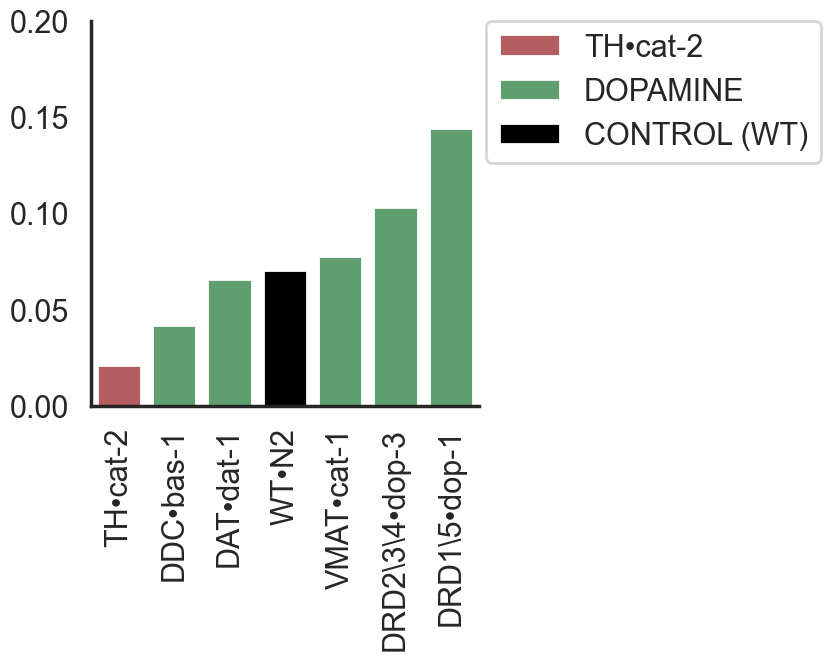

In [271]:
Title = "Basal Slowing (Speed Off Food - Speed On Food), mm/s" #<---------------- Input Here -----------------
FileName = "BSR Screen Complete DOPAMINE July 15"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
                 y = 'speed', 
                 data = speed_diff_orthology_sig[speed_diff_orthology_sig.Category.isin(["DOPAMINE", "CONTROL (WT)","TH•cat-2"])].sort_values(by=['speed']), #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Category',
                 palette = [sns.color_palette()[3],sns.color_palette()[2],'black'],
                #  palette = [sns.color_palette()[1],sns.color_palette()[0],sns.color_palette()[3],'black'],
                 # legend = False
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )

sns.despine()
# sns.move_legend(ax, "center left", bbox_to_anchor=(2,2))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("")
plt.ylim(top = 0.20)
# plt.ylim(bottom = -0.03)
plt.title("")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
print(len(speed_diff_orthology['Human Gene'].unique()))

# Now For The Rest Of The Behavioural Features

print(speed_diff_orthology)
speed_diff_orthology.to_csv('/Users/Joseph/Desktop/BSRScreen_SpeedDiffs_Orthology.csv')

In [180]:
print(BSR_Data)

                         Group          Genotype      Gene   Allele Treatment  \
0     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
1     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
2     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
3     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
4     C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   OffFood   
...                        ...               ...       ...      ...       ...   
2318    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2319    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2320    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2321    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   
2322    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785    OnFood   

      plate_id      date  w

In [277]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
def differences(df):
    all_scores = pd.DataFrame(df.Gene.unique(), columns = ['Gene'])
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = df[['Gene', 'Treatment', parameter]]
        avg_parameter = worm_avg_parameter.groupby(['Treatment', 'Gene'], as_index=False).mean()
        print(avg_parameter)
        print("-"*50)
        parameter_diff = avg_parameter.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
        print(parameter_diff)
        parameter_diff.insert(loc=0, column='Gene', value = avg_parameter['Gene'].unique())
        parameter_diff.reset_index(drop=True)
        print("-"*50)
        print(parameter_diff)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        # # parameter_diff = parameter_diff.drop(columns = [parameter])
        # parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        # parameter_diff = parameter_diff.reset_index(drop = True)
        print(parameter_diff)
        print(all_scores)
        all_scores = all_scores.merge(parameter_diff,on="Gene",how='left',validate="1:1")
    all_scores = all_scores.set_index("Gene")
    return(all_scores)
def allele_differences(df):
    all_scores = pd.DataFrame(df.Genotype.unique(), columns = ['Genotype'])
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = df[['Genotype', 'Treatment', parameter]]
        avg_parameter = worm_avg_parameter.groupby(['Treatment', 'Genotype'], as_index=False).mean()
        print(avg_parameter)
        print("-"*50)
        parameter_diff = avg_parameter.drop(columns=["Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
        print(parameter_diff)
        parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
        parameter_diff.reset_index(drop=True)
        print("-"*50)
        print(parameter_diff)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        # # parameter_diff = parameter_diff.drop(columns = [parameter])
        # parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        # parameter_diff = parameter_diff.reset_index(drop = True)
        print(parameter_diff)
        print(all_scores)
        all_scores = all_scores.merge(parameter_diff,on="Genotype",how='left',validate="1:1")
    all_scores = all_scores.set_index("Genotype")
    return(all_scores)

In [329]:
BSR_Differences = differences(BSR_Data)
print(BSR_Differences)

    Treatment      Gene     speed
0     OffFood  C29E4.10  0.225740
1     OffFood   F53B2.5  0.123559
2     OffFood  F54B11.5  0.194966
3     OffFood        N2  0.211031
4     OffFood   R07G3.8  0.161423
..        ...       ...       ...
203    OnFood    unc-26  0.040425
204    OnFood    unc-43  0.090512
205    OnFood    unc-57  0.030208
206    OnFood    unc-70  0.055663
207    OnFood    vps-35  0.051642

[208 rows x 3 columns]
--------------------------------------------------
        speed
0    0.084863
1    0.070215
2    0.088286
3    0.070568
4    0.113898
..        ...
99  -0.011763
100  0.015082
101 -0.008624
102  0.018503
103  0.023371

[104 rows x 1 columns]
--------------------------------------------------
         Gene     speed
0    C29E4.10  0.084863
1     F53B2.5  0.070215
2    F54B11.5  0.088286
3          N2  0.070568
4     R07G3.8  0.113898
..        ...       ...
99     unc-26 -0.011763
100    unc-43  0.015082
101    unc-57 -0.008624
102    unc-70  0.018503
103    vps

In [330]:
BSR_Differences = BSR_Differences.reset_index(drop=False)
BSR_Differences

Diff_orthology=pd.merge(BSR_Differences,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

print(Diff_orthology)
Diff_orthology=Diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(Diff_orthology)
print("-"*50)
print(Diff_orthology[Diff_orthology['Gene'].isna()])

         Gene     speed  angularspeed      bias     curve      crab  \
0    C29E4.10  0.084863      5.068528 -0.115822  1.063743  0.010529   
1     F53B2.5  0.070215     10.580215 -0.154711  6.811138  0.009557   
2    F54B11.5  0.088286      8.502814 -0.231334  2.844587  0.013119   
3          N2  0.070568      7.870733 -0.166412  3.151964  0.011523   
4     R07G3.8  0.113898      6.439586  0.446815  3.804670  0.007915   
..        ...       ...           ...       ...       ...       ...   
101    scav-1  0.104215      8.835486  0.362437  2.419115  0.009411   
102     gly-7  0.055555      8.449504 -0.234272  5.574486  0.012185   
103     gyf-1  0.054443      4.288787 -0.121016  2.743629  0.005517   
104    unc-26 -0.011763     -0.116752  0.032720  0.648262  0.000205   
105     dat-1  0.066021      7.189445 -0.238190  2.444008  0.008866   

          kink             Orthology    Human Gene      Category  
0     1.442701         GALC•C29E4.10          GALC          GWAS  
1    15.25322

In [292]:
BSR_Allele_Differences = allele_differences(BSR_Data)
BSR_Allele_Differences = BSR_Allele_Differences.reset_index(drop = False)
BSR_Allele_Differences[['Gene', 'Allele']] = BSR_Allele_Differences.Genotype.str.split(pat="(", expand=True)
BSR_Allele_Differences['Allele'] = BSR_Allele_Differences.Allele.str.split(pat=")", expand=True)[0]
BSR_Allele_Differences['Allele'] = BSR_Allele_Differences.Allele.fillna("N2")
print(BSR_Allele_Differences)

    Treatment          Genotype     speed
0     OffFood  C29E4.10(ok2752)  0.225740
1     OffFood    F53B2.5(ok226)  0.123559
2     OffFood   F54B11.5(ve743)  0.194966
3     OffFood                N2  0.211031
4     OffFood   R07G3.8(tm5683)  0.161423
..        ...               ...       ...
327    OnFood      unc-57(e406)  0.024960
328    OnFood     unc-57(ok310)  0.033912
329    OnFood      unc-70(e524)  0.055663
330    OnFood      vps-35(hu68)  0.041059
331    OnFood    vps-35(ok1880)  0.054421

[332 rows x 3 columns]
--------------------------------------------------
        speed
0    0.084863
1    0.070215
2    0.088286
3    0.070568
4    0.113898
..        ...
161  0.006867
162 -0.014036
163  0.018503
164  0.018648
165  0.028061

[166 rows x 1 columns]
--------------------------------------------------
             Genotype     speed
0    C29E4.10(ok2752)  0.084863
1      F53B2.5(ok226)  0.070215
2     F54B11.5(ve743)  0.088286
3                  N2  0.070568
4     R07G3.8(tm56

In [293]:
BSR_Allele_Differences

Genotype     speed  angularspeed      bias     curve      crab  \
0    C29E4.10(ok2752)  0.084863      5.068528 -0.115822  1.063743  0.010529   
1      F53B2.5(ok226)  0.070215     10.580215 -0.154711  6.811138  0.009557   
2     F54B11.5(ve743)  0.088286      8.502814 -0.231334  2.844587  0.013119   
3                  N2  0.070568      7.870733 -0.166412  3.151964  0.011523   
4     R07G3.8(tm5683)  0.113898      6.439586  0.446815  3.804670  0.007915   
..                ...       ...           ...       ...       ...       ...   
161     ubh-3(tm2550)  0.053598      4.362802 -0.060191  3.174495  0.006103   
162     unc-26(e1196) -0.011763     -0.116752  0.032720  0.648262  0.000205   
163      dat-1(ok157)  0.066021      7.189445 -0.238190  2.444008  0.008866   
164     gba-3(gk3827)  0.092866      7.654036 -0.333009  2.049666  0.011111   
165      pdr-1(tm395)  0.116288      6.956862 -0.190100  4.196040  0.012715   

          kink      Gene  Allele  
0     1.442701  C29E4.10  ok2752  
1    15.253227   F53B2.5   ok226  
2     6.918575  F54B11.5   ve743  
3     7.421077        N2      N2  
4     1.050020   R07G3.8  tm5683  
..         ...       ...     ...  
161   6.870534     ubh-3  tm2550  
162   4.579971    unc-26   e1196  
163   2.627146     dat-1   ok157  
164   4.330701     gba-3  gk3827  
165   6.130146     pdr-1   tm395  

[166 rows x 9 columns]

In [295]:
Gene_Orthology

Orthology    Gene Human Gene Category
0      KCNS3•kvs-5   kvs-5      KCNS3     GWAS
1      LAMB2•lam-1   lam-1      LAMB2     GWAS
2        GBA•gba-4   gba-4        GBA     GWAS
3     MCCC1•mccc-1  mccc-1      MCCC1     GWAS
4    CAMK2D•unc-43  unc-43     CAMK2D     GWAS
..             ...     ...        ...      ...
120  KIF21B•klp-12  klp-12     KIF21B     GWAS
121   ZRANB3•csb-1   csb-1     ZRANB3     GWAS
122   SYNJ1•unc-26  unc-26      SYNJ1     PARK
123   GIGYF2•gyf-1   gyf-1     GIGYF2     PARK
124  WBSCR17•gly-7   gly-7    WBSCR17     GWAS

[125 rows x 4 columns]

In [297]:
Diff_orthology_allele=pd.merge(BSR_Allele_Differences,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

print(Diff_orthology_allele)
print("-"*50)
Diff_orthology_allele=Diff_orthology_allele.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(Diff_orthology_allele)
print("-"*50)
print(Diff_orthology_allele[Diff_orthology_allele['Gene'].isna()])

             Genotype     speed  angularspeed      bias     curve      crab  \
0    C29E4.10(ok2752)  0.084863      5.068528 -0.115822  1.063743  0.010529   
1      F53B2.5(ok226)  0.070215     10.580215 -0.154711  6.811138  0.009557   
2     F54B11.5(ve743)  0.088286      8.502814 -0.231334  2.844587  0.013119   
3                  N2  0.070568      7.870733 -0.166412  3.151964  0.011523   
4     R07G3.8(tm5683)  0.113898      6.439586  0.446815  3.804670  0.007915   
..                ...       ...           ...       ...       ...       ...   
164     ubh-3(tm2550)  0.053598      4.362802 -0.060191  3.174495  0.006103   
165     unc-26(e1196) -0.011763     -0.116752  0.032720  0.648262  0.000205   
166      dat-1(ok157)  0.066021      7.189445 -0.238190  2.444008  0.008866   
167     gba-3(gk3827)  0.092866      7.654036 -0.333009  2.049666  0.011111   
168      pdr-1(tm395)  0.116288      6.956862 -0.190100  4.196040  0.012715   

          kink      Gene  Allele             Orthol

In [341]:

Diff_orthology_allele['Strain'] = Diff_orthology_allele.Gene + "(" + Diff_orthology_allele.Allele + ")"
Diff_orthology_allele

Genotype     speed  angularspeed      bias     curve      crab  \
0    C29E4.10(ok2752)  0.084863      5.068528 -0.115822  1.063743  0.010529   
1      F53B2.5(ok226)  0.070215     10.580215 -0.154711  6.811138  0.009557   
2     F54B11.5(ve743)  0.088286      8.502814 -0.231334  2.844587  0.013119   
3                  N2  0.070568      7.870733 -0.166412  3.151964  0.011523   
4     R07G3.8(tm5683)  0.113898      6.439586  0.446815  3.804670  0.007915   
..                ...       ...           ...       ...       ...       ...   
164     ubh-3(tm2550)  0.053598      4.362802 -0.060191  3.174495  0.006103   
165     unc-26(e1196) -0.011763     -0.116752  0.032720  0.648262  0.000205   
166      dat-1(ok157)  0.066021      7.189445 -0.238190  2.444008  0.008866   
167     gba-3(gk3827)  0.092866      7.654036 -0.333009  2.049666  0.011111   
168      pdr-1(tm395)  0.116288      6.956862 -0.190100  4.196040  0.012715   

          kink Worm Gene  Allele                  Gene    Human Gene  \
0     1.442701  C29E4.10  ok2752         GALC•C29E4.10          GALC   
1    15.253227   F53B2.5   ok226         KPNA1•F53B2.5         KPNA1   
2     6.918575  F54B11.5   ve743       RNF141•F54B11.5        RNF141   
3     7.421077        N2      N2                 WT•N2            WT   
4     1.050020   R07G3.8  tm5683  FAM49B\CYRIB•R07G3.8  FAM49B\CYRIB   
..         ...       ...     ...                   ...           ...   
164   6.870534     ubh-3  tm2550           UCHL1•ubh-3         UCHL1   
165   4.579971    unc-26   e1196          SYNJ1•unc-26         SYNJ1   
166   2.627146     dat-1   ok157             DAT•dat-1           DAT   
167   4.330701     gba-3  gk3827             GBA•gba-3           GBA   
168   6.130146     pdr-1   tm395            PRKN•pdr-1          PRKN   

         Category                        Strain  
0            GWAS         GALC•C29E4.10(ok2752)  
1            GWAS          KPNA1•F53B2.5(ok226)  
2            GWAS        RNF141•F54B11.5(ve743)  
3    CONTROL (WT)                     WT•N2(N2)  
4            GWAS  FAM49B\CYRIB•R07G3.8(tm5683)  
..            ...                           ...  
164          PARK           UCHL1•ubh-3(tm2550)  
165          PARK           SYNJ1•unc-26(e1196)  
166      DOPAMINE              DAT•dat-1(ok157)  
167          GWAS             GBA•gba-3(gk3827)  
168          PARK             PRKN•pdr-1(tm395)  

[169 rows x 13 columns]

In [314]:
print(Diff_orthology_allele.shape)
print(Diff_orthology_allele.Category.unique())
print(len(Diff_orthology_allele['Human Gene'].unique()))

(169, 12)
['GWAS' 'CONTROL (WT)' 'PARK' 'DOPAMINE' 'TH•cat-2']
71


In [328]:
# len(Diff_orthology_allele[Diff_orthology_allele.Category.isin(['PARK'])]['Human Gene'].unique())
len(Diff_orthology_allele[Diff_orthology_allele.Category.isin(['GWAS', 'PARK'])]['Gene'].unique())
# Diff_orthology_allele[Diff_orthology_allele.Category.isin(['DOPAMINE','TH•cat-2'])]
# Diff_orthology_allele.to_csv('/Users/Joseph/Desktop/DiffOrthologyByAlleleJuly15.csv')
# len(Diff_orthology_allele.Gene.unique())

97

In [337]:
Diff_orthology

Worm Gene     speed  angularspeed      bias     curve      crab  \
0    C29E4.10  0.084863      5.068528 -0.115822  1.063743  0.010529   
1     F53B2.5  0.070215     10.580215 -0.154711  6.811138  0.009557   
2    F54B11.5  0.088286      8.502814 -0.231334  2.844587  0.013119   
3          N2  0.070568      7.870733 -0.166412  3.151964  0.011523   
4     R07G3.8  0.113898      6.439586  0.446815  3.804670  0.007915   
..        ...       ...           ...       ...       ...       ...   
101    scav-1  0.104215      8.835486  0.362437  2.419115  0.009411   
102     gly-7  0.055555      8.449504 -0.234272  5.574486  0.012185   
103     gyf-1  0.054443      4.288787 -0.121016  2.743629  0.005517   
104    unc-26 -0.011763     -0.116752  0.032720  0.648262  0.000205   
105     dat-1  0.066021      7.189445 -0.238190  2.444008  0.008866   

          kink                  Gene    Human Gene      Category  
0     1.442701         GALC•C29E4.10          GALC          GWAS  
1    15.253227         KPNA1•F53B2.5         KPNA1          GWAS  
2     6.918575       RNF141•F54B11.5        RNF141          GWAS  
3     7.421077                 WT•N2            WT  CONTROL (WT)  
4     1.050020  FAM49B\CYRIB•R07G3.8  FAM49B\CYRIB          GWAS  
..         ...                   ...           ...           ...  
101   1.024296         SCARB2•scav-1        SCARB2          GWAS  
102  13.065193         WBSCR17•gly-7       WBSCR17          GWAS  
103   5.707154          GIGYF2•gyf-1        GIGYF2          PARK  
104   4.579971          SYNJ1•unc-26         SYNJ1          PARK  
105   2.627146             DAT•dat-1           DAT      DOPAMINE  

[106 rows x 10 columns]

In [339]:
len(Diff_orthology[Diff_orthology.Category == "PARK"].Gene.unique())

16

In [331]:
metrics = ['speed', 'angularspeed', 'bias', 'curve', 
           'crab', 'kink']

metric_chooser = widgets.Select(options=metrics, value=metrics[0], description='Select Metric:')
display(metric_chooser)

Select(description='Select Metric:', options=('speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink'), value…

<Figure size 640x480 with 0 Axes>

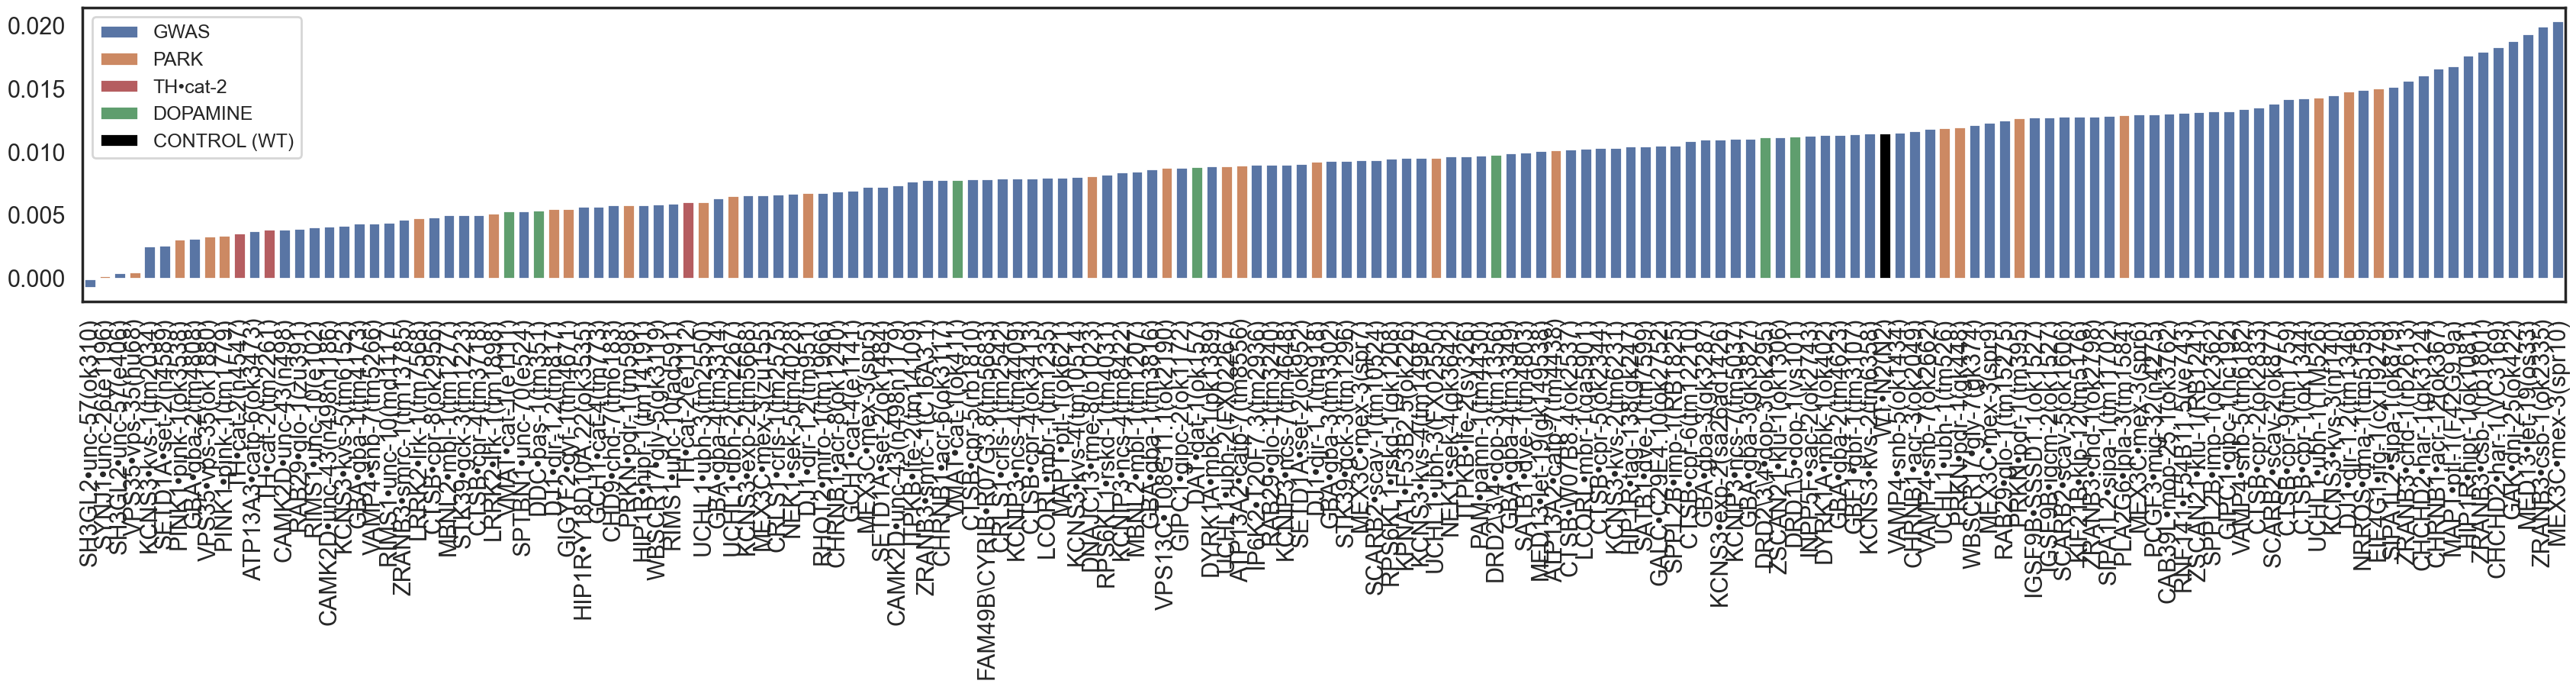

In [355]:
metric=metric_chooser.value
Title = "" #<---------------- Input Here -----------------
FileName = f"BSR Screen Complete {metric}"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(42, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Strain", 
                 y = f'{metric}', 
                 data = Diff_orthology.sort_values(by=[f'{metric}']), #<--------------- Input Here -------------
                #  data = Diff_orthology_allele.sort_values(by=[f'{metric}']), #<--------------- Input Here -------------
                 hue = 'Category',
                 palette = [sns.color_palette()[0],sns.color_palette()[1],sns.color_palette()[3],sns.color_palette()[2],'black'],
                )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [274]:
# Diff_orthology[Diff_orthology.Category.isin(["GWAS","PARK"])]
Diff_orthology

Worm Gene  Speed Difference  Angular Speed Difference  Bias Difference  \
0    C29E4.10          0.084863                  5.068528        -0.115822   
1     F53B2.5          0.070215                 10.580215        -0.154711   
2    F54B11.5          0.088286                  8.502814        -0.231334   
3          N2          0.070568                  7.870733        -0.166412   
4     R07G3.8          0.113898                  6.439586         0.446815   
..        ...               ...                       ...              ...   
101    scav-1          0.104215                  8.835486         0.362437   
102     gly-7          0.055555                  8.449504        -0.234272   
103     gyf-1          0.054443                  4.288787        -0.121016   
104    unc-26         -0.011763                 -0.116752         0.032720   
105     dat-1          0.066021                  7.189445        -0.238190   

     Curve Difference  Crab Difference  Kink Difference                  Gene  \
0            1.063743         0.010529         1.442701         GALC•C29E4.10   
1            6.811138         0.009557        15.253227         KPNA1•F53B2.5   
2            2.844587         0.013119         6.918575       RNF141•F54B11.5   
3            3.151964         0.011523         7.421077                 WT•N2   
4            3.804670         0.007915         1.050020  FAM49B\CYRIB•R07G3.8   
..                ...              ...              ...                   ...   
101          2.419115         0.009411         1.024296         SCARB2•scav-1   
102          5.574486         0.012185        13.065193         WBSCR17•gly-7   
103          2.743629         0.005517         5.707154          GIGYF2•gyf-1   
104          0.648262         0.000205         4.579971          SYNJ1•unc-26   
105          2.444008         0.008866         2.627146             DAT•dat-1   

       Human Gene      Category  
0            GALC          GWAS  
1           KPNA1          GWAS  
2          RNF141          GWAS  
3              WT  CONTROL (WT)  
4    FAM49B\CYRIB          GWAS  
..            ...           ...  
101        SCARB2          GWAS  
102       WBSCR17          GWAS  
103        GIGYF2          PARK  
104         SYNJ1          PARK  
105           DAT      DOPAMINE  

[106 rows x 10 columns]

In [197]:
Diff_orthology.to_csv('/Users/Joseph/Desktop/BSRScreen_Diffs_Orthology.csv')

# T-Tests For Features

In [7]:
BSR_Data

Group          Genotype      Gene   Allele  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10   ok2752   
...                         ...               ...       ...      ...   
78483    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78484    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78485    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78486    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   
78487    smrc-1(tm13785)_OnFood   smrc-1(tm13785)    smrc-1  tm13785   

      Treatment  plate_id      date  worm  time_bin        time     speed  \
0       OffFood     90842  20240815     2     362.0  361.497837  0.216780   
1       OffFood     90842  20240815     3     319.5  319.003003  0.198285   
2       OffFood     90842  20240815    13     395.5  395.011394  0.213610   
3       OffFood     90842  20240815    14     302.5  301.981691  0.224755   
4       OffFood     90842  20240815    17     322.0  321.505312  0.265168   
...         ...       ...       ...   ...       ...         ...       ...   
78483    OnFood    100244  20250322    93     341.0  340.497208  0.125756   
78484    OnFood    100244  20250322    95     307.0  306.477149  0.127046   
78485    OnFood    100244  20250322    96     304.0  303.468317  0.236558   
78486    OnFood    100244  20250322    97     305.5  304.982494  0.075737   
78487    OnFood    100244  20250322    98     350.5  349.999344  0.160474   

               x          y  angularspeed  pathlength       kink      bias  \
0      23.739081  31.837911     12.340918    2.265208  59.659527  0.555807   
1      14.734667  47.567764     13.402628    6.605844  58.006378  0.977679   
2      22.991654  42.433511     14.726721    1.046752  58.586022  1.000000   
3      43.579099  37.484400     14.386366   12.909921  55.507687  0.961538   
4      22.113133  43.969759     13.815320    3.552500  48.547745  0.989418   
...          ...        ...           ...         ...        ...       ...   
78483  10.990115  35.883902      7.287016   41.023678  39.539288  0.989198   
78484  30.623298  48.954756      3.332326   21.926958  32.505447  0.916667   
78485  24.329687  42.109583      4.062769   40.414269  34.560397  0.942857   
78486  22.959398  43.074019      2.674893   20.485975  44.670722  0.941667   
78487  29.366075  27.514204      7.784355   39.791015  47.749306  0.991218   

           curve       dir      crab    length   midline     width  \
0      35.919010  0.002219  0.024609  0.974126  1.226183  0.287691   
1      38.539116  0.003824  0.026216  1.033487  1.295890  0.302002   
2      38.962963  0.000917  0.030576  1.003890  1.273466  0.317195   
3      41.571123  0.000574  0.034272  0.934712  1.182566  0.284480   
4      34.715602  0.000787  0.033891  1.045385  1.280736  0.292197   
...          ...       ...       ...       ...       ...       ...   
78483  34.143948  0.000321  0.015033  0.804094  0.972606  0.218191   
78484  28.438913  0.000218  0.004308  0.947426  1.078355  0.164799   
78485  31.647942  0.000103  0.016233  1.019542  1.120191  0.170107   
78486  31.295573  0.000000  0.006921  0.799742  1.030883  0.224048   
78487  32.406900  0.000708  0.015510  0.933148  1.129079  0.240257   

       morphwidth      area  
0        0.123186  0.140534  
1        0.129382  0.148725  
2        0.136351  0.142743  
3        0.149332  0.152765  
4        0.125675  0.144789  
...           ...       ...  
78483    0.119468  0.112210  
78484    0.096561  0.116067  
78485    0.112773  0.123308  
78486    0.112004  0.122510  
78487    0.114208  0.130966  

[78488 rows x 25 columns]

In [357]:
list = BSR_Data["Gene"].unique()
print(list)
print(len(list))

['C29E4.10' 'F53B2.5' 'F54B11.5' 'N2' 'R07G3.8' 'SSSD1.1' 'T08G11.1'
 'T20F7.3' 'W07B8.4' 'Y18D10A.22' 'acr-12' 'acr-3' 'acr-6' 'acr-8' 'bas-1'
 'cat-1' 'cat-2' 'cat-4' 'catp-6' 'catp-7' 'chd-1' 'chd-7' 'cpr-1' 'cpr-2'
 'cpr-4' 'cpr-5' 'cpr-6' 'cpr-8' 'cpr-9' 'crls-1' 'csb-1' 'djr-1.1'
 'djr-1.2' 'dma-1' 'dnj-25' 'dop-1' 'dop-3' 'dve-1' 'exp-2' 'gba-1'
 'gba-2' 'gba-3' 'gba-4' 'gbf-1' 'gck-3' 'gipc-1' 'gipc-2' 'glo-1' 'gly-5'
 'har-1' 'hipr-1' 'ifg-1' 'igcm-2' 'imp-1' 'ipla-3' 'klp-12' 'klu-1'
 'kvs-1' 'kvs-2' 'kvs-3' 'kvs-4' 'kvs-5' 'let-19' 'lfe-2' 'lrk-1' 'mbk-1'
 'mbl-1' 'mbr-1' 'mex-3' 'mig-32' 'miro-1' 'mop-25.1' 'ncs-4' 'ncs-7'
 'pamn-1' 'pdr-1' 'pink-1' 'ptl-1' 'rme-8' 'rskd-1' 'sac-2' 'scav-2'
 'scav-5' 'sek-4' 'sek-5' 'set-2' 'sipa-1' 'smrc-1' 'snb-5' 'snb-7'
 'tag-138' 'ubh-1' 'ubh-2' 'ubh-3' 'unc-10' 'unc-43' 'unc-57' 'unc-70'
 'vps-35' 'scav-1' 'gly-7' 'gyf-1' 'unc-26' 'dat-1']
104


In [9]:
BSR_Data_OffFood = BSR_Data[BSR_Data["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood',1)
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype',
                                                     'Gene_OffFood': 'Gene',
                                                     'Group_OffFood': 'Group',
                                                     'Treatment_OffFood': 'Treatment'},)
print(BSR_Data_OffFood)
print("-"*50)

BSR_Data_OnFood = BSR_Data[BSR_Data["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood',1)
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype',
                                                    'Gene_OnFood': 'Gene',
                                                    'Group_OnFood': 'Group',
                                                    'Treatment_OnFood': 'Treatment'})
print(BSR_Data_OnFood)

                          Group          Genotype      Gene Allele_OffFood  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10         ok2752   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10         ok2752   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10         ok2752   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10         ok2752   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)  C29E4.10         ok2752   
...                         ...               ...       ...            ...   
78241   smrc-1(tm13785)_OffFood   smrc-1(tm13785)    smrc-1        tm13785   
78242   smrc-1(tm13785)_OffFood   smrc-1(tm13785)    smrc-1        tm13785   
78243   smrc-1(tm13785)_OffFood   smrc-1(tm13785)    smrc-1        tm13785   
78244   smrc-1(tm13785)_OffFood   smrc-1(tm13785)    smrc-1        tm13785   
78245   smrc-1(tm13785)_OffFood   smrc-1(tm13785)    smrc-1        tm13785   

      Treatment  plate_id_OffFood  date_OffFood  worm_OffFood  

In [10]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Gene", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Gene", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Gene", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Gene", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Gene", "area"])

PD_gene_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Gene", "speed_OffFood"])
PD_gene_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Gene", "angularspeed_OffFood"])
PD_gene_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Gene", "bias_OffFood"])
PD_gene_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Gene", "curve_OffFood"])
PD_gene_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Gene", "crab_OffFood"])
PD_gene_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Gene", "kink_OffFood"])

PD_gene_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Gene", "speed_OnFood"])
PD_gene_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Gene", "angularspeed_OnFood"])
PD_gene_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Gene", "bias_OnFood"])
PD_gene_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Gene", "curve_OnFood"])
PD_gene_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Gene", "crab_OnFood"])
PD_gene_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Gene", "kink_OnFood"])

In [11]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type], paired=False,correction='auto')['T'].iloc[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [12]:
TTest_Gene(BSR_Data["Gene"].unique(), "length", BSR_Data, PD_gene_baseline_length_T)
TTest_Gene(BSR_Data["Gene"].unique(), "midline", BSR_Data, PD_gene_baseline_midline_T)
TTest_Gene(BSR_Data["Gene"].unique(), "width", BSR_Data, PD_gene_baseline_width_T)
TTest_Gene(BSR_Data["Gene"].unique(), "morphwidth", BSR_Data, PD_gene_baseline_morphwidth_T)
TTest_Gene(BSR_Data["Gene"].unique(), "area", BSR_Data, PD_gene_baseline_area_T)

TTest_Gene(BSR_Data["Gene"].unique(), "speed_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_speed_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "angularspeed_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_angularspeed_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "bias_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_bias_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "curve_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_curve_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "crab_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_crab_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "kink_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_kink_T_OffFood)

TTest_Gene(BSR_Data["Gene"].unique(), "speed_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_speed_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "angularspeed_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_angularspeed_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "bias_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_bias_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "curve_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_curve_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "crab_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_crab_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "kink_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_kink_T_OnFood)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene     length
0    C29E4.10  10.555847
1     F53B2.5  -8.756424
2    F54B11.5  -5.918814
3          N2   0.000000
4     R07G3.8  -2.919887
..        ...        ...
99     scav-1 -34.493317
100     gly-7 -34.041225
101     gyf-1 -26.544260
102    unc-26 -22.070511
103     dat-1  -6.765069

[104 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene    midline
0    C29E4.10  23.477823
1     F53B2.5 -11.478940
2    F54B11.5  -0.860078
3          N2   0.000000
4     R07G3.8 -12.667871
..        ...        ...
99     scav-1 -48.332828
100     gly-7 -44.806693
101     gyf-1 -47.188147
102    unc-26 -23.200330
103     dat-1  -8.363395

[104 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene      width
0    C29E4.10  24.548200
1     F53B2.5  -3.222091
2    F54B11.5   7.490784
3          N2   0.000000
4     R07G3.8 -15.532484
..        ...        ...
99     scav-1 -21.570790
100     gly-7 -21.106319
101     gyf-1 -50.884442
102    unc-26 -10.801054
103     dat-1  -5.120806

[104 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene  morphwidth
0    C29E4.10   10.680814
1     F53B2.5    2.593717
2    F54B11.5  -11.344294
3          N2    0.000000
4     R07G3.8   -3.992705
..        ...         ...
99     scav-1  -10.910100
100     gly-7  -20.505009
101     gyf-1  -30.355594
102    unc-26   -3.870284
103     dat-1   -7.983016

[104 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene       area
0    C29E4.10  16.467094
1     F53B2.5  -3.208266
2    F54B11.5 -14.311248
3          N2   0.000000
4     R07G3.8  -5.667228
..        ...        ...
99     scav-1 -34.872640
100     gly-7 -39.562565
101     gyf-1 -43.078538
102    unc-26 -29.919166
103     dat-1 -12.427819

[104 rows x 2 columns]
         Gene  speed_OffFood
0    C29E4.10       6.251101
1     F53B2.5      -8.787363
2    F54B11.5      -5.914388
3          N2       0.000000
4     R07G3.8     -17.637788
..        ...            ...
99     scav-1     -24.113130
100     gly-7      -5.309867
101     gyf-1     -23.708236
102    unc-26     -31.853173
103     dat-1      -3.503168

[104 rows x 2 columns]
         Gene  angularspeed_OffFood
0    C29E4.10              3.748791
1     F53B2.5             -0.610707
2    F54B11.5             -0.208119
3          N2              0.000000
4     R07G3.8            -20.536931
..        ...                   ...
99     scav-1             -5.140659
100     gly-7   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene  crab_OffFood
0    C29E4.10     10.262671
1     F53B2.5     -4.858388
2    F54B11.5     -1.830262
3          N2      0.000000
4     R07G3.8    -32.400024
..        ...           ...
99     scav-1    -24.847897
100     gly-7     -0.310039
101     gyf-1    -40.407606
102    unc-26    -47.540278
103     dat-1     -5.852208

[104 rows x 2 columns]
         Gene  kink_OffFood
0    C29E4.10      7.857893
1     F53B2.5      3.523665
2    F54B11.5      8.749970
3          N2      0.000000
4     R07G3.8    -11.355850
..        ...           ...
99     scav-1    -12.303859
100     gly-7     -1.863588
101     gyf-1    -29.577234
102    unc-26      0.712556
103     dat-1     -1.268601

[104 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


         Gene  speed_OnFood
0    C29E4.10      0.149091
1     F53B2.5    -19.977027
2    F54B11.5    -13.235049
3          N2      0.000000
4     R07G3.8    -36.341403
..        ...           ...
99     scav-1    -42.523537
100     gly-7      4.201596
101     gyf-1    -11.366118
102    unc-26     -6.186203
103     dat-1     -3.545690

[104 rows x 2 columns]
         Gene  angularspeed_OnFood
0    C29E4.10            13.211643
1     F53B2.5           -10.289529
2    F54B11.5            -3.485038
3          N2             0.000000
4     R07G3.8           -25.004895
..        ...                  ...
99     scav-1           -14.959425
100     gly-7             0.876374
101     gyf-1           -11.787986
102    unc-26             0.397330
103     dat-1             1.706268

[104 rows x 2 columns]
         Gene  bias_OnFood
0    C29E4.10    -2.709585
1     F53B2.5    -6.456006
2    F54B11.5     1.051614
3          N2     0.000000
4     R07G3.8   -20.589170
..        ...          ...
99     

In [13]:
print(BSR_Data["Gene"].unique())
print(BSR_Data[BSR_Data.Gene == "N2"]["length"])

['C29E4.10' 'F53B2.5' 'F54B11.5' 'N2' 'R07G3.8' 'SSSD1.1' 'T08G11.1'
 'T20F7.3' 'W07B8.4' 'Y18D10A.22' 'acr-12' 'acr-3' 'acr-6' 'acr-8' 'bas-1'
 'cat-1' 'cat-2' 'cat-4' 'catp-6' 'catp-7' 'chd-1' 'chd-7' 'cpr-1' 'cpr-2'
 'cpr-4' 'cpr-5' 'cpr-6' 'cpr-8' 'cpr-9' 'crls-1' 'csb-1' 'djr-1.1'
 'djr-1.2' 'dma-1' 'dnj-25' 'dop-1' 'dop-3' 'dve-1' 'exp-2' 'gba-1'
 'gba-2' 'gba-3' 'gba-4' 'gbf-1' 'gck-3' 'gipc-1' 'gipc-2' 'glo-1' 'gly-5'
 'har-1' 'hipr-1' 'ifg-1' 'igcm-2' 'imp-1' 'ipla-3' 'klp-12' 'klu-1'
 'kvs-1' 'kvs-2' 'kvs-3' 'kvs-4' 'kvs-5' 'let-19' 'lfe-2' 'lrk-1' 'mbk-1'
 'mbl-1' 'mbr-1' 'mex-3' 'mig-32' 'miro-1' 'mop-25.1' 'ncs-4' 'ncs-7'
 'pamn-1' 'pdr-1' 'pink-1' 'ptl-1' 'rme-8' 'rskd-1' 'sac-2' 'scav-2'
 'scav-5' 'sek-4' 'sek-5' 'set-2' 'sipa-1' 'smrc-1' 'snb-5' 'snb-7'
 'tag-138' 'ubh-1' 'ubh-2' 'ubh-3' 'unc-10' 'unc-43' 'unc-57' 'unc-70'
 'vps-35' 'scav-1' 'gly-7' 'gyf-1' 'unc-26' 'dat-1']
1314     0.877519
1315     0.873856
1316     1.046160
1317     0.757598
1318     0.925854
      

In [14]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_midline_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_width_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_morphwidth_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_area_T, on='Gene',how='left')

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_speed_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_angularspeed_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_bias_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_curve_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_crab_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_kink_T_OffFood, on='Gene',how='left')

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_speed_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_angularspeed_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_bias_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_curve_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_crab_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_kink_T_OnFood, on='Gene',how='left')

PD_BSR_Screen_Tstats = PD_gene_baseline_Tstats.set_index("Gene")
print(PD_BSR_Screen_Tstats)

             length    midline      width  morphwidth       area  \
Gene                                                               
C29E4.10  10.555847  23.477823  24.548200   10.680814  16.467094   
F53B2.5   -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
F54B11.5  -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
N2         0.000000   0.000000   0.000000    0.000000   0.000000   
R07G3.8   -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
...             ...        ...        ...         ...        ...   
scav-1   -34.493317 -48.332828 -21.570790  -10.910100 -34.872640   
gly-7    -34.041225 -44.806693 -21.106319  -20.505009 -39.562565   
gyf-1    -26.544260 -47.188147 -50.884442  -30.355594 -43.078538   
unc-26   -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
dat-1     -6.765069  -8.363395  -5.120806   -7.983016 -12.427819   

          speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
Gene                                 

In [225]:
PD_BSR_Screen_Tstats.to_csv('/Users/Joseph/Desktop/BSRScreen_Tstat_test.csv')

## TStats by Allele

In [358]:
PD_allele_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_allele_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_allele_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_allele_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_allele_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

PD_allele_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Genotype", "speed_OffFood"])
PD_allele_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OffFood"])
PD_allele_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Genotype", "bias_OffFood"])
PD_allele_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Genotype", "curve_OffFood"])
PD_allele_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Genotype", "crab_OffFood"])
PD_allele_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Genotype", "kink_OffFood"])

PD_allele_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Genotype", "speed_OnFood"])
PD_allele_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OnFood"])
PD_allele_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Genotype", "bias_OnFood"])
PD_allele_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Genotype", "curve_OnFood"])
PD_allele_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Genotype", "crab_OnFood"])
PD_allele_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Genotype", "kink_OnFood"])

In [359]:
def TTest_Allele(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type], paired=False,correction='auto')['T'].iloc[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [360]:
TTest_Allele(BSR_Data["Genotype"].unique(), "length", BSR_Data, PD_allele_baseline_length_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "midline", BSR_Data, PD_allele_baseline_midline_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "width", BSR_Data, PD_allele_baseline_width_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "morphwidth", BSR_Data, PD_allele_baseline_morphwidth_T)
TTest_Allele(BSR_Data["Genotype"].unique(), "area", BSR_Data, PD_allele_baseline_area_T)

TTest_Allele(BSR_Data["Genotype"].unique(), "speed_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_speed_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "angularspeed_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_angularspeed_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "bias_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_bias_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "curve_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_curve_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "crab_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_crab_T_OffFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "kink_OffFood",
           BSR_Data_OffFood, PD_allele_baseline_kink_T_OffFood)

TTest_Allele(BSR_Data["Genotype"].unique(), "speed_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_speed_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "angularspeed_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_angularspeed_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "bias_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_bias_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "curve_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_curve_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "crab_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_crab_T_OnFood)
TTest_Allele(BSR_Data["Genotype"].unique(), "kink_OnFood",
           BSR_Data_OnFood, PD_allele_baseline_kink_T_OnFood)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype     length
0    C29E4.10(ok2752)  10.555847
1      F53B2.5(ok226)  -8.756424
2     F54B11.5(ve743)  -5.918814
3                  N2   0.000000
4     R07G3.8(tm5683)  -2.919887
..                ...        ...
161     ubh-3(tm2550)  -2.475445
162     unc-26(e1196) -22.070511
163      dat-1(ok157)  -6.765069
164     gba-3(gk3827)  -0.201029
165      pdr-1(tm395)  16.454632

[166 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype    midline
0    C29E4.10(ok2752)  23.477823
1      F53B2.5(ok226) -11.478940
2     F54B11.5(ve743)  -0.860078
3                  N2   0.000000
4     R07G3.8(tm5683) -12.667871
..                ...        ...
161     ubh-3(tm2550) -17.280450
162     unc-26(e1196) -23.200330
163      dat-1(ok157)  -8.363395
164     gba-3(gk3827)  -0.672674
165      pdr-1(tm395)  17.511274

[166 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype      width
0    C29E4.10(ok2752)  24.548200
1      F53B2.5(ok226)  -3.222091
2     F54B11.5(ve743)   7.490784
3                  N2   0.000000
4     R07G3.8(tm5683) -15.532484
..                ...        ...
161     ubh-3(tm2550) -33.510455
162     unc-26(e1196) -10.801054
163      dat-1(ok157)  -5.120806
164     gba-3(gk3827)  -2.285398
165      pdr-1(tm395)  -4.251135

[166 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype  morphwidth
0    C29E4.10(ok2752)   10.680814
1      F53B2.5(ok226)    2.593717
2     F54B11.5(ve743)  -11.344294
3                  N2    0.000000
4     R07G3.8(tm5683)   -3.992705
..                ...         ...
161     ubh-3(tm2550)  -11.142929
162     unc-26(e1196)   -3.870284
163      dat-1(ok157)   -7.983016
164     gba-3(gk3827)   -6.262696
165      pdr-1(tm395)   -5.781678

[166 rows x 2 columns]
             Genotype       area
0    C29E4.10(ok2752)  16.467094
1      F53B2.5(ok226)  -3.208266
2     F54B11.5(ve743) -14.311248
3                  N2   0.000000
4     R07G3.8(tm5683)  -5.667228
..                ...        ...
161     ubh-3(tm2550) -10.793681
162     unc-26(e1196) -29.919166
163      dat-1(ok157) -12.427819
164     gba-3(gk3827)  -5.717454
165      pdr-1(tm395)   9.944097

[166 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype  speed_OffFood
0    C29E4.10(ok2752)       6.251101
1      F53B2.5(ok226)      -8.787363
2     F54B11.5(ve743)      -5.914388
3                  N2       0.000000
4     R07G3.8(tm5683)     -17.637788
..                ...            ...
161     ubh-3(tm2550)     -27.521174
162     unc-26(e1196)     -31.853173
163      dat-1(ok157)      -3.503168
164     gba-3(gk3827)      -3.436154
165      pdr-1(tm395)      -0.630689

[166 rows x 2 columns]
             Genotype  angularspeed_OffFood
0    C29E4.10(ok2752)              3.748791
1      F53B2.5(ok226)             -0.610707
2     F54B11.5(ve743)             -0.208119
3                  N2              0.000000
4     R07G3.8(tm5683)            -20.536931
..                ...                   ...
161     ubh-3(tm2550)            -34.612808
162     unc-26(e1196)             -6.160476
163      dat-1(ok157)             -0.440442
164     gba-3(gk3827)             -3.177624
165      pdr-1(tm395)            -10.339958

[16

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype  crab_OffFood
0    C29E4.10(ok2752)     10.262671
1      F53B2.5(ok226)     -4.858388
2     F54B11.5(ve743)     -1.830262
3                  N2      0.000000
4     R07G3.8(tm5683)    -32.400024
..                ...           ...
161     ubh-3(tm2550)    -41.182587
162     unc-26(e1196)    -47.540278
163      dat-1(ok157)     -5.852208
164     gba-3(gk3827)     -2.700254
165      pdr-1(tm395)     -5.651422

[166 rows x 2 columns]
             Genotype  kink_OffFood
0    C29E4.10(ok2752)      7.857893
1      F53B2.5(ok226)      3.523665
2     F54B11.5(ve743)      8.749970
3                  N2      0.000000
4     R07G3.8(tm5683)    -11.355850
..                ...           ...
161     ubh-3(tm2550)    -19.149620
162     unc-26(e1196)      0.712556
163      dat-1(ok157)     -1.268601
164     gba-3(gk3827)      0.107290
165      pdr-1(tm395)     -2.177650

[166 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype  speed_OnFood
0    C29E4.10(ok2752)      0.149091
1      F53B2.5(ok226)    -19.977027
2     F54B11.5(ve743)    -13.235049
3                  N2      0.000000
4     R07G3.8(tm5683)    -36.341403
..                ...           ...
161     ubh-3(tm2550)    -15.176072
162     unc-26(e1196)     -6.186203
163      dat-1(ok157)     -3.545690
164     gba-3(gk3827)     -9.873750
165      pdr-1(tm395)    -13.522514

[166 rows x 2 columns]
             Genotype  angularspeed_OnFood
0    C29E4.10(ok2752)            13.211643
1      F53B2.5(ok226)           -10.289529
2     F54B11.5(ve743)            -3.485038
3                  N2             0.000000
4     R07G3.8(tm5683)           -25.004895
..                ...                  ...
161     ubh-3(tm2550)           -17.177380
162     unc-26(e1196)             0.397330
163      dat-1(ok157)             1.706268
164     gba-3(gk3827)            -3.324027
165      pdr-1(tm395)           -15.016295

[166 rows x 2 columns]
    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


             Genotype  crab_OnFood
0    C29E4.10(ok2752)    13.152807
1      F53B2.5(ok226)   -11.457333
2     F54B11.5(ve743)    -8.261178
3                  N2     0.000000
4     R07G3.8(tm5683)   -32.421292
..                ...          ...
161     ubh-3(tm2550)   -22.237839
162     unc-26(e1196)    -5.608303
163      dat-1(ok157)    -1.685565
164     gba-3(gk3827)    -2.519194
165      pdr-1(tm395)   -15.317337

[166 rows x 2 columns]
             Genotype  kink_OnFood
0    C29E4.10(ok2752)    14.049076
1      F53B2.5(ok226)    -0.063747
2     F54B11.5(ve743)     7.657883
3                  N2     0.000000
4     R07G3.8(tm5683)    -0.589873
..                ...          ...
161     ubh-3(tm2550)   -17.763912
162     unc-26(e1196)     0.912247
163      dat-1(ok157)     4.162121
164     gba-3(gk3827)     3.200892
165      pdr-1(tm395)    -0.500496

[166 rows x 2 columns]


In [361]:
PD_allele_baseline_Tstats = PD_allele_baseline_length_T
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_midline_T, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_width_T, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_morphwidth_T, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_area_T, on='Genotype',how='left')

PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_speed_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_angularspeed_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_bias_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_curve_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_crab_T_OffFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_kink_T_OffFood, on='Genotype',how='left')

PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_speed_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_angularspeed_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_bias_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_curve_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_crab_T_OnFood, on='Genotype',how='left')
PD_allele_baseline_Tstats = PD_allele_baseline_Tstats.merge(PD_allele_baseline_kink_T_OnFood, on='Genotype',how='left')

PD_BSR_Screen_allele_Tstats = PD_allele_baseline_Tstats.set_index("Genotype")
print(PD_BSR_Screen_allele_Tstats)

                     length    midline      width  morphwidth       area  \
Genotype                                                                   
C29E4.10(ok2752)  10.555847  23.477823  24.548200   10.680814  16.467094   
F53B2.5(ok226)    -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
F54B11.5(ve743)   -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
N2                 0.000000   0.000000   0.000000    0.000000   0.000000   
R07G3.8(tm5683)   -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
...                     ...        ...        ...         ...        ...   
ubh-3(tm2550)     -2.475445 -17.280450 -33.510455  -11.142929 -10.793681   
unc-26(e1196)    -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
dat-1(ok157)      -6.765069  -8.363395  -5.120806   -7.983016 -12.427819   
gba-3(gk3827)     -0.201029  -0.672674  -2.285398   -6.262696  -5.717454   
pdr-1(tm395)      16.454632  17.511274  -4.251135   -5.781678   9.944097   

           

In [363]:
PD_BSR_Screen_allele_Tstats =  PD_BSR_Screen_allele_Tstats.reset_index(drop=False)
PD_BSR_Screen_allele_Tstats

Genotype     length    midline      width  morphwidth       area  \
0    C29E4.10(ok2752)  10.555847  23.477823  24.548200   10.680814  16.467094   
1      F53B2.5(ok226)  -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
2     F54B11.5(ve743)  -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
3                  N2   0.000000   0.000000   0.000000    0.000000   0.000000   
4     R07G3.8(tm5683)  -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
..                ...        ...        ...        ...         ...        ...   
161     ubh-3(tm2550)  -2.475445 -17.280450 -33.510455  -11.142929 -10.793681   
162     unc-26(e1196) -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
163      dat-1(ok157)  -6.765069  -8.363395  -5.120806   -7.983016 -12.427819   
164     gba-3(gk3827)  -0.201029  -0.672674  -2.285398   -6.262696  -5.717454   
165      pdr-1(tm395)  16.454632  17.511274  -4.251135   -5.781678   9.944097   

     speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
0         6.251101              3.748791     -0.325239       7.054071   
1        -8.787363             -0.610707     -2.365808       1.054490   
2        -5.914388             -0.208119     -1.735671      11.629459   
3         0.000000              0.000000      0.000000       0.000000   
4       -17.637788            -20.536931      0.043216     -22.716279   
..             ...                   ...           ...            ...   
161     -27.521174            -34.612808      9.974118     -33.238759   
162     -31.853173             -6.160476     -5.492690      -6.295850   
163      -3.503168             -0.440442     -4.272225      -1.155486   
164      -3.436154             -3.177624     -4.557129      -4.457366   
165      -0.630689            -10.339958     -2.082348      -7.294607   

     crab_OffFood  kink_OffFood  speed_OnFood  angularspeed_OnFood  \
0       10.262671      7.857893      0.149091            13.211643   
1       -4.858388      3.523665    -19.977027           -10.289529   
2       -1.830262      8.749970    -13.235049            -3.485038   
3        0.000000      0.000000      0.000000             0.000000   
4      -32.400024    -11.355850    -36.341403           -25.004895   
..            ...           ...           ...                  ...   
161    -41.182587    -19.149620    -15.176072           -17.177380   
162    -47.540278      0.712556     -6.186203             0.397330   
163     -5.852208     -1.268601     -3.545690             1.706268   
164     -2.700254      0.107290     -9.873750            -3.324027   
165     -5.651422     -2.177650    -13.522514           -15.016295   

     bias_OnFood  curve_OnFood  crab_OnFood  kink_OnFood  
0      -2.709585     12.743041    13.152807    14.049076  
1      -6.456006     -3.879062   -11.457333    -0.063747  
2       1.051614      9.244161    -8.261178     7.657883  
3       0.000000      0.000000     0.000000     0.000000  
4     -20.589170    -19.035981   -32.421292    -0.589873  
..           ...           ...          ...          ...  
161     2.138226    -30.912107   -22.237839   -17.763912  
162    -5.213822     -2.483055    -5.608303     0.912247  
163    -4.515729      0.572547    -1.685565     4.162121  
164    -1.532398     -0.833571    -2.519194     3.200892  
165    -3.077651     -9.681895   -15.317337    -0.500496  

[166 rows x 18 columns]

In [364]:
PD_BSR_Screen_allele_Tstats[['Gene','Allele']] = PD_BSR_Screen_allele_Tstats.Genotype.str.split(pat="(", expand=True)
PD_BSR_Screen_allele_Tstats.Allele = PD_BSR_Screen_allele_Tstats.Allele.str.split(pat=")", expand=True)[0].fillna("N2")
PD_BSR_Screen_allele_Tstats

Genotype     length    midline      width  morphwidth       area  \
0    C29E4.10(ok2752)  10.555847  23.477823  24.548200   10.680814  16.467094   
1      F53B2.5(ok226)  -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
2     F54B11.5(ve743)  -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
3                  N2   0.000000   0.000000   0.000000    0.000000   0.000000   
4     R07G3.8(tm5683)  -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
..                ...        ...        ...        ...         ...        ...   
161     ubh-3(tm2550)  -2.475445 -17.280450 -33.510455  -11.142929 -10.793681   
162     unc-26(e1196) -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
163      dat-1(ok157)  -6.765069  -8.363395  -5.120806   -7.983016 -12.427819   
164     gba-3(gk3827)  -0.201029  -0.672674  -2.285398   -6.262696  -5.717454   
165      pdr-1(tm395)  16.454632  17.511274  -4.251135   -5.781678   9.944097   

     speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
0         6.251101              3.748791     -0.325239       7.054071   
1        -8.787363             -0.610707     -2.365808       1.054490   
2        -5.914388             -0.208119     -1.735671      11.629459   
3         0.000000              0.000000      0.000000       0.000000   
4       -17.637788            -20.536931      0.043216     -22.716279   
..             ...                   ...           ...            ...   
161     -27.521174            -34.612808      9.974118     -33.238759   
162     -31.853173             -6.160476     -5.492690      -6.295850   
163      -3.503168             -0.440442     -4.272225      -1.155486   
164      -3.436154             -3.177624     -4.557129      -4.457366   
165      -0.630689            -10.339958     -2.082348      -7.294607   

     crab_OffFood  kink_OffFood  speed_OnFood  angularspeed_OnFood  \
0       10.262671      7.857893      0.149091            13.211643   
1       -4.858388      3.523665    -19.977027           -10.289529   
2       -1.830262      8.749970    -13.235049            -3.485038   
3        0.000000      0.000000      0.000000             0.000000   
4      -32.400024    -11.355850    -36.341403           -25.004895   
..            ...           ...           ...                  ...   
161    -41.182587    -19.149620    -15.176072           -17.177380   
162    -47.540278      0.712556     -6.186203             0.397330   
163     -5.852208     -1.268601     -3.545690             1.706268   
164     -2.700254      0.107290     -9.873750            -3.324027   
165     -5.651422     -2.177650    -13.522514           -15.016295   

     bias_OnFood  curve_OnFood  crab_OnFood  kink_OnFood      Gene  Allele  
0      -2.709585     12.743041    13.152807    14.049076  C29E4.10  ok2752  
1      -6.456006     -3.879062   -11.457333    -0.063747   F53B2.5   ok226  
2       1.051614      9.244161    -8.261178     7.657883  F54B11.5   ve743  
3       0.000000      0.000000     0.000000     0.000000        N2      N2  
4     -20.589170    -19.035981   -32.421292    -0.589873   R07G3.8  tm5683  
..           ...           ...          ...          ...       ...     ...  
161     2.138226    -30.912107   -22.237839   -17.763912     ubh-3  tm2550  
162    -5.213822     -2.483055    -5.608303     0.912247    unc-26   e1196  
163    -4.515729      0.572547    -1.685565     4.162121     dat-1   ok157  
164    -1.532398     -0.833571    -2.519194     3.200892     gba-3  gk3827  
165    -3.077651     -9.681895   -15.317337    -0.500496     pdr-1   tm395  

[166 rows x 20 columns]

In [369]:
BSR_Tstat_allele_orthology=pd.merge(PD_BSR_Screen_allele_Tstats,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

BSR_Tstat_allele_orthology=BSR_Tstat_allele_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
BSR_Tstat_allele_orthology['Strain'] = BSR_Tstat_allele_orthology.Gene + "(" + BSR_Tstat_allele_orthology.Allele + ")"
print(BSR_Tstat_allele_orthology)
print("-"*50)
print(BSR_Tstat_allele_orthology[BSR_Tstat_allele_orthology['Gene'].isna()])

             Genotype     length    midline      width  morphwidth       area  \
0    C29E4.10(ok2752)  10.555847  23.477823  24.548200   10.680814  16.467094   
1      F53B2.5(ok226)  -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
2     F54B11.5(ve743)  -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
3                  N2   0.000000   0.000000   0.000000    0.000000   0.000000   
4     R07G3.8(tm5683)  -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
..                ...        ...        ...        ...         ...        ...   
164     ubh-3(tm2550)  -2.475445 -17.280450 -33.510455  -11.142929 -10.793681   
165     unc-26(e1196) -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
166      dat-1(ok157)  -6.765069  -8.363395  -5.120806   -7.983016 -12.427819   
167     gba-3(gk3827)  -0.201029  -0.672674  -2.285398   -6.262696  -5.717454   
168      pdr-1(tm395)  16.454632  17.511274  -4.251135   -5.781678   9.944097   

     speed_OffFood  angular

In [370]:
BSR_Tstat_allele_orthology

Genotype     length    midline      width  morphwidth       area  \
0    C29E4.10(ok2752)  10.555847  23.477823  24.548200   10.680814  16.467094   
1      F53B2.5(ok226)  -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
2     F54B11.5(ve743)  -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
3                  N2   0.000000   0.000000   0.000000    0.000000   0.000000   
4     R07G3.8(tm5683)  -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
..                ...        ...        ...        ...         ...        ...   
164     ubh-3(tm2550)  -2.475445 -17.280450 -33.510455  -11.142929 -10.793681   
165     unc-26(e1196) -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
166      dat-1(ok157)  -6.765069  -8.363395  -5.120806   -7.983016 -12.427819   
167     gba-3(gk3827)  -0.201029  -0.672674  -2.285398   -6.262696  -5.717454   
168      pdr-1(tm395)  16.454632  17.511274  -4.251135   -5.781678   9.944097   

     speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
0         6.251101              3.748791     -0.325239       7.054071   
1        -8.787363             -0.610707     -2.365808       1.054490   
2        -5.914388             -0.208119     -1.735671      11.629459   
3         0.000000              0.000000      0.000000       0.000000   
4       -17.637788            -20.536931      0.043216     -22.716279   
..             ...                   ...           ...            ...   
164     -27.521174            -34.612808      9.974118     -33.238759   
165     -31.853173             -6.160476     -5.492690      -6.295850   
166      -3.503168             -0.440442     -4.272225      -1.155486   
167      -3.436154             -3.177624     -4.557129      -4.457366   
168      -0.630689            -10.339958     -2.082348      -7.294607   

     crab_OffFood  kink_OffFood  speed_OnFood  angularspeed_OnFood  \
0       10.262671      7.857893      0.149091            13.211643   
1       -4.858388      3.523665    -19.977027           -10.289529   
2       -1.830262      8.749970    -13.235049            -3.485038   
3        0.000000      0.000000      0.000000             0.000000   
4      -32.400024    -11.355850    -36.341403           -25.004895   
..            ...           ...           ...                  ...   
164    -41.182587    -19.149620    -15.176072           -17.177380   
165    -47.540278      0.712556     -6.186203             0.397330   
166     -5.852208     -1.268601     -3.545690             1.706268   
167     -2.700254      0.107290     -9.873750            -3.324027   
168     -5.651422     -2.177650    -13.522514           -15.016295   

     bias_OnFood  curve_OnFood  crab_OnFood  kink_OnFood Worm Gene  Allele  \
0      -2.709585     12.743041    13.152807    14.049076  C29E4.10  ok2752   
1      -6.456006     -3.879062   -11.457333    -0.063747   F53B2.5   ok226   
2       1.051614      9.244161    -8.261178     7.657883  F54B11.5   ve743   
3       0.000000      0.000000     0.000000     0.000000        N2      N2   
4     -20.589170    -19.035981   -32.421292    -0.589873   R07G3.8  tm5683   
..           ...           ...          ...          ...       ...     ...   
164     2.138226    -30.912107   -22.237839   -17.763912     ubh-3  tm2550   
165    -5.213822     -2.483055    -5.608303     0.912247    unc-26   e1196   
166    -4.515729      0.572547    -1.685565     4.162121     dat-1   ok157   
167    -1.532398     -0.833571    -2.519194     3.200892     gba-3  gk3827   
168    -3.077651     -9.681895   -15.317337    -0.500496     pdr-1   tm395   

                     Gene    Human Gene      Category  \
0           GALC•C29E4.10          GALC          GWAS   
1           KPNA1•F53B2.5         KPNA1          GWAS   
2         RNF141•F54B11.5        RNF141          GWAS   
3                   WT•N2            WT  CONTROL (WT)   
4    FAM49B\CYRIB•R07G3.8  FAM49B\CYRIB          GWAS   
..                    ...           ...    

In [377]:
PD_Stats_combined_allele = Diff_orthology_allele.merge(BSR_Tstat_allele_orthology, on = ['Strain','Category','Gene','Genotype','Human Gene','Worm Gene','Allele'], how='left')
PD_Stats_combined_allele = PD_Stats_combined_allele.drop_duplicates()
PD_Stats_combined_allele = PD_Stats_combined_allele.drop(columns=["Worm Gene",
                                                                  "Allele",
                                                                  "Gene",
                                                                  "Human Gene",
                                                                  "Genotype"]).rename(columns = {"speed":"Speed Difference",
                                                                                                 "angularspeed":"Angular Speed Difference",
                                                                                                 "bias":"Bias Difference",
                                                                                                 "curve":"Curve Difference",
                                                                                                 "crab":"Crab Difference",
                                                                                                 "kink":"Kink Difference",
                                                                                                 "length":"Length",
                                                                                                 "midline":"Midline",
                                                                                                 "width":"Width",
                                                                                                 "morphwidth":"Morphwidth",
                                                                                                 "area":"Area"}).set_index(['Strain','Category'])
PD_Stats_combined_allele

Speed Difference  \
Strain                       Category                         
GALC•C29E4.10(ok2752)        GWAS                  0.084863   
KPNA1•F53B2.5(ok226)         GWAS                  0.070215   
RNF141•F54B11.5(ve743)       GWAS                  0.088286   
WT•N2(N2)                    CONTROL (WT)          0.070568   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                  0.113898   
...                                                     ...   
UCHL1•ubh-3(tm2550)          PARK                  0.053598   
SYNJ1•unc-26(e1196)          PARK                 -0.011763   
DAT•dat-1(ok157)             DOPAMINE              0.066021   
GBA•gba-3(gk3827)            GWAS                  0.092866   
PRKN•pdr-1(tm395)            PARK                  0.116288   

                                           Angular Speed Difference  \
Strain                       Category                                 
GALC•C29E4.10(ok2752)        GWAS                          5.068528   
KPNA1•F53B2.5(ok226)         GWAS                         10.580215   
RNF141•F54B11.5(ve743)       GWAS                          8.502814   
WT•N2(N2)                    CONTROL (WT)                  7.870733   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                          6.439586   
...                                                             ...   
UCHL1•ubh-3(tm2550)          PARK                          4.362802   
SYNJ1•unc-26(e1196)          PARK                         -0.116752   
DAT•dat-1(ok157)             DOPAMINE                      7.189445   
GBA•gba-3(gk3827)            GWAS                          7.654036   
PRKN•pdr-1(tm395)            PARK                          6.956862   

                                           Bias Difference  Curve Difference  \
Strain                       Category                                          
GALC•C29E4.10(ok2752)        GWAS                -0.115822          1.063743   
KPNA1•F53B2.5(ok226)         GWAS                -0.154711          6.811138   
RNF141•F54B11.5(ve743)       GWAS                -0.231334          2.844587   
WT•N2(N2)                    CONTROL (WT)        -0.166412          3.151964   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                 0.446815          3.804670   
...                                                    ...               ...   
UCHL1•ubh-3(tm2550)          PARK                -0.060191          3.174495   
SYNJ1•unc-26(e1196)          PARK                 0.032720          0.648262   
DAT•dat-1(ok157)             DOPAMINE            -0.238190          2.444008   
GBA•gba-3(gk3827)            GWAS                -0.333009          2.049666   
PRKN•pdr-1(tm395)            PARK                -0.190100          4.196040   

                                           Crab Difference  Kink Difference  \
Strain                       Category                                         
GALC•C29E4.10(ok2752)        GWAS                 0.010529         1.442701   
KPNA1•F53B2.5(ok226)         GWAS                 0.009557        15.253227   
RNF141•F54B11.5(ve743)       GWAS                 0.013119         6.918575   
WT•N2(N2)                    CONTROL (WT)         0.011523         7.421077   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                 0.007915         1.050020   
...                                                    ...              ...   
UCHL1•ubh-3(tm2550)          PARK                 0.006103         6.870534   
SYNJ1•unc-26(e1196)          PARK                 0.000205         4.579971   
DAT•dat-1(ok157)             DOPAMINE             0.008866         2.627146   
GBA•gba-3(gk3827)            GWAS                 0.011111         4.330701   
PRKN•pdr-1(tm395)            PARK                 0.012715         6.130146   

                                              Length    Midline      Width  \
Strain                       Category                                        
GALC•C29E4.10(ok2752)        GWAS          10.555847  23.477823  24.548200

In [388]:
PD_Stats_combined_allele.loc["WT•N2(N2)"]

Speed Difference  Angular Speed Difference  Bias Difference  \
Category                                                                    
CONTROL (WT)          0.070568                  7.870733        -0.166412   

              Curve Difference  Crab Difference  Kink Difference  Length  \
Category                                                                   
CONTROL (WT)          3.151964         0.011523         7.421077     0.0   

              Midline  Width  Morphwidth  Area  speed_OffFood  \
Category                                                        
CONTROL (WT)      0.0    0.0         0.0   0.0            0.0   

              angularspeed_OffFood  bias_OffFood  curve_OffFood  crab_OffFood  \
Category                                                                        
CONTROL (WT)                   0.0           0.0            0.0           0.0   

              kink_OffFood  speed_OnFood  angularspeed_OnFood  bias_OnFood  \
Category                                                                     
CONTROL (WT)           0.0           0.0                  0.0          0.0   

              curve_OnFood  crab_OnFood  kink_OnFood  
Category                                              
CONTROL (WT)           0.0          0.0          0.0

In [390]:
PD_Stats_combined_allele_standardize = (PD_Stats_combined_allele - PD_Stats_combined_allele.mean())/PD_Stats_combined_allele.std()
# print(PD_Stats_combined_standardize)

# PD_Stats_combined_allele_standardize = PD_Stats_combined_allele_standardize - PD_Stats_combined_allele_standardize[PD_Stats_combined_allele_standardize.index[0] == 'WT•N2(N2)'].squeeze()
PD_Stats_combined_allele_standardize = PD_Stats_combined_allele_standardize - PD_Stats_combined_allele_standardize.loc["WT•N2(N2)"].squeeze()
# PD_Stats_combined_allele_standardize = PD_Stats_combined_normalize.reset_index(drop=False)


PD_Stats_combined_allele_standardize
# print(PD_Stats_combined_normalize)

Speed Difference  \
Strain                       Category                         
GALC•C29E4.10(ok2752)        GWAS                  0.383673   
KPNA1•F53B2.5(ok226)         GWAS                 -0.009473   
RNF141•F54B11.5(ve743)       GWAS                  0.475552   
WT•N2(N2)                    CONTROL (WT)          0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                  1.162974   
...                                                     ...   
UCHL1•ubh-3(tm2550)          PARK                 -0.455477   
SYNJ1•unc-26(e1196)          PARK                 -2.209762   
DAT•dat-1(ok157)             DOPAMINE             -0.122040   
GBA•gba-3(gk3827)            GWAS                  0.598472   
PRKN•pdr-1(tm395)            PARK                  1.227126   

                                           Angular Speed Difference  \
Strain                       Category                                 
GALC•C29E4.10(ok2752)        GWAS                         -0.942403   
KPNA1•F53B2.5(ok226)         GWAS                          0.911220   
RNF141•F54B11.5(ve743)       GWAS                          0.212574   
WT•N2(N2)                    CONTROL (WT)                  0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                         -0.481306   
...                                                             ...   
UCHL1•ubh-3(tm2550)          PARK                         -1.179744   
SYNJ1•unc-26(e1196)          PARK                         -2.686253   
DAT•dat-1(ok157)             DOPAMINE                     -0.229122   
GBA•gba-3(gk3827)            GWAS                         -0.072877   
PRKN•pdr-1(tm395)            PARK                         -0.307342   

                                           Bias Difference  Curve Difference  \
Strain                       Category                                          
GALC•C29E4.10(ok2752)        GWAS                 0.223606         -0.961778   
KPNA1•F53B2.5(ok226)         GWAS                 0.051720          1.685315   
RNF141•F54B11.5(ve743)       GWAS                -0.286955         -0.141569   
WT•N2(N2)                    CONTROL (WT)         0.000000          0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                 2.710454          0.300618   
...                                                    ...               ...   
UCHL1•ubh-3(tm2550)          PARK                 0.469497          0.010377   
SYNJ1•unc-26(e1196)          PARK                 0.880162         -1.153137   
DAT•dat-1(ok157)             DOPAMINE            -0.317259         -0.326065   
GBA•gba-3(gk3827)            GWAS                -0.736358         -0.507689   
PRKN•pdr-1(tm395)            PARK                -0.104699          0.480873   

                                           Crab Difference  Kink Difference  \
Strain                       Category                                         
GALC•C29E4.10(ok2752)        GWAS                -0.242691        -1.068444   
KPNA1•F53B2.5(ok226)         GWAS                -0.480099         1.399748   
RNF141•F54B11.5(ve743)       GWAS                 0.389867        -0.089806   
WT•N2(N2)                    CONTROL (WT)         0.000000         0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                -0.881174        -1.138624   
...                                                    ...              ...   
UCHL1•ubh-3(tm2550)          PARK                -1.323751        -0.098392   
SYNJ1•unc-26(e1196)          PARK                -2.764169        -0.507757   
DAT•dat-1(ok157)             DOPAMINE            -0.648926        -0.856763   
GBA•gba-3(gk3827)            GWAS                -0.100578        -0.552306   
PRKN•pdr-1(tm395)            PARK                 0.291139        -0.230713   

                                             Length   Midline     Width  \
Strain                       Category                                     
GALC•C29E4.10(ok2752)        GWAS          0.574314  1.206801  1.858965   
KPNA1

In [392]:
PD_Stats_combined_allele_standardize.columns

Index(['Speed Difference', 'Angular Speed Difference', 'Bias Difference',
       'Curve Difference', 'Crab Difference', 'Kink Difference', 'Length',
       'Midline', 'Width', 'Morphwidth', 'Area', 'speed_OffFood',
       'angularspeed_OffFood', 'bias_OffFood', 'curve_OffFood', 'crab_OffFood',
       'kink_OffFood', 'speed_OnFood', 'angularspeed_OnFood', 'bias_OnFood',
       'curve_OnFood', 'crab_OnFood', 'kink_OnFood'],
      dtype='object')

In [393]:
cols = PD_Stats_combined_allele_standardize.columns.to_list()
cols_new = cols[6:11] + cols[11:] + cols[:6]
PD_Stats_combined_allele_standardize=PD_Stats_combined_allele_standardize[cols_new]
PD_Stats_combined_allele_standardize

Length   Midline     Width  \
Strain                       Category                                     
GALC•C29E4.10(ok2752)        GWAS          0.574314  1.206801  1.858965   
KPNA1•F53B2.5(ok226)         GWAS         -0.476412 -0.590038 -0.244000   
RNF141•F54B11.5(ve743)       GWAS         -0.322026 -0.044210  0.567256   
WT•N2(N2)                    CONTROL (WT)  0.000000  0.000000  0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS         -0.158863 -0.651151 -1.176230   
...                                             ...       ...       ...   
UCHL1•ubh-3(tm2550)          PARK         -0.134682 -0.888246 -2.537650   
SYNJ1•unc-26(e1196)          PARK         -1.200794 -1.192538 -0.817933   
DAT•dat-1(ok157)             DOPAMINE     -0.368068 -0.429893 -0.387784   
GBA•gba-3(gk3827)            GWAS         -0.010937 -0.034577 -0.173067   
PRKN•pdr-1(tm395)            PARK          0.895250  0.900110 -0.321926   

                                           Morphwidth      Area  \
Strain                       Category                             
GALC•C29E4.10(ok2752)        GWAS            0.691839  0.786358   
KPNA1•F53B2.5(ok226)         GWAS            0.168005 -0.153205   
RNF141•F54B11.5(ve743)       GWAS           -0.734815 -0.683409   
WT•N2(N2)                    CONTROL (WT)    0.000000  0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS           -0.258623 -0.270629   
...                                               ...       ...   
UCHL1•ubh-3(tm2550)          PARK           -0.721772 -0.515434   
SYNJ1•unc-26(e1196)          PARK           -0.250694 -1.428739   
DAT•dat-1(ok157)             DOPAMINE       -0.517092 -0.593469   
GBA•gba-3(gk3827)            GWAS           -0.405660 -0.273027   
PRKN•pdr-1(tm395)            PARK           -0.374502  0.474863   

                                           speed_OffFood  \
Strain                       Category                      
GALC•C29E4.10(ok2752)        GWAS               0.346384   
KPNA1•F53B2.5(ok226)         GWAS              -0.486923   
RNF141•F54B11.5(ve743)       GWAS              -0.327727   
WT•N2(N2)                    CONTROL (WT)       0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS              -0.977341   
...                                                  ...   
UCHL1•ubh-3(tm2550)          PARK              -1.524997   
SYNJ1•unc-26(e1196)          PARK              -1.765040   
DAT•dat-1(ok157)             DOPAMINE          -0.194117   
GBA•gba-3(gk3827)            GWAS              -0.190403   
PRKN•pdr-1(tm395)            PARK              -0.034948   

                                           angularspeed_OffFood  bias_OffFood  \
Strain                       Category                                           
GALC•C29E4.10(ok2752)        GWAS                      0.305682     -0.082631   
KPNA1•F53B2.5(ok226)         GWAS                     -0.049798     -0.601061   
RNF141•F54B11.5(ve743)       GWAS                     -0.016970     -0.440968   
WT•N2(N2)                    CONTROL (WT)              0.000000      0.000000   
FAM49B\CYRIB•R07G3.8(tm5683) GWAS                     -1.674612      0.010980   
...                                                         ...           ...   
UCHL1•ubh-3(tm2550)          PARK                     -2.822380      2.534041   
SYNJ1•unc-26(e1196)          PARK                     -0.502334     -1.395482   
DAT•dat-1(ok157)             DOPAMINE                 -0.035914     -1.085409   
GBA•gba-3(gk3827)            GWAS                     -0.259108     -1.157792   
PRKN•pdr-1(tm395)            PARK                     -0.843136     -0.529045   

                                           curve_OffFood  crab_OffFood  \
Strain                       Category                                    
GALC•C29E4.10(ok2752)        GWAS               0.545130      0.658500   
KPNA1•F53B2.5(ok226)         GWAS               0.081490     -0.311736   
RNF141•F54B11.5(ve743)       GWAS               0.898710     -0.11

In [394]:
PD_Stats_combined_allele_standardize.to_csv('/Users/Joseph/Desktop/BSRScreen_Tstat_normalized_byAllele.csv')

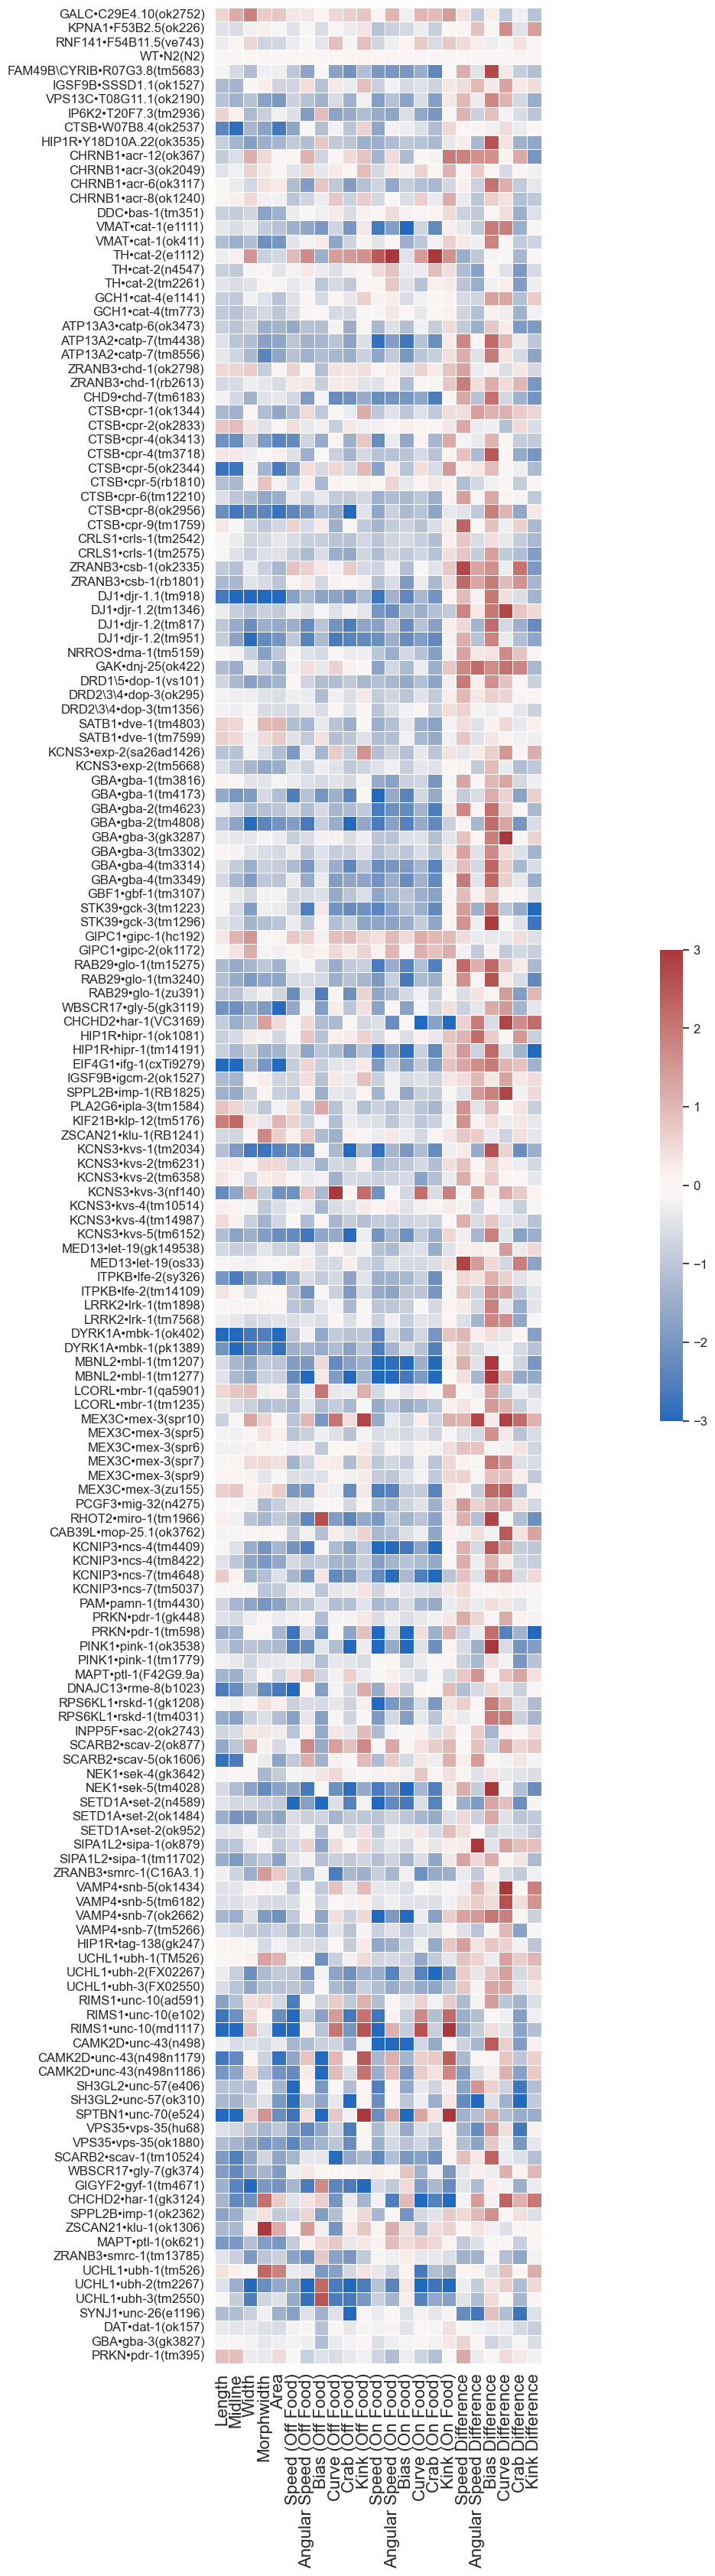

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 12) 
ax = sns.heatmap(data = PD_Stats_combined_allele_standardize.reset_index(drop=False).drop(columns=['Category']).set_index("Strain"), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed Difference', 'Angular Speed Difference','Bias Difference',
                                'Curve Difference','Crab Difference','Kink Difference'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/BSRScreen_Allele_allphenotypes_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [400]:
PD_Stats_combined_allele_standardize_Transpose = PD_Stats_combined_allele_standardize.reset_index(drop=False).drop(columns=['Category']).set_index("Strain").transpose()

Strain                    GALC•C29E4.10(ok2752)  KPNA1•F53B2.5(ok226)  \
Length                                 0.574314             -0.476412   
Midline                                1.206801             -0.590038   
Width                                  1.858965             -0.244000   
Morphwidth                             0.691839              0.168005   
Area                                   0.786358             -0.153205   
speed_OffFood                          0.346384             -0.486923   
angularspeed_OffFood                   0.305682             -0.049798   
bias_OffFood                          -0.082631             -0.601061   
curve_OffFood                          0.545130              0.081490   
crab_OffFood                           0.658500             -0.311736   
kink_OffFood                           0.809655              0.363069   
speed_OnFood                           0.008037             -1.076917   
angularspeed_OnFood                    1.032142             -0.803856   
bias_OnFood                           -0.260694             -0.621144   
curve_OnFood                           1.013208             -0.308427   
crab_OnFood                            0.947977             -0.825777   
kink_OnFood                            1.413156             -0.006412   
Speed Difference                       0.383673             -0.009473   
Angular Speed Difference              -0.942403              0.911220   
Bias Difference                        0.223606              0.051720   
Curve Difference                      -0.961778              1.685315   
Crab Difference                       -0.242691             -0.480099   
Kink Difference                       -1.068444              1.399748   

Strain                    RNF141•F54B11.5(ve743)  WT•N2(N2)  \
Length                                 -0.322026        0.0   
Midline                                -0.044210        0.0   
Width                                   0.567256        0.0   
Morphwidth                             -0.734815        0.0   
Area                                   -0.683409        0.0   
speed_OffFood                          -0.327727        0.0   
angularspeed_OffFood                   -0.016970        0.0   
bias_OffFood                           -0.440968        0.0   
curve_OffFood                           0.898710        0.0   
crab_OffFood                           -0.117438        0.0   
kink_OffFood                            0.901573        0.0   
speed_OnFood                           -0.713472        0.0   
angularspeed_OnFood                    -0.272264        0.0   
bias_OnFood                             0.101178        0.0   
curve_OnFood                            0.735010        0.0   
crab_OnFood                            -0.595417        0.0   
kink_OnFood                             0.770284        0.0   
Speed Difference                        0.475552        0.0   
Angular Speed Difference                0.212574        0.0   
Bias Difference                        -0.286955        0.0   
Curve Difference                       -0.141569        0.0   
Crab Difference                         0.389867        0.0   
Kink Difference                        -0.089806        0.0   

Strain                    FAM49B\CYRIB•R07G3.8(tm5683)  \
Length                                       -0.158863   
Midline                                      -0.651151   
Width                                        -1.176230   
Morphwidth                                   -0.258623   
Area                                         -0.270629   
speed_OffFood                                -0.977341   
angularspeed_OffFood                         -1.674612   
bias_OffFood                                  0.010980   
curve_OffFood                                -1.755486   
crab_OffFood                                 -2.078933   
kink_OffFood                                 -1.170075   
speed_OnFood                          

In [410]:
pairwisecorr = pg.pairwise_corr(PD_Stats_combined_allele_standardize_Transpose, method='pearson')

In [439]:
pairwisecorr["Gene_X"] = pairwisecorr.X.str.split(pat="•", expand=True)[1].str.split(pat="(", expand=True)[0]
pairwisecorr["Gene_Y"] = pairwisecorr.Y.str.split(pat="•", expand=True)[1].str.split(pat="(", expand=True)[0]
pairwisecorr["HGene_X"] = pairwisecorr.X.str.split(pat="•", expand=True)[0]
pairwisecorr["HGene_Y"] = pairwisecorr.Y.str.split(pat="•", expand=True)[0]
pairwisecorr["Type"] = ""
pairwisecorr["HGene_Type"] = ""
pairwisecorr

X                             Y   method  \
0      GALC•C29E4.10(ok2752)          KPNA1•F53B2.5(ok226)  pearson   
1      GALC•C29E4.10(ok2752)        RNF141•F54B11.5(ve743)  pearson   
2      GALC•C29E4.10(ok2752)  FAM49B\CYRIB•R07G3.8(tm5683)  pearson   
3      GALC•C29E4.10(ok2752)        IGSF9B•SSSD1.1(ok1527)  pearson   
4      GALC•C29E4.10(ok2752)       VPS13C•T08G11.1(ok2190)  pearson   
...                      ...                           ...      ...   
13525    SYNJ1•unc-26(e1196)             GBA•gba-3(gk3827)  pearson   
13526    SYNJ1•unc-26(e1196)             PRKN•pdr-1(tm395)  pearson   
13527       DAT•dat-1(ok157)             GBA•gba-3(gk3827)  pearson   
13528       DAT•dat-1(ok157)             PRKN•pdr-1(tm395)  pearson   
13529      GBA•gba-3(gk3827)             PRKN•pdr-1(tm395)  pearson   

      alternative   n         r           CI95%     p-unc    BF10     power  \
0       two-sided  23 -0.544360  [-0.78, -0.17]  0.007242   7.703  0.793670   
1       two-sided  23  0.200705   [-0.23, 0.57]  0.358481   0.385  0.152163   
2       two-sided  23 -0.150239   [-0.53, 0.28]  0.493824   0.322  0.105385   
3       two-sided  23 -0.365606   [-0.68, 0.05]  0.086239   1.035  0.415344   
4       two-sided  23 -0.148056   [-0.53, 0.28]  0.500193    0.32  0.103708   
...           ...  ..       ...             ...       ...     ...       ...   
13525   two-sided  23 -0.228891    [-0.59, 0.2]  0.293472   0.435  0.185215   
13526   two-sided  23 -0.405869    [-0.7, 0.01]  0.054659   1.473  0.500684   
13527   two-sided  23  0.590043    [0.23, 0.81]  0.003040  16.098  0.869766   
13528   two-sided  23 -0.217676   [-0.58, 0.21]  0.318400   0.414  0.171455   
13529   two-sided  23  0.400833    [-0.01, 0.7]  0.058028   1.406  0.489754   

         Gene_X    Gene_Y Type HGene_X       HGene_Y HGene_Type  
0      C29E4.10   F53B2.5         GALC         KPNA1             
1      C29E4.10  F54B11.5         GALC        RNF141             
2      C29E4.10   R07G3.8         GALC  FAM49B\CYRIB             
3      C29E4.10   SSSD1.1         GALC        IGSF9B             
4      C29E4.10  T08G11.1         GALC        VPS13C             
...         ...       ...  ...     ...           ...        ...  
13525    unc-26     gba-3        SYNJ1           GBA             
13526    unc-26     pdr-1        SYNJ1          PRKN             
13527     dat-1     gba-3          DAT           GBA             
13528     dat-1     pdr-1          DAT          PRKN             
13529     gba-3     pdr-1          GBA          PRKN             

[13530 rows x 16 columns]

In [440]:
for index,row in pairwisecorr.iterrows():
    if row['Gene_X'] == row['Gene_Y']:
        pairwisecorr.loc[index, 'Type'] = "Same Gene"
    elif row['Gene_X'] != row['Gene_Y']:
        pairwisecorr.loc[index, 'Type'] = "Other"
    else:
        pass

for index,row in pairwisecorr.iterrows():
    if row['HGene_X'] == row['HGene_Y']:
        pairwisecorr.loc[index, 'HGene_Type'] = "Same Human Gene"
    elif row['HGene_X'] != row['HGene_Y']:
        pairwisecorr.loc[index, 'HGene_Type'] = "Other"
    else:
        pass


pairwisecorr

X                             Y   method  \
0      GALC•C29E4.10(ok2752)          KPNA1•F53B2.5(ok226)  pearson   
1      GALC•C29E4.10(ok2752)        RNF141•F54B11.5(ve743)  pearson   
2      GALC•C29E4.10(ok2752)  FAM49B\CYRIB•R07G3.8(tm5683)  pearson   
3      GALC•C29E4.10(ok2752)        IGSF9B•SSSD1.1(ok1527)  pearson   
4      GALC•C29E4.10(ok2752)       VPS13C•T08G11.1(ok2190)  pearson   
...                      ...                           ...      ...   
13525    SYNJ1•unc-26(e1196)             GBA•gba-3(gk3827)  pearson   
13526    SYNJ1•unc-26(e1196)             PRKN•pdr-1(tm395)  pearson   
13527       DAT•dat-1(ok157)             GBA•gba-3(gk3827)  pearson   
13528       DAT•dat-1(ok157)             PRKN•pdr-1(tm395)  pearson   
13529      GBA•gba-3(gk3827)             PRKN•pdr-1(tm395)  pearson   

      alternative   n         r           CI95%     p-unc    BF10     power  \
0       two-sided  23 -0.544360  [-0.78, -0.17]  0.007242   7.703  0.793670   
1       two-sided  23  0.200705   [-0.23, 0.57]  0.358481   0.385  0.152163   
2       two-sided  23 -0.150239   [-0.53, 0.28]  0.493824   0.322  0.105385   
3       two-sided  23 -0.365606   [-0.68, 0.05]  0.086239   1.035  0.415344   
4       two-sided  23 -0.148056   [-0.53, 0.28]  0.500193    0.32  0.103708   
...           ...  ..       ...             ...       ...     ...       ...   
13525   two-sided  23 -0.228891    [-0.59, 0.2]  0.293472   0.435  0.185215   
13526   two-sided  23 -0.405869    [-0.7, 0.01]  0.054659   1.473  0.500684   
13527   two-sided  23  0.590043    [0.23, 0.81]  0.003040  16.098  0.869766   
13528   two-sided  23 -0.217676   [-0.58, 0.21]  0.318400   0.414  0.171455   
13529   two-sided  23  0.400833    [-0.01, 0.7]  0.058028   1.406  0.489754   

         Gene_X    Gene_Y   Type HGene_X       HGene_Y HGene_Type  
0      C29E4.10   F53B2.5  Other    GALC         KPNA1      Other  
1      C29E4.10  F54B11.5  Other    GALC        RNF141      Other  
2      C29E4.10   R07G3.8  Other    GALC  FAM49B\CYRIB      Other  
3      C29E4.10   SSSD1.1  Other    GALC        IGSF9B      Other  
4      C29E4.10  T08G11.1  Other    GALC        VPS13C      Other  
...         ...       ...    ...     ...           ...        ...  
13525    unc-26     gba-3  Other   SYNJ1           GBA      Other  
13526    unc-26     pdr-1  Other   SYNJ1          PRKN      Other  
13527     dat-1     gba-3  Other     DAT           GBA      Other  
13528     dat-1     pdr-1  Other     DAT          PRKN      Other  
13529     gba-3     pdr-1  Other     GBA          PRKN      Other  

[13530 rows x 16 columns]

In [441]:
pairwisecorr.to_csv('/Users/Joseph/Desktop/BSRScreen_Allele_PairwiseCorrelation.csv')

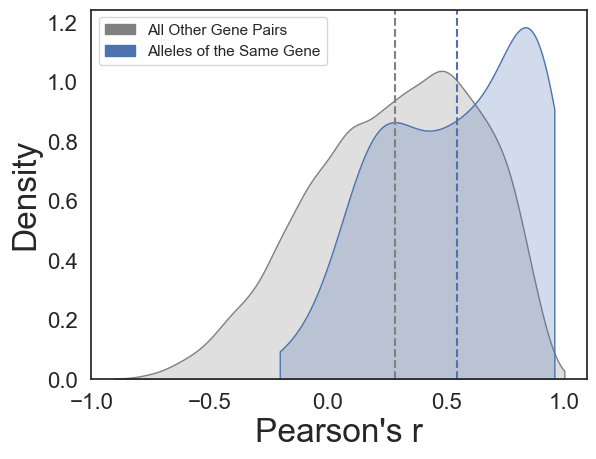

In [474]:
import matplotlib.patches as mpatches
sns.set_context('notebook')
# plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
fig, ax = plt.subplots()


sns.kdeplot(pairwisecorr[pairwisecorr.Type=="Other"]["r"], color= "grey",fill=True, cut=0, clip = (-1,1))
sns.kdeplot(pairwisecorr[pairwisecorr.Type=="Same Gene"]["r"],color = sns.color_palette()[0],fill=True, cut=0, clip = (-1,1))
plt.axvline(x=pairwisecorr[pairwisecorr.Type=="Other"]["r"].mean(), ls = "--", c="grey")
plt.axvline(x=pairwisecorr[pairwisecorr.Type=="Same Gene"]["r"].mean(), c = sns.color_palette()[0], ls="--")

first_patch = mpatches.Patch(color="grey", label='All Other Gene Pairs')
second_patch = mpatches.Patch(color=sns.color_palette()[0], label='Alleles of the Same Gene')
ax.legend(handles=[first_patch, second_patch])

ax.set_ylabel('Density', fontsize = 24)
ax.set_xlabel("Pearson's r", fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/Density_Gene_Allele_Pairs.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()



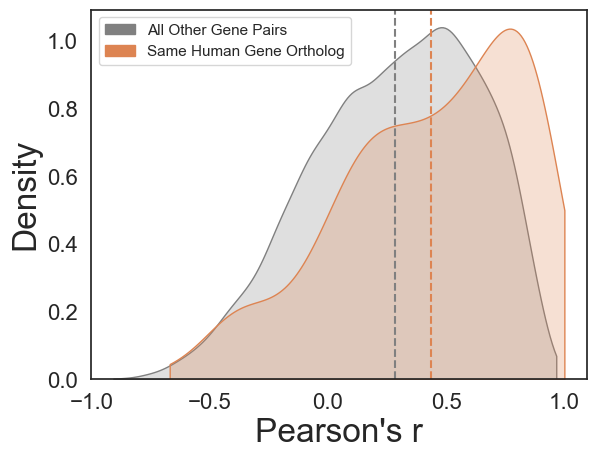

In [475]:
sns.set_context('notebook')
# plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
fig, ax = plt.subplots()


sns.kdeplot(pairwisecorr[pairwisecorr.HGene_Type=="Other"]["r"], fill=True, color = "grey", cut=0, clip = (-1,1))
sns.kdeplot(pairwisecorr[pairwisecorr.HGene_Type=="Same Human Gene"]["r"], fill=True, color = sns.color_palette()[1], cut=0, clip = (-1,1))
plt.axvline(x=pairwisecorr[pairwisecorr.HGene_Type=="Other"]["r"].mean(), ls = "--", c="grey")
plt.axvline(x=pairwisecorr[pairwisecorr.HGene_Type=="Same Human Gene"]["r"].mean(), c = sns.color_palette()[1], ls="--")


first_patch = mpatches.Patch(color="grey", label='All Other Gene Pairs')
second_patch = mpatches.Patch(color=sns.color_palette()[1], label='Same Human Gene Ortholog')
ax.legend(handles=[first_patch, second_patch], loc = 'upper left')

ax.set_ylabel('Density', fontsize = 24)
ax.set_xlabel("Pearson's r", fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/Density_Gene_Worm_Human_Genes.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [15]:
PD_gene_baseline_Tstats = PD_BSR_Screen_Tstats.dropna().sort_index()

PD_gene_baseline_Tstats_standardize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
print(PD_gene_baseline_Tstats_standardize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_standardize - PD_gene_baseline_Tstats_standardize[PD_gene_baseline_Tstats_standardize.index == 'N2'].squeeze()
PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_normalize.drop(index = 'N2').reset_index(drop=False)
print(PD_gene_baseline_Tstats_normalize)

            length   midline     width  morphwidth      area  speed_OffFood  \
Gene                                                                          
C29E4.10  1.299995  2.026517  2.312154    1.375168  1.732342       1.322533   
F53B2.5   0.352607  0.401498  0.472268    0.898328  0.854729       0.481822   
F54B11.5  0.491809  0.895132  1.182037    0.076500  0.359484       0.642433   
N2        0.782164  0.935114  0.685744    0.745394  0.997833       0.973072   
R07G3.8   0.638925  0.346229 -0.343341    0.509972  0.745048      -0.012952   
...            ...       ...       ...         ...       ...            ...   
unc-26   -0.300533 -0.143389 -0.029866    0.517190 -0.336702      -0.807650   
unc-43   -2.044105 -1.515030  0.937251   -0.333348 -1.930407      -1.385072   
unc-57   -0.665704 -0.582335 -0.388579    0.315747 -1.211672      -2.182836   
unc-70   -4.228960 -2.033852  1.274396    2.156843 -1.036670      -1.802786   
vps-35   -0.332685 -0.394500 -0.939837   -1.313180 -

In [227]:
PD_gene_baseline_Tstats_normalize.to_csv('/Users/Joseph/Desktop/BSRScreen_Tstat_normalized.csv')

In [18]:
BSR_Tstat_orthology=pd.merge(PD_gene_baseline_Tstats_normalize,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

BSR_Tstat_orthology=BSR_Tstat_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(BSR_Tstat_orthology)
print("-"*50)
print(BSR_Tstat_orthology[BSR_Tstat_orthology['Gene'].isna()])

    Worm Gene    length   midline     width  morphwidth      area  \
0    C29E4.10  0.517831  1.091403  1.626410    0.629774  0.734510   
1     F53B2.5 -0.429558 -0.533616 -0.213476    0.152934 -0.143104   
2    F54B11.5 -0.290355 -0.039982  0.496293   -0.668895 -0.638349   
3     R07G3.8 -0.143239 -0.588886 -1.029085   -0.235422 -0.252785   
4     SSSD1.1 -1.113001 -1.221517  0.030610    0.190169 -0.679577   
..        ...       ...       ...       ...         ...       ...   
100    unc-26 -1.082697 -1.078503 -0.715610   -0.228204 -1.334535   
101    unc-43 -2.826269 -2.450144  0.251507   -1.078742 -2.928240   
102    unc-57 -1.447869 -1.517450 -1.074323   -0.429648 -2.209505   
103    unc-70 -5.011124 -2.968966  0.588652    1.411449 -2.034503   
104    vps-35 -1.114849 -1.329614 -1.625581   -2.058574 -1.834672   

     speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
0         0.349462              0.286067     -0.076228       0.479489   
1        -0.491249       

In [229]:
BSR_Tstat_orthology.drop_duplicates().to_csv('/Users/Joseph/Desktop/BSRScreen_Tstats_Orthology.csv')

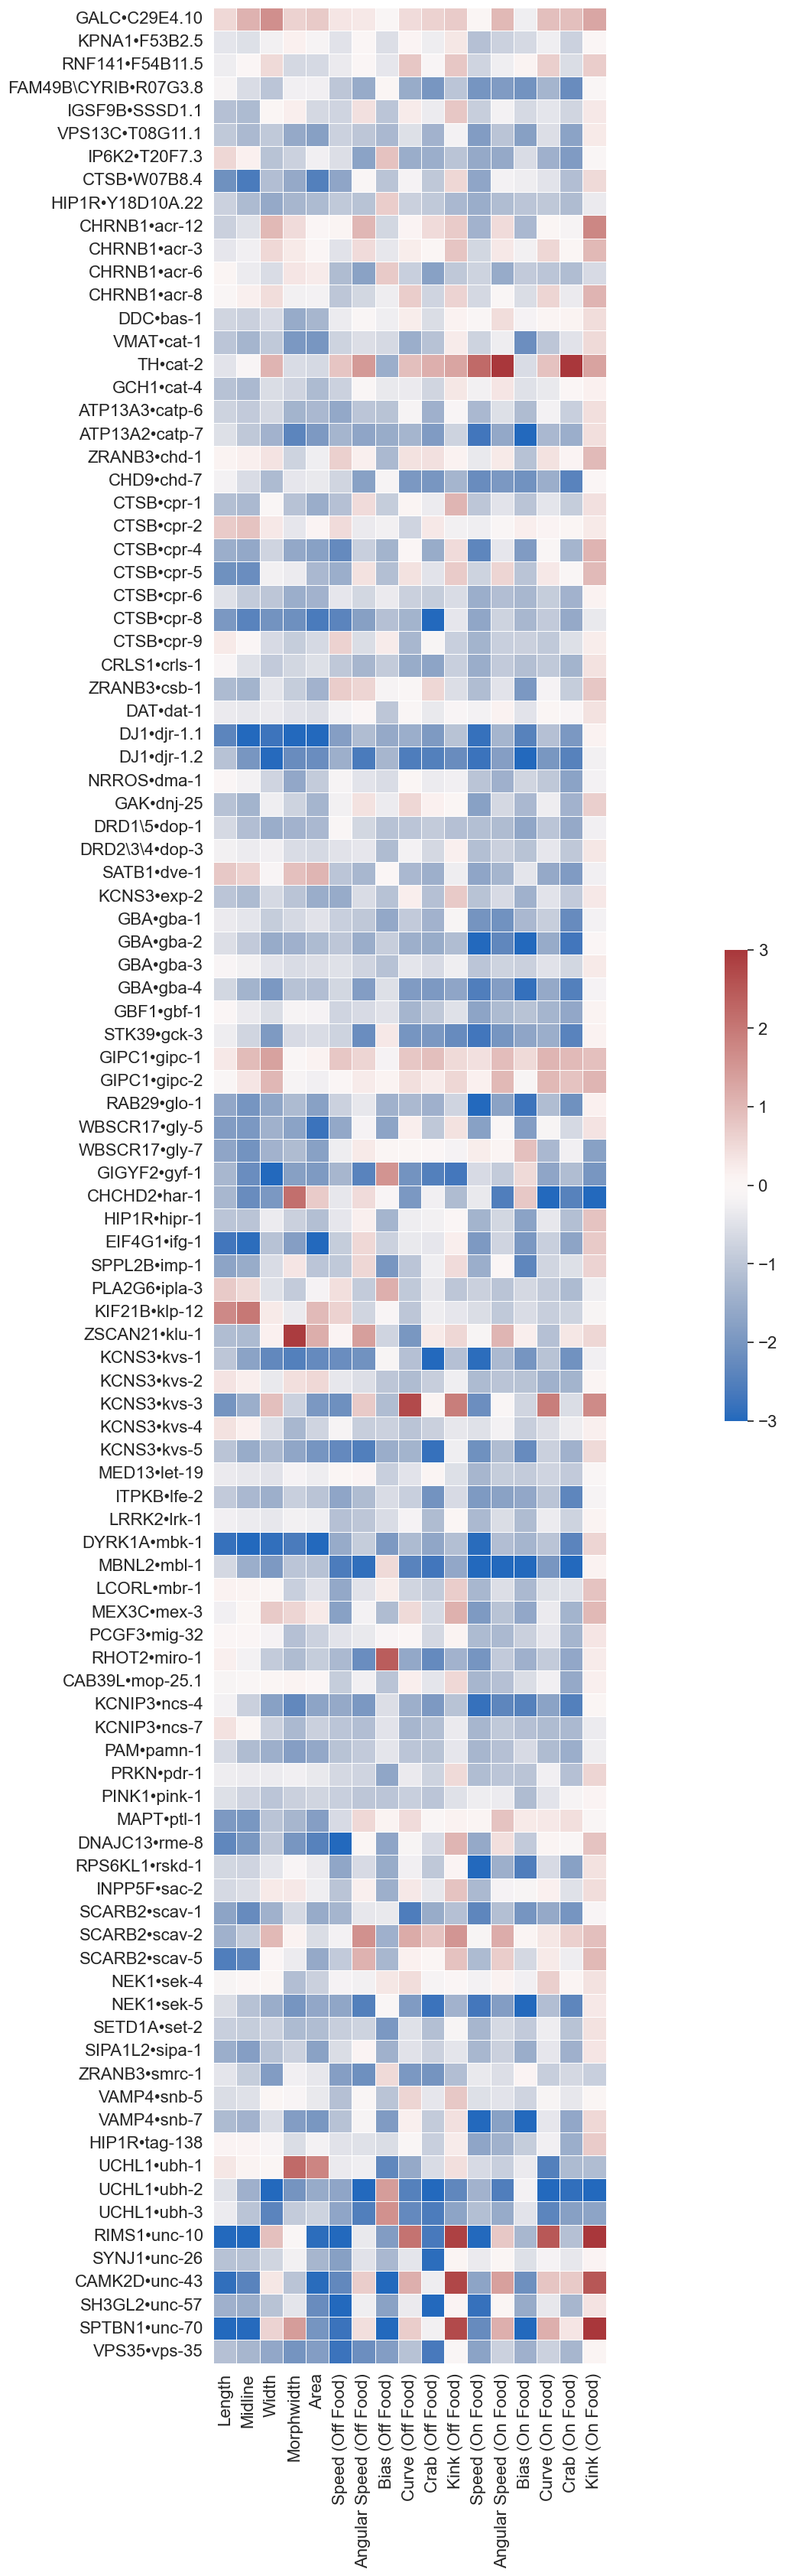

In [231]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = BSR_Tstat_orthology.set_index('Gene').drop(columns=['Worm Gene','Human Gene','Category']).drop_duplicates(), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

## Tstat_Correlations

In [20]:
BSR_Tstat_orthology_corr = BSR_Tstat_orthology.replace('TH•cat-2','DOPAMINE')
BSR_Tstat_orthology_corr.Category.unique()

array(['GWAS', 'PARK', 'DOPAMINE'], dtype=object)

In [21]:
BSR_Tstat_orthology_corr_dopamine = BSR_Tstat_orthology_corr[BSR_Tstat_orthology_corr.Category == 'DOPAMINE']
BSR_Tstat_orthology_corr_PDScreen = BSR_Tstat_orthology_corr[BSR_Tstat_orthology_corr.Category != 'DOPAMINE']

In [22]:
BSR_Tstat_orthology_corr_dopamine

Worm Gene    length   midline     width  morphwidth      area  \
13     bas-1 -0.726152 -0.797325 -0.624098   -1.569730 -1.318608   
14     cat-1 -1.018840 -1.355275 -0.955194   -1.964585 -2.005559   
15     cat-2 -0.450333 -0.094713  1.073453   -0.591712 -0.651634   
30     dat-1 -0.331869 -0.388785 -0.339273   -0.470703 -0.554339   
35     dop-1 -0.634264 -1.152676 -1.523535   -1.394793 -1.278979   
36     dop-3 -0.232893 -0.327204 -0.250151   -0.596534 -0.652923   

    speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
13      -0.312084             -0.062338     -0.258150       0.211836   
14      -0.761028             -0.555246     -0.633897      -1.503919   
15       0.805868              1.465122     -1.479797       0.894894   
30      -0.195841             -0.033610     -1.001300      -0.078542   
35      -0.078678             -0.691102     -1.085385      -1.022556   
36      -0.476069             -0.403692     -1.205504      -0.203464   

    crab_OffFood  kink_OffFood  speed_OnFood  angularspeed_OnFood  \
13     -0.575119      0.133276     -0.078487             0.458146   
14     -1.080276      0.244132     -0.761452            -0.283032   
15      1.135011      1.299599      2.220378             3.153131   
30     -0.360042     -0.115526     -0.197102             0.129291   
35     -0.892879     -1.121207     -1.147365            -1.208385   
36     -0.667372      0.187867     -1.129625            -0.804729   

    bias_OnFood  curve_OnFood  crab_OnFood  kink_OnFood            Gene  \
13    -0.181469      0.068315     0.096156     0.457298       DDC•bas-1   
14    -2.170687     -0.987167    -0.490965     0.505990      VMAT•cat-1   
15    -0.601885      0.865251     3.129650     1.336570        DOPAMINE   
30    -0.453190      0.040792    -0.115123     0.378005       DAT•dat-1   
35    -1.650862     -1.016569    -1.584618    -0.239919    DRD1\5•dop-1   
36    -1.070925     -0.403154    -0.984747     0.319883  DRD2\3\4•dop-3   

   Human Gene  Category  
13        DDC  DOPAMINE  
14       VMAT  DOPAMINE  
15         TH  DOPAMINE  
30        DAT  DOPAMINE  
35     DRD1\5  DOPAMINE  
36   DRD2\3\4  DOPAMINE

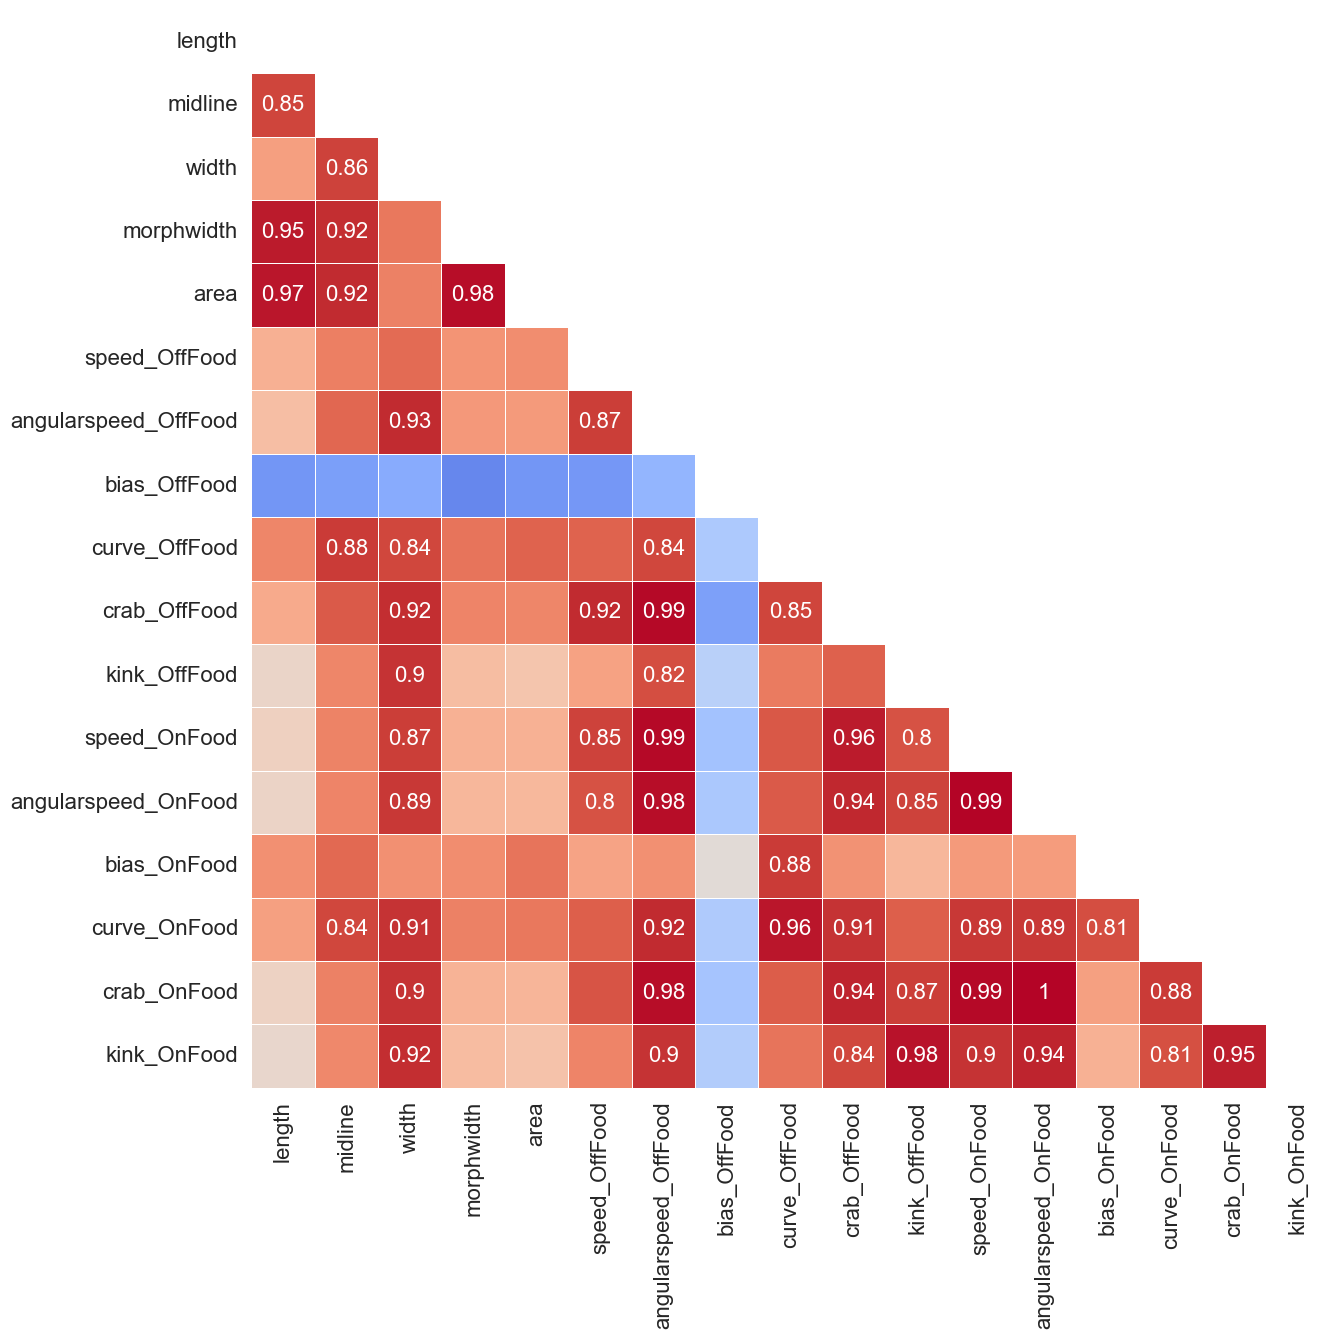

In [26]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
dopamine_corr = BSR_Tstat_orthology_corr_dopamine.drop(columns=['Worm Gene','Gene','Human Gene','Category']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dopamine_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = dopamine_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_N2Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

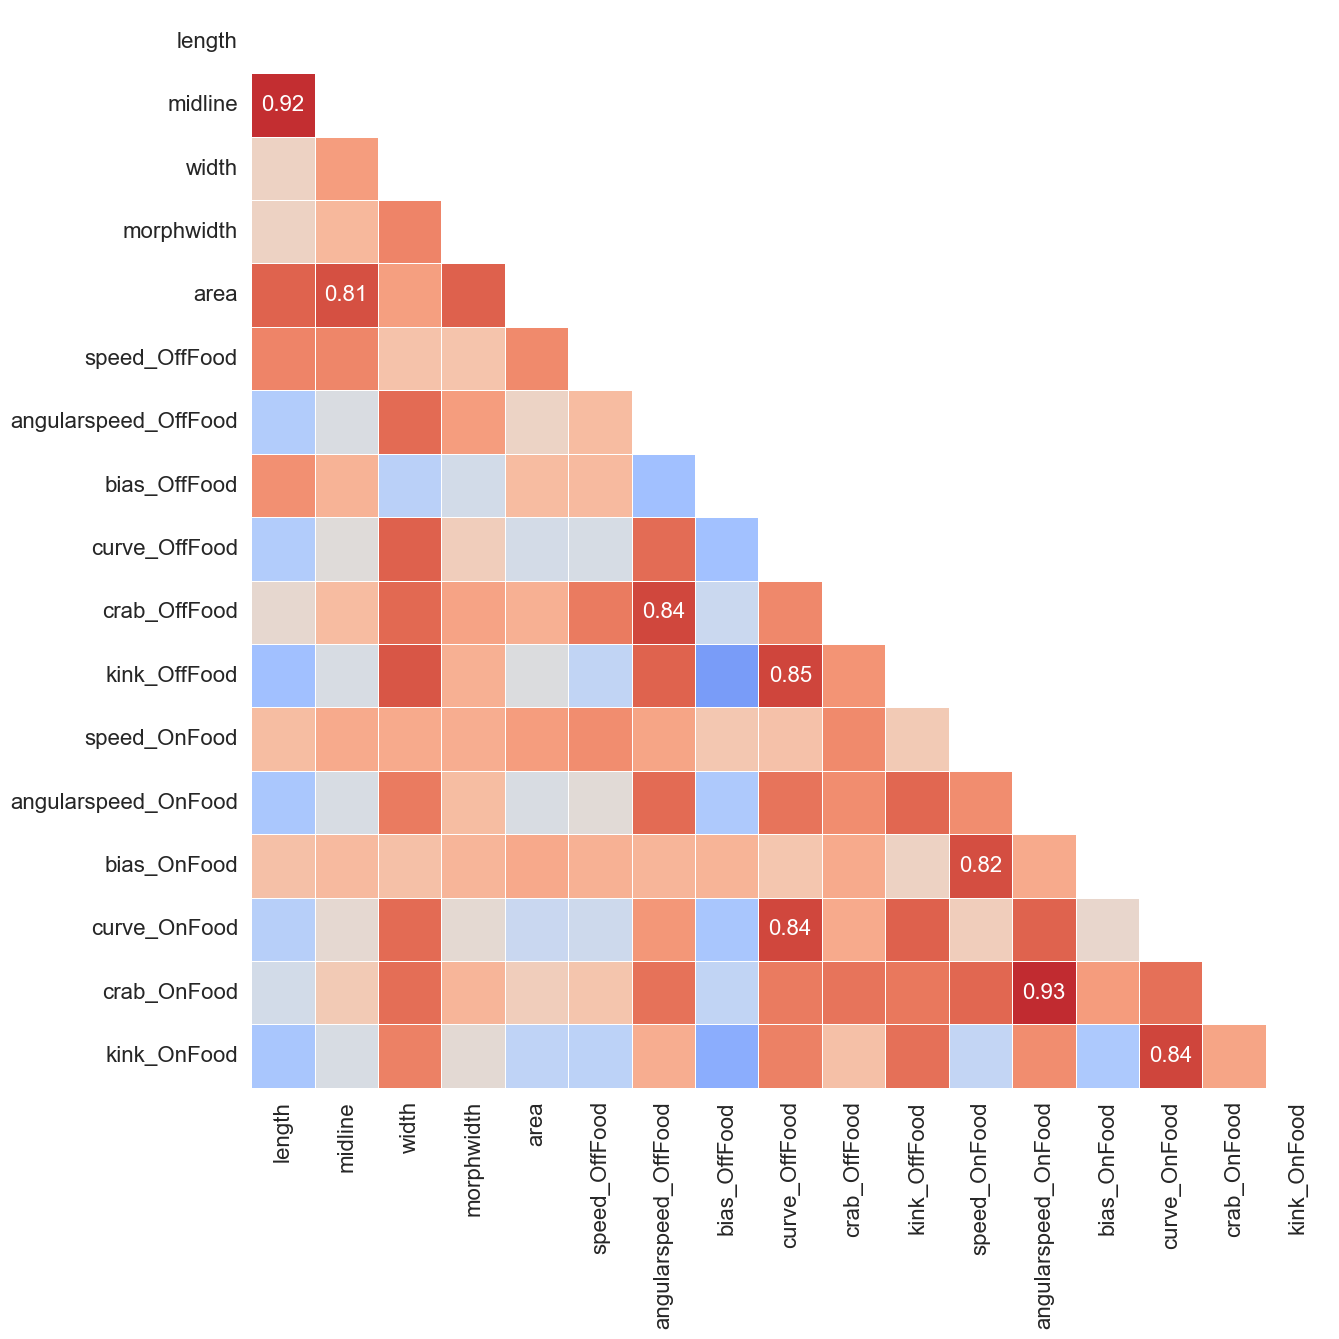

In [25]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_corr = BSR_Tstat_orthology_corr_PDScreen.drop(columns=['Worm Gene','Gene','Human Gene','Category']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = PD_corr, 
                 annot = True, 
                 annot_kws={"size": 16},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_Correlation_Phenotypes_N2Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

## Include Difference Scores

In [31]:
# Diff_orthology = Diff_orthology.drop(columns=['level_0','index']).rename(columns={'speed':'Speed Difference',
#                                                                                   'angular speed': "Angular Speed Difference",
#                                                                                   "bias": "Bias Difference",
#                                                                                   "curve": "Curve Difference",
#                                                                                   "kink": "Kink Difference"})
Diff_orthology = Diff_orthology.rename(columns={'speed':'Speed Difference',
                                                'angularspeed': "Angular Speed Difference",
                                                "bias": "Bias Difference",
                                                "curve": "Curve Difference",
                                                "kink": "Kink Difference",
                                                "crab": "Crab Difference"})
Diff_orthology

Worm Gene  Speed Difference  Angular Speed Difference  Bias Difference  \
0    C29E4.10          0.084863                  5.068528        -0.115822   
1     F53B2.5          0.070215                 10.580215        -0.154711   
2    F54B11.5          0.088286                  8.502814        -0.231334   
3          N2          0.070568                  7.870733        -0.166412   
4     R07G3.8          0.113898                  6.439586         0.446815   
..        ...               ...                       ...              ...   
101    scav-1          0.104215                  8.835486         0.362437   
102     gly-7          0.055555                  8.449504        -0.234272   
103     gyf-1          0.054443                  4.288787        -0.121016   
104    unc-26         -0.011763                 -0.116752         0.032720   
105     dat-1          0.066021                  7.189445        -0.238190   

     Curve Difference  Crab Difference  Kink Difference                  Gene  \
0            1.063743         0.010529         1.442701         GALC•C29E4.10   
1            6.811138         0.009557        15.253227         KPNA1•F53B2.5   
2            2.844587         0.013119         6.918575       RNF141•F54B11.5   
3            3.151964         0.011523         7.421077                 WT•N2   
4            3.804670         0.007915         1.050020  FAM49B\CYRIB•R07G3.8   
..                ...              ...              ...                   ...   
101          2.419115         0.009411         1.024296         SCARB2•scav-1   
102          5.574486         0.012185        13.065193         WBSCR17•gly-7   
103          2.743629         0.005517         5.707154          GIGYF2•gyf-1   
104          0.648262         0.000205         4.579971          SYNJ1•unc-26   
105          2.444008         0.008866         2.627146             DAT•dat-1   

       Human Gene      Category  
0            GALC          GWAS  
1           KPNA1          GWAS  
2          RNF141          GWAS  
3              WT  CONTROL (WT)  
4    FAM49B\CYRIB          GWAS  
..            ...           ...  
101        SCARB2          GWAS  
102       WBSCR17          GWAS  
103        GIGYF2          PARK  
104         SYNJ1          PARK  
105           DAT      DOPAMINE  

[106 rows x 10 columns]

In [32]:
PD_Gene_Tstats = PD_gene_baseline_Tstats.reset_index().rename(columns={"Gene":"Worm Gene"})
PD_Gene_Tstats

Worm Gene      length    midline      width  morphwidth       area  \
0    C29E4.10   10.555847  23.477823  24.548200   10.680814  16.467094   
1     F53B2.5   -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
2    F54B11.5   -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
3          N2    0.000000   0.000000   0.000000    0.000000   0.000000   
4     R07G3.8   -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
..        ...         ...        ...        ...         ...        ...   
99     unc-26  -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
100    unc-43  -57.612787 -52.706528   3.796113  -18.295215 -65.648702   
101    unc-57  -29.514434 -32.642771 -16.215277   -7.286722 -49.535259   
102    unc-70 -102.150500 -63.867221   8.884807   23.937835 -45.611864   
103    vps-35  -22.725923 -28.602123 -24.535680  -34.912934 -41.131828   

     speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
0         6.251101              3.748791     -0.325239       7.054071   
1        -8.787363             -0.610707     -2.365808       1.054490   
2        -5.914388             -0.208119     -1.735671      11.629459   
3         0.000000              0.000000      0.000000       0.000000   
4       -17.637788            -20.536931      0.043216     -22.716279   
..             ...                   ...           ...            ...   
99      -31.853173             -6.160476     -5.492690      -6.295850   
100     -42.181970              7.869623    -19.203291      13.362658   
101     -56.452219             -3.383781     -7.416564      -5.151813   
102     -49.653960              5.703806    -18.120305      10.083800   
103     -49.805268            -28.291200     -7.859240     -15.988128   

     crab_OffFood  kink_OffFood  speed_OnFood  angularspeed_OnFood  \
0       10.262671      7.857893      0.149091            13.211643   
1       -4.858388      3.523665    -19.977027           -10.289529   
2       -1.830262      8.749970    -13.235049            -3.485038   
3        0.000000      0.000000      0.000000             0.000000   
4      -32.400024    -11.355850    -36.341403           -25.004895   
..            ...           ...           ...                  ...   
99     -47.540278      0.712556     -6.186203             0.397330   
100     -5.735482     28.172022    -29.893279            17.223626   
101    -50.890415      1.034864    -50.613106             0.130776   
102     -3.720341     29.981898    -40.221690            15.172360   
103    -42.996593     -0.947957    -31.194923           -10.298181   

     bias_OnFood  curve_OnFood  crab_OnFood  kink_OnFood  
0      -2.709585     12.743041    13.152807    14.049076  
1      -6.456006     -3.879062   -11.457333    -0.063747  
2       1.051614      9.244161    -8.261178     7.657883  
3       0.000000      0.000000     0.000000     0.000000  
4     -20.589170    -19.035981   -32.421292    -0.589873  
..           ...           ...          ...          ...  
99     -5.213822     -2.483055    -5.608303     0.912247  
100   -21.748828     10.000549     9.866941    26.948868  
101   -15.414303     -5.416014   -19.517984     4.115636  
102   -38.306643     16.026144     5.064151    38.535883  
103   -14.248147    -10.892300   -19.570219     0.724587  

[104 rows x 18 columns]

In [33]:
PD_Gene_Tstats = PD_gene_baseline_Tstats.reset_index().rename(columns={"Gene":"Worm Gene"})
PD_Gene_Tstats = PD_Gene_Tstats.rename(columns = {"length":"Length",
                                                  "midline": "Midline",
                                                  "width": "Width",
                                                  "morphwidth": "Morphwidth",
                                                  "area": "Area",
                                                  "speed_OffFood": "Speed Off-Food",
                                                  "angularspeed_OffFood": "Angular Speed Off-Food",
                                                  "bias_OffFood":"Bias Off-Food",
                                                  "curve_OffFood":"Curve Off-Food",
                                                  "crab_OffFood":"Crab Off-Food",
                                                  "kink_OffFood":"Kink Off-Food",
                                                  "speed_OnFood":"Speed On-Food",
                                                  "angularspeed_OnFood": "Angular Speed On-Food",
                                                  "bias_OnFood":"Bias On-Food",
                                                  "curve_OnFood":"Curve On-Food",
                                                  "crab_OnFood":"Crab On-Food",
                                                  "kink_OnFood":"Kink On-Food"})
PD_Gene_Tstats

Worm Gene      Length    Midline      Width  Morphwidth       Area  \
0    C29E4.10   10.555847  23.477823  24.548200   10.680814  16.467094   
1     F53B2.5   -8.756424 -11.478940  -3.222091    2.593717  -3.208266   
2    F54B11.5   -5.918814  -0.860078   7.490784  -11.344294 -14.311248   
3          N2    0.000000   0.000000   0.000000    0.000000   0.000000   
4     R07G3.8   -2.919887 -12.667871 -15.532484   -3.992705  -5.667228   
..        ...         ...        ...        ...         ...        ...   
99     unc-26  -22.070511 -23.200330 -10.801054   -3.870284 -29.919166   
100    unc-43  -57.612787 -52.706528   3.796113  -18.295215 -65.648702   
101    unc-57  -29.514434 -32.642771 -16.215277   -7.286722 -49.535259   
102    unc-70 -102.150500 -63.867221   8.884807   23.937835 -45.611864   
103    vps-35  -22.725923 -28.602123 -24.535680  -34.912934 -41.131828   

     Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  \
0          6.251101                3.748791      -0.325239        7.054071   
1         -8.787363               -0.610707      -2.365808        1.054490   
2         -5.914388               -0.208119      -1.735671       11.629459   
3          0.000000                0.000000       0.000000        0.000000   
4        -17.637788              -20.536931       0.043216      -22.716279   
..              ...                     ...            ...             ...   
99       -31.853173               -6.160476      -5.492690       -6.295850   
100      -42.181970                7.869623     -19.203291       13.362658   
101      -56.452219               -3.383781      -7.416564       -5.151813   
102      -49.653960                5.703806     -18.120305       10.083800   
103      -49.805268              -28.291200      -7.859240      -15.988128   

     Crab Off-Food  Kink Off-Food  Speed On-Food  Angular Speed On-Food  \
0        10.262671       7.857893       0.149091              13.211643   
1        -4.858388       3.523665     -19.977027             -10.289529   
2        -1.830262       8.749970     -13.235049              -3.485038   
3         0.000000       0.000000       0.000000               0.000000   
4       -32.400024     -11.355850     -36.341403             -25.004895   
..             ...            ...            ...                    ...   
99      -47.540278       0.712556      -6.186203               0.397330   
100      -5.735482      28.172022     -29.893279              17.223626   
101     -50.890415       1.034864     -50.613106               0.130776   
102      -3.720341      29.981898     -40.221690              15.172360   
103     -42.996593      -0.947957     -31.194923             -10.298181   

     Bias On-Food  Curve On-Food  Crab On-Food  Kink On-Food  
0       -2.709585      12.743041     13.152807     14.049076  
1       -6.456006      -3.879062    -11.457333     -0.063747  
2        1.051614       9.244161     -8.261178      7.657883  
3        0.000000       0.000000      0.000000      0.000000  
4      -20.589170     -19.035981    -32.421292     -0.589873  
..            ...            ...           ...           ...  
99      -5.213822      -2.483055     -5.608303      0.912247  
100    -21.748828      10.000549      9.866941     26.948868  
101    -15.414303      -5.416014    -19.517984      4.115636  
102    -38.306643      16.026144      5.064151     38.535883  
103    -14.248147     -10.892300    -19.570219      0.724587  

[104 rows x 18 columns]

In [34]:
PD_Stats_combined = Diff_orthology.merge(PD_Gene_Tstats, on = 'Worm Gene', how='left')
PD_Stats_combined = PD_Stats_combined.drop_duplicates()
PD_Stats_combined

Worm Gene  Speed Difference  Angular Speed Difference  Bias Difference  \
0    C29E4.10          0.084863                  5.068528        -0.115822   
1     F53B2.5          0.070215                 10.580215        -0.154711   
2    F54B11.5          0.088286                  8.502814        -0.231334   
3          N2          0.070568                  7.870733        -0.166412   
4     R07G3.8          0.113898                  6.439586         0.446815   
..        ...               ...                       ...              ...   
101    scav-1          0.104215                  8.835486         0.362437   
102     gly-7          0.055555                  8.449504        -0.234272   
103     gyf-1          0.054443                  4.288787        -0.121016   
104    unc-26         -0.011763                 -0.116752         0.032720   
105     dat-1          0.066021                  7.189445        -0.238190   

     Curve Difference  Crab Difference  Kink Difference                  Gene  \
0            1.063743         0.010529         1.442701         GALC•C29E4.10   
1            6.811138         0.009557        15.253227         KPNA1•F53B2.5   
2            2.844587         0.013119         6.918575       RNF141•F54B11.5   
3            3.151964         0.011523         7.421077                 WT•N2   
4            3.804670         0.007915         1.050020  FAM49B\CYRIB•R07G3.8   
..                ...              ...              ...                   ...   
101          2.419115         0.009411         1.024296         SCARB2•scav-1   
102          5.574486         0.012185        13.065193         WBSCR17•gly-7   
103          2.743629         0.005517         5.707154          GIGYF2•gyf-1   
104          0.648262         0.000205         4.579971          SYNJ1•unc-26   
105          2.444008         0.008866         2.627146             DAT•dat-1   

       Human Gene      Category     Length    Midline      Width  Morphwidth  \
0            GALC          GWAS  10.555847  23.477823  24.548200   10.680814   
1           KPNA1          GWAS  -8.756424 -11.478940  -3.222091    2.593717   
2          RNF141          GWAS  -5.918814  -0.860078   7.490784  -11.344294   
3              WT  CONTROL (WT)   0.000000   0.000000   0.000000    0.000000   
4    FAM49B\CYRIB          GWAS  -2.919887 -12.667871 -15.532484   -3.992705   
..            ...           ...        ...        ...        ...         ...   
101        SCARB2          GWAS -34.493317 -48.332828 -21.570790  -10.910100   
102       WBSCR17          GWAS -34.041225 -44.806693 -21.106319  -20.505009   
103        GIGYF2          PARK -26.544260 -47.188147 -50.884442  -30.355594   
104         SYNJ1          PARK -22.070511 -23.200330 -10.801054   -3.870284   
105           DAT      DOPAMINE  -6.765069  -8.363395  -5.120806   -7.983016   

          Area  Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  \
0    16.467094        6.251101                3.748791      -0.325239   
1    -3.208266       -8.787363               -0.610707      -2.365808   
2   -14.311248       -5.914388               -0.208119      -1.735671   
3     0.000000        0.000000                0.000000       0.000000   
4    -5.667228      -17.637788              -20.536931       0.043216   
..         ...             ...                     ...            ...   
101 -34.872640      -24.113130               -5.140659      -1.583484   
102 -39.562565       -5.309867                3.471866       0.186566   
103 -43.078538      -23.708236              -31.833580       6.674209   
104 -29.919166      -31.853173               -6.160476      -5.492690   
105 -12.427819       -3.503168               -0.440442      -4.272225   

     Curve Off-Food  Crab Off-Food  Kink Off-Food  Speed On-Food  \
0          7.054071      10.262671       7.857893       0.149091   
1          1.054490      -4.858388       3.523665     -19.977027   
2         11.629459      -1.830262       8.749970   

In [331]:
PD_Stats_combined.to_csv('/Users/Joseph/Desktop/BSRstats_combined_test.csv')

In [35]:
PD_Stats_combined_reset = PD_Stats_combined.set_index(['Gene', 'Category','Worm Gene','Human Gene'])
PD_Stats_combined_standardize = (PD_Stats_combined_reset - PD_Stats_combined_reset.mean())/PD_Stats_combined_reset.std()
# print(PD_Stats_combined_standardize)
PD_Stats_combined_standardize = PD_Stats_combined_standardize.reset_index(drop=False)
PD_Stats_Orthology = PD_Stats_combined_standardize[['Gene','Worm Gene','Human Gene','Category']]
# print(PD_Stats_Orthology)

PD_Stats_combined_standardize = PD_Stats_combined_standardize.drop(columns=['Gene','Human Gene','Category']).set_index("Worm Gene")
# PD_Stats_combined_standardize
PD_Stats_combined_normalize = PD_Stats_combined_standardize - PD_Stats_combined_standardize[PD_Stats_combined_standardize.index == 'N2'].squeeze()
PD_Stats_combined_normalize = PD_Stats_combined_normalize.reset_index(drop=False)


PD_Stats_combined_normalize = PD_Stats_Orthology.merge(PD_Stats_combined_normalize, on="Worm Gene",how="left")
PD_Stats_combined_normalize
# print(PD_Stats_combined_normalize)

Gene Worm Gene    Human Gene      Category  \
0           GALC•C29E4.10  C29E4.10          GALC          GWAS   
1           KPNA1•F53B2.5   F53B2.5         KPNA1          GWAS   
2         RNF141•F54B11.5  F54B11.5        RNF141          GWAS   
3                   WT•N2        N2            WT  CONTROL (WT)   
4    FAM49B\CYRIB•R07G3.8   R07G3.8  FAM49B\CYRIB          GWAS   
..                    ...       ...           ...           ...   
99          SCARB2•scav-1    scav-1        SCARB2          GWAS   
100         WBSCR17•gly-7     gly-7       WBSCR17          GWAS   
101          GIGYF2•gyf-1     gyf-1        GIGYF2          PARK   
102          SYNJ1•unc-26    unc-26         SYNJ1          PARK   
103             DAT•dat-1     dat-1           DAT      DOPAMINE   

     Speed Difference  Angular Speed Difference  Bias Difference  \
0            0.397975                 -1.028424         0.239683   
1           -0.009826                  0.994395         0.055438   
2            0.493278                  0.231977        -0.307585   
3            0.000000                  0.000000         0.000000   
4            1.206324                 -0.525239         2.905321   
..                ...                       ...              ...   
99           0.936744                  0.354070         2.505562   
100         -0.417949                  0.212412        -0.321504   
101         -0.448923                 -1.314594         0.215073   
102         -2.292131                 -2.931450         0.943441   
103         -0.126589                 -0.250036        -0.340068   

     Curve Difference  Crab Difference  Kink Difference    Length   Midline  \
0           -1.150206        -0.261015        -1.222680  0.517831  1.091403   
1            2.015496        -0.516349         1.601808 -0.429558 -0.533616   
2           -0.169305         0.419304        -0.102770 -0.290355 -0.039982   
3            0.000000         0.000000         0.000000  0.000000  0.000000   
4            0.359514        -0.947707        -1.302990 -0.143239 -0.588886   
..                ...              ...              ...       ...       ...   
99          -0.403658        -0.554771        -1.308251 -1.692114 -2.246826   
100          1.334340         0.173909         1.154318 -1.669936 -2.082908   
101         -0.224913        -1.577558        -0.350526 -1.302163 -2.193614   
102         -1.379055        -2.972878        -0.581055 -1.082697 -1.078503   
103         -0.389947        -0.697923        -0.980441 -0.331869 -0.388785   

        Width  Morphwidth      Area  Speed Off-Food  Angular Speed Off-Food  \
0    1.626410    0.629774  0.734510        0.349462                0.286067   
1   -0.213476    0.152934 -0.143104       -0.491249               -0.046602   
2    0.496293   -0.668895 -0.638349       -0.330638               -0.015881   
3    0.000000    0.000000  0.000000        0.000000                0.000000   
4   -1.029085   -0.235422 -0.252785       -0.986024               -1.567153   
..        ...         ...       ...             ...                     ...   
99  -1.429146   -0.643293 -1.555483       -1.348022               -0.392279   
100 -1.398373   -1.209039 -1.764676       -0.296843                0.264935   
101 -3.371285   -1.789860 -1.921505       -1.325387               -2.429190   
102 -0.715610   -0.228204 -1.334535       -1.780722               -0.470100   
103 -0.339273   -0.470703 -0.554339       -0.195841               -0.033610   

     Bias Off-Food  Curve Off-Food  Crab Off-Food  Kink Off-Food  \
0        -0.076228        0.479489       0.631385       0.715583   
1        -0.554485        0.071677      -0.298900       0.320884   
2        -0.406797        0.790494      -0.112602       0.796821   
3         0.000000        0.000000       0.000000       0.000000   
4         0.010129       -1.544102      -1.993329      -1.034126   
..             ...             ...            ...            ...   
99       -0.371128       

In [36]:
cols = PD_Stats_combined_normalize.columns.to_list()
cols_new = cols[0:4] + cols[10:15] + cols[15:] + cols[4:10]
PD_Stats_combined_normalize=PD_Stats_combined_normalize[cols_new]
PD_Stats_combined_normalize

Gene Worm Gene    Human Gene      Category    Length  \
0           GALC•C29E4.10  C29E4.10          GALC          GWAS  0.517831   
1           KPNA1•F53B2.5   F53B2.5         KPNA1          GWAS -0.429558   
2         RNF141•F54B11.5  F54B11.5        RNF141          GWAS -0.290355   
3                   WT•N2        N2            WT  CONTROL (WT)  0.000000   
4    FAM49B\CYRIB•R07G3.8   R07G3.8  FAM49B\CYRIB          GWAS -0.143239   
..                    ...       ...           ...           ...       ...   
99          SCARB2•scav-1    scav-1        SCARB2          GWAS -1.692114   
100         WBSCR17•gly-7     gly-7       WBSCR17          GWAS -1.669936   
101          GIGYF2•gyf-1     gyf-1        GIGYF2          PARK -1.302163   
102          SYNJ1•unc-26    unc-26         SYNJ1          PARK -1.082697   
103             DAT•dat-1     dat-1           DAT      DOPAMINE -0.331869   

      Midline     Width  Morphwidth      Area  Speed Off-Food  \
0    1.091403  1.626410    0.629774  0.734510        0.349462   
1   -0.533616 -0.213476    0.152934 -0.143104       -0.491249   
2   -0.039982  0.496293   -0.668895 -0.638349       -0.330638   
3    0.000000  0.000000    0.000000  0.000000        0.000000   
4   -0.588886 -1.029085   -0.235422 -0.252785       -0.986024   
..        ...       ...         ...       ...             ...   
99  -2.246826 -1.429146   -0.643293 -1.555483       -1.348022   
100 -2.082908 -1.398373   -1.209039 -1.764676       -0.296843   
101 -2.193614 -3.371285   -1.789860 -1.921505       -1.325387   
102 -1.078503 -0.715610   -0.228204 -1.334535       -1.780722   
103 -0.388785 -0.339273   -0.470703 -0.554339       -0.195841   

     Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  Crab Off-Food  \
0                  0.286067      -0.076228        0.479489       0.631385   
1                 -0.046602      -0.554485        0.071677      -0.298900   
2                 -0.015881      -0.406797        0.790494      -0.112602   
3                  0.000000       0.000000        0.000000       0.000000   
4                 -1.567153       0.010129       -1.544102      -1.993329   
..                      ...            ...             ...            ...   
99                -0.392279      -0.371128       -2.580495      -1.528704   
100                0.264935       0.043726        0.006052      -0.019074   
101               -2.429190       1.564263       -2.080976      -2.485975   
102               -0.470100      -1.287345       -0.427950      -2.924795   
103               -0.033610      -1.001300       -0.078542      -0.360042   

     Kink Off-Food  Speed On-Food  Angular Speed On-Food  Bias On-Food  \
0         0.715583       0.008288               1.001102     -0.271929   
1         0.320884      -1.110508              -0.779681     -0.647912   
2         0.796821      -0.735726              -0.264076      0.105538   
3         0.000000       0.000000               0.000000      0.000000   
4        -1.034126      -2.020191              -1.894726     -2.066289   
..             ...            ...                    ...           ...   
99       -1.120457      -2.363851              -1.133539     -2.030137   
100      -0.169709       0.233564               0.066407      0.879652   
101      -2.693466      -0.631834              -0.893225      0.498634   
102       0.064889      -0.343886               0.030107     -0.523249   
103      -0.115526      -0.197102               0.129291     -0.453190   

     Curve On-Food  Crab On-Food  Kink On-Food  Speed Difference  \
0         0.907889      0.898328      1.275942          0.397975   
1        -0.276367     -0.782528     -0.005790         -0.009826   
2         0.658608     -0.564233      0.695492          0.493278   
3         0.000000      0.000000      0.000000          0.000000   
4        -1.356235     -2.214352     -0.053572          1.206324   
..             ...           ...           ...               ...   
99       -1.588722     -2

In [37]:
PD_Stats_combined_normalize

Gene Worm Gene    Human Gene      Category    Length  \
0           GALC•C29E4.10  C29E4.10          GALC          GWAS  0.517831   
1           KPNA1•F53B2.5   F53B2.5         KPNA1          GWAS -0.429558   
2         RNF141•F54B11.5  F54B11.5        RNF141          GWAS -0.290355   
3                   WT•N2        N2            WT  CONTROL (WT)  0.000000   
4    FAM49B\CYRIB•R07G3.8   R07G3.8  FAM49B\CYRIB          GWAS -0.143239   
..                    ...       ...           ...           ...       ...   
99          SCARB2•scav-1    scav-1        SCARB2          GWAS -1.692114   
100         WBSCR17•gly-7     gly-7       WBSCR17          GWAS -1.669936   
101          GIGYF2•gyf-1     gyf-1        GIGYF2          PARK -1.302163   
102          SYNJ1•unc-26    unc-26         SYNJ1          PARK -1.082697   
103             DAT•dat-1     dat-1           DAT      DOPAMINE -0.331869   

      Midline     Width  Morphwidth      Area  Speed Off-Food  \
0    1.091403  1.626410    0.629774  0.734510        0.349462   
1   -0.533616 -0.213476    0.152934 -0.143104       -0.491249   
2   -0.039982  0.496293   -0.668895 -0.638349       -0.330638   
3    0.000000  0.000000    0.000000  0.000000        0.000000   
4   -0.588886 -1.029085   -0.235422 -0.252785       -0.986024   
..        ...       ...         ...       ...             ...   
99  -2.246826 -1.429146   -0.643293 -1.555483       -1.348022   
100 -2.082908 -1.398373   -1.209039 -1.764676       -0.296843   
101 -2.193614 -3.371285   -1.789860 -1.921505       -1.325387   
102 -1.078503 -0.715610   -0.228204 -1.334535       -1.780722   
103 -0.388785 -0.339273   -0.470703 -0.554339       -0.195841   

     Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  Crab Off-Food  \
0                  0.286067      -0.076228        0.479489       0.631385   
1                 -0.046602      -0.554485        0.071677      -0.298900   
2                 -0.015881      -0.406797        0.790494      -0.112602   
3                  0.000000       0.000000        0.000000       0.000000   
4                 -1.567153       0.010129       -1.544102      -1.993329   
..                      ...            ...             ...            ...   
99                -0.392279      -0.371128       -2.580495      -1.528704   
100                0.264935       0.043726        0.006052      -0.019074   
101               -2.429190       1.564263       -2.080976      -2.485975   
102               -0.470100      -1.287345       -0.427950      -2.924795   
103               -0.033610      -1.001300       -0.078542      -0.360042   

     Kink Off-Food  Speed On-Food  Angular Speed On-Food  Bias On-Food  \
0         0.715583       0.008288               1.001102     -0.271929   
1         0.320884      -1.110508              -0.779681     -0.647912   
2         0.796821      -0.735726              -0.264076      0.105538   
3         0.000000       0.000000               0.000000      0.000000   
4        -1.034126      -2.020191              -1.894726     -2.066289   
..             ...            ...                    ...           ...   
99       -1.120457      -2.363851              -1.133539     -2.030137   
100      -0.169709       0.233564               0.066407      0.879652   
101      -2.693466      -0.631834              -0.893225      0.498634   
102       0.064889      -0.343886               0.030107     -0.523249   
103      -0.115526      -0.197102               0.129291     -0.453190   

     Curve On-Food  Crab On-Food  Kink On-Food  Speed Difference  \
0         0.907889      0.898328      1.275942          0.397975   
1        -0.276367     -0.782528     -0.005790         -0.009826   
2         0.658608     -0.564233      0.695492          0.493278   
3         0.000000      0.000000      0.000000          0.000000   
4        -1.356235     -2.214352     -0.053572          1.206324   
..             ...           ...           ...               ...   
99       -1.588722     -2

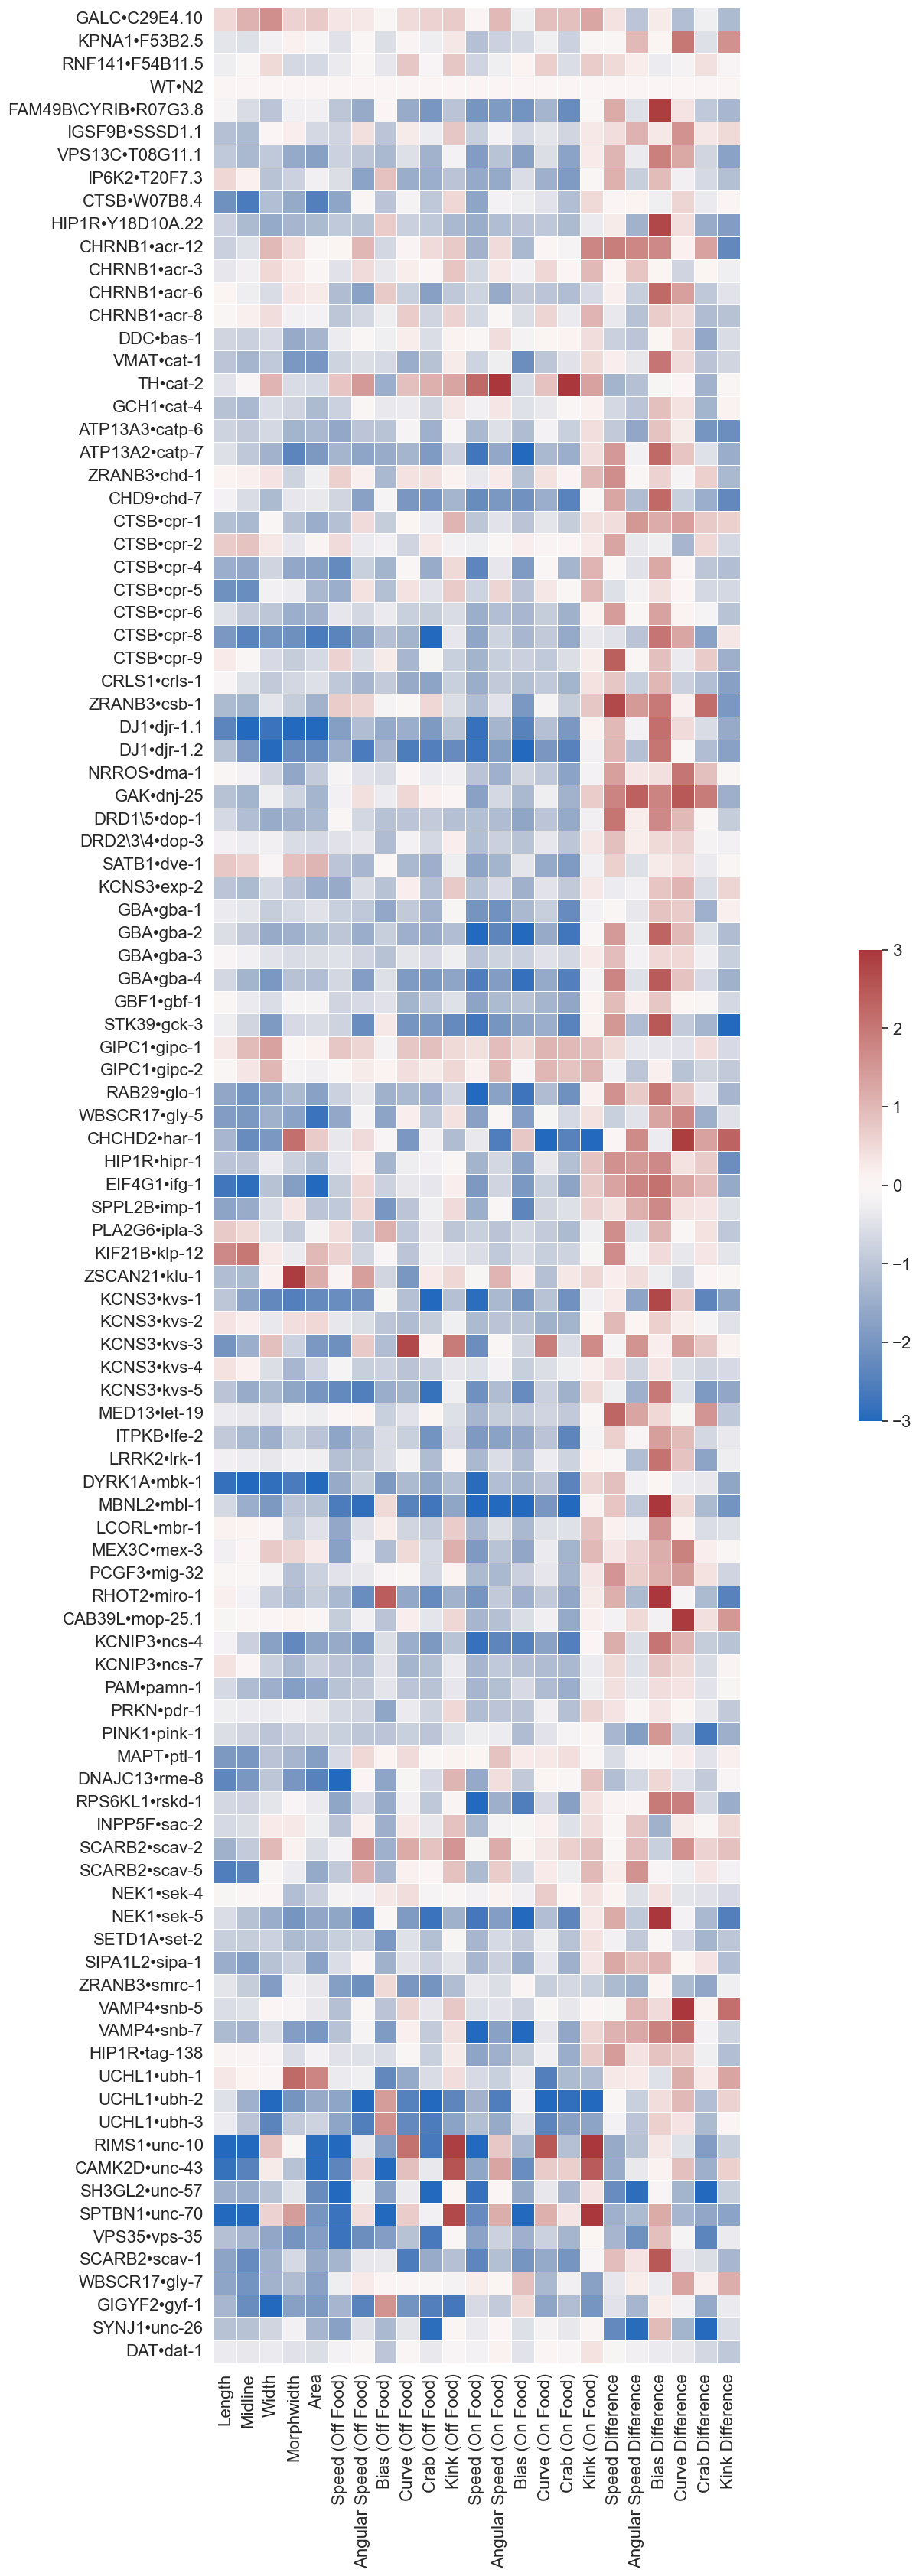

In [155]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = PD_Stats_combined_normalize.set_index('Gene').drop(columns=['Worm Gene','Human Gene','Category']).drop_duplicates(), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed Difference', 'Angular Speed Difference','Bias Difference',
                                'Curve Difference','Crab Difference','Kink Difference'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_allphenotypes_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [38]:
PD_Stats_combined_normalize_precorr = PD_Stats_combined_normalize.drop(columns=['Gene',"Worm Gene","Human Gene"])
Dopamine_Stats_combined_normalize = PD_Stats_combined_normalize_precorr[PD_Stats_combined_normalize_precorr.Category == 'DOPAMINE'].drop(columns='Category')
Dopamine_Stats_combined_normalize

Length   Midline     Width  Morphwidth      Area  Speed Off-Food  \
14  -0.726152 -0.797325 -0.624098   -1.569730 -1.318608       -0.312084   
15  -1.018840 -1.355275 -0.955194   -1.964585 -2.005559       -0.761028   
35  -0.634264 -1.152676 -1.523535   -1.394793 -1.278979       -0.078678   
36  -0.232893 -0.327204 -0.250151   -0.596534 -0.652923       -0.476069   
103 -0.331869 -0.388785 -0.339273   -0.470703 -0.554339       -0.195841   

     Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  Crab Off-Food  \
14                -0.062338      -0.258150        0.211836      -0.575119   
15                -0.555246      -0.633897       -1.503919      -1.080276   
35                -0.691102      -1.085385       -1.022556      -0.892879   
36                -0.403692      -1.205504       -0.203464      -0.667372   
103               -0.033610      -1.001300       -0.078542      -0.360042   

     Kink Off-Food  Speed On-Food  Angular Speed On-Food  Bias On-Food  \
14        0.133276      -0.078487               0.458146     -0.181469   
15        0.244132      -0.761452              -0.283032     -2.170687   
35       -1.121207      -1.147365              -1.208385     -1.650862   
36        0.187867      -1.129625              -0.804729     -1.070925   
103      -0.115526      -0.197102               0.129291     -0.453190   

     Curve On-Food  Crab On-Food  Kink On-Food  Speed Difference  \
14        0.068315      0.096156      0.457298         -0.805096   
15       -0.987167     -0.490965      0.505990          0.200941   
35       -1.016569     -1.584618     -0.239919          2.048506   
36       -0.403154     -0.984747      0.319883          0.906228   
103       0.040792     -0.115123      0.378005         -0.126589   

     Angular Speed Difference  Bias Difference  Curve Difference  \
14                  -1.021232         0.062186          0.554651   
15                  -0.393532         2.036247          0.481031   
35                   0.217854         1.715150          0.999690   
36                   0.218522         0.499089          0.600738   
103                 -0.250036        -0.340068         -0.389947   

     Crab Difference  Kink Difference  
14         -1.599159        -0.602515  
15         -1.051824        -0.709783  
35         -0.069106        -0.889175  
36         -0.174045        -0.231465  
103        -0.697923        -0.980441

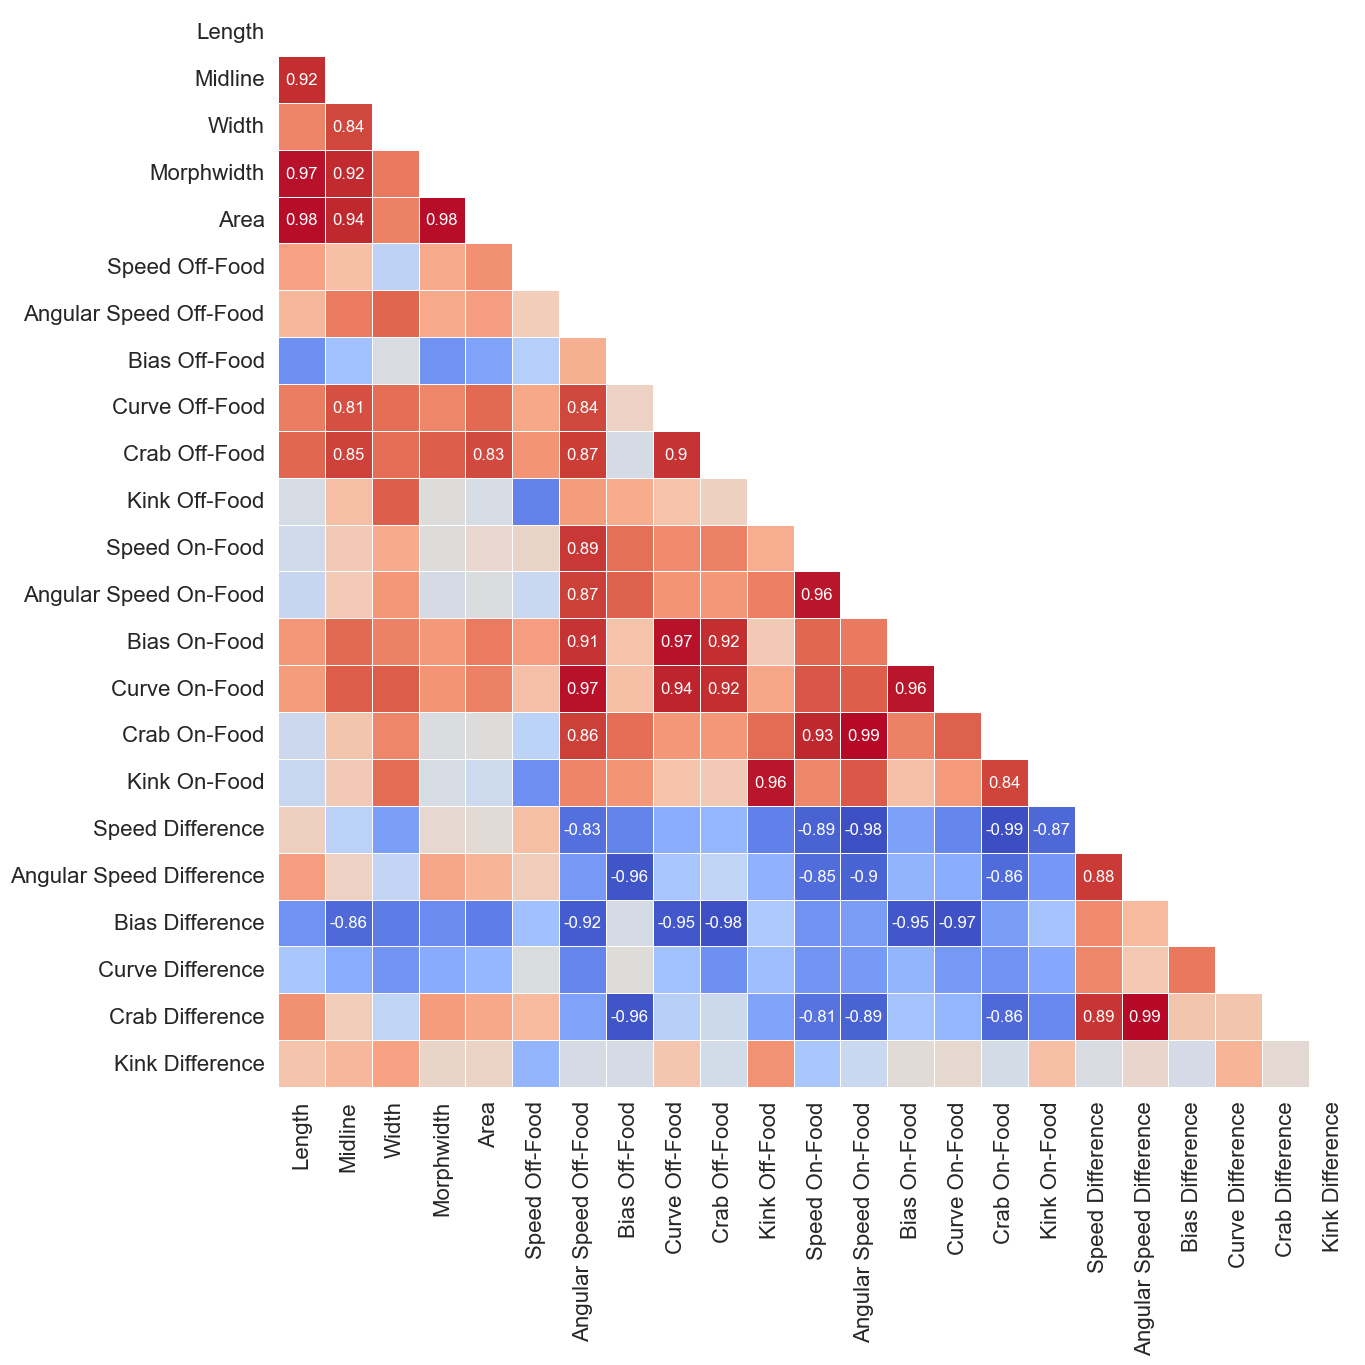

In [39]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
dopamine_corr = Dopamine_Stats_combined_normalize.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dopamine_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = dopamine_corr, 
                 annot = True, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_Correlation_Phenotypes_Dopamine_Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [40]:

PD_Screen_Stats_combined_normalize = PD_Stats_combined_normalize_precorr[PD_Stats_combined_normalize_precorr.Category != "DOPAMINE"]
PD_Screen_Stats_combined_normalize = PD_Screen_Stats_combined_normalize[PD_Screen_Stats_combined_normalize.Category != "CONTROL (WT)"].drop(columns = 'Category')
PD_Screen_Stats_combined_normalize

Length   Midline     Width  Morphwidth      Area  Speed Off-Food  \
0    0.517831  1.091403  1.626410    0.629774  0.734510        0.349462   
1   -0.429558 -0.533616 -0.213476    0.152934 -0.143104       -0.491249   
2   -0.290355 -0.039982  0.496293   -0.668895 -0.638349       -0.330638   
4   -0.143239 -0.588886 -1.029085   -0.235422 -0.252785       -0.986024   
5   -1.113001 -1.221517  0.030610    0.190169 -0.679577       -0.749463   
..        ...       ...       ...         ...       ...             ...   
98  -1.114849 -1.329614 -1.625581   -2.058574 -1.834672       -2.784317   
99  -1.692114 -2.246826 -1.429146   -0.643293 -1.555483       -1.348022   
100 -1.669936 -2.082908 -1.398373   -1.209039 -1.764676       -0.296843   
101 -1.302163 -2.193614 -3.371285   -1.789860 -1.921505       -1.325387   
102 -1.082697 -1.078503 -0.715610   -0.228204 -1.334535       -1.780722   

     Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  Crab Off-Food  \
0                  0.286067      -0.076228        0.479489       0.631385   
1                 -0.046602      -0.554485        0.071677      -0.298900   
2                 -0.015881      -0.406797        0.790494      -0.112602   
4                 -1.567153       0.010129       -1.544102      -1.993329   
5                  0.412167      -1.014704        0.257137      -0.320599   
..                      ...            ...             ...            ...   
98                -2.158874      -1.842004       -1.086767      -2.645256   
99                -0.392279      -0.371128       -2.580495      -1.528704   
100                0.264935       0.043726        0.006052      -0.019074   
101               -2.429190       1.564263       -2.080976      -2.485975   
102               -0.470100      -1.287345       -0.427950      -2.924795   

     Kink Off-Food  Speed On-Food  Angular Speed On-Food  Bias On-Food  \
0         0.715583       0.008288               1.001102     -0.271929   
1         0.320884      -1.110508              -0.779681     -0.647912   
2         0.796821      -0.735726              -0.264076      0.105538   
4        -1.034126      -2.020191              -1.894726     -2.066289   
5         0.779174      -0.848952              -0.198457     -0.638973   
..             ...            ...                    ...           ...   
98       -0.086326      -1.734102              -0.780337     -1.429917   
99       -1.120457      -2.363851              -1.133539     -2.030137   
100      -0.169709       0.233564               0.066407      0.879652   
101      -2.693466      -0.631834              -0.893225      0.498634   
102       0.064889      -0.343886               0.030107     -0.523249   

     Curve On-Food  Crab On-Food  Kink On-Food  Speed Difference  \
0         0.907889      0.898328      1.275942          0.397975   
1        -0.276367     -0.782528     -0.005790         -0.009826   
2         0.658608     -0.564233      0.695492          0.493278   
4        -1.356235     -2.214352     -0.053572          1.206324   
5        -0.441848     -0.720786      0.283916          0.462140   
..             ...           ...           ...               ...   
98       -0.776031     -1.336632      0.065807         -1.313966   
99       -1.588722     -2.023509     -0.108632          0.936744   
100      -1.271774     -0.239399     -1.763942         -0.417949   
101      -1.669216     -1.186566     -2.016308         -0.448923   
102      -0.176907     -0.383043      0.082851         -2.292131   

     Angular Speed Difference  Bias Difference  Curve Difference  \
0                   -1.028424         0.239683         -1.150206   
1                    0.994395         0.055438          2.015496   
2                    0.231977        -0.307585         -0.169305   
4                   -0.525239         2.905321          0.359514   
5                    1.081593         0.301920          1.578703   
..                        ...              ...               ...   

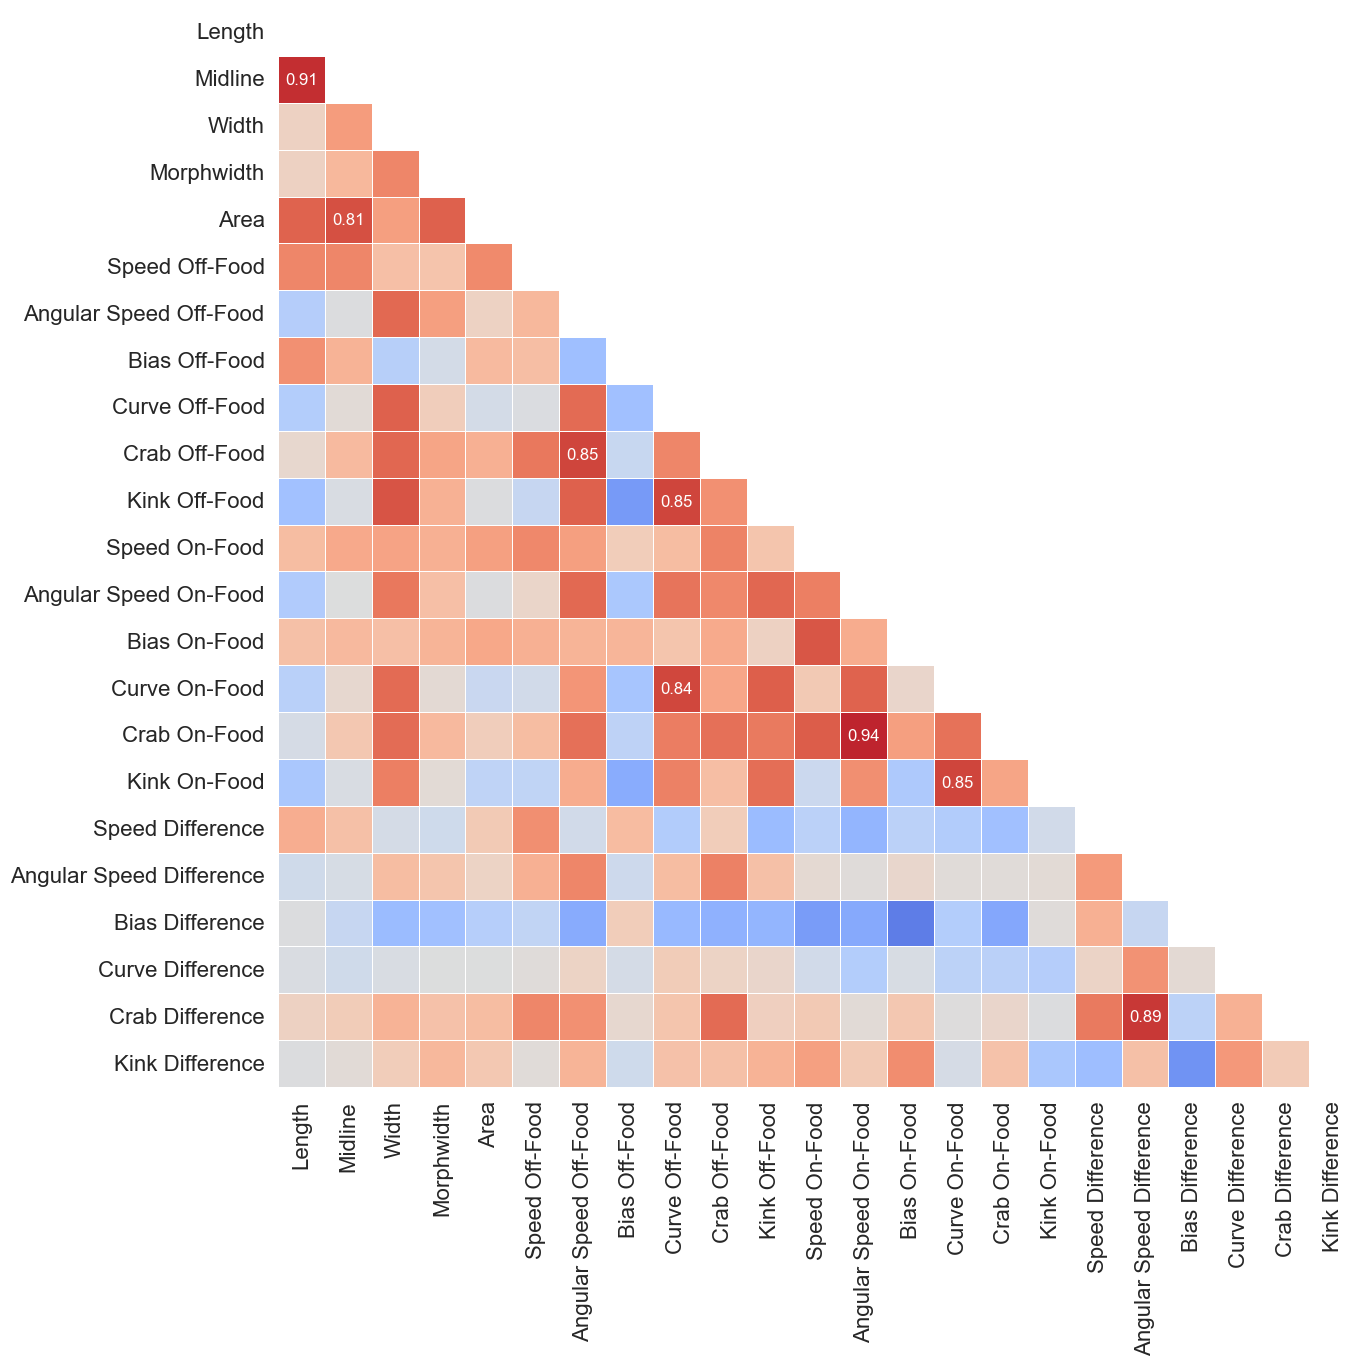

In [41]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_corr = PD_Screen_Stats_combined_normalize.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_corr, dtype=bool))

plt.figure(figsize = (14,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = PD_Screen_corr, 
                 annot = True, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                 mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

for t in ax.texts:
    if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_Correlation_Phenotypes_PDOnly.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Time for the CENGEN Dataset

In [42]:
CENGEN_Data=pd.read_csv('/Users/Joseph/Desktop/CENGENDataset.csv').drop(columns=['Unnamed: 0'])
# Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
CENGEN_Data = CENGEN_Data.rename(columns= {"gene_name": "Worm Gene"}).drop(columns = ['dataset','X','threshold'])
CENGEN_Data

Worm Gene         ADA         ADE        ADF        ADL        AFD  \
0      21ur-10093    1.077131    0.000000   0.000000   0.000000   0.000000   
1      21ur-10387    0.000000    0.000000   0.000000   0.000000   0.000000   
2      21ur-10538    0.000000    0.000000  56.540374   0.000000   0.000000   
3      21ur-10646    0.000000    0.000000   0.000000   0.000000   0.000000   
4      21ur-10775    0.000000    0.000000   0.000000   0.000000   3.018959   
...           ...         ...         ...        ...        ...        ...   
22454      zyg-12   22.636511   14.036524   7.483238   5.940878   6.939457   
22455       zyg-8    9.727171    0.000000  12.831127  12.475519   1.510597   
22456       zyg-9   12.437211   29.622802  15.761089   2.717583  21.368157   
22457       zyx-1  169.790632  349.008543  20.771766  14.112567  41.972886   
22458       zzz-1    3.075797   18.195642   9.584130   3.494706   0.000000   

              AIA        AIB         AIM        AIN         AIY        AIZ  \
0        0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
1        0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
2        0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
3        0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
4        0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   
...           ...        ...         ...        ...         ...        ...   
22454    0.000000   4.669383   45.925839  13.103785    1.043095   6.952232   
22455   40.401875   0.460858    4.961318  23.305972    6.070461  12.287119   
22456   26.492592   5.157702    4.373034   9.241626   11.541899  61.844748   
22457  108.969252  38.672330  141.656028  86.963010  100.460266  26.257088   
22458    9.559543   0.000000   93.037926   0.000000    0.000000   6.241810   

              ALA         ALM        ALN        AMsh        AMso  Anal_muscle  \
0        0.000000    0.000000    0.00000    0.000000    0.000000     0.000000   
1        0.000000    0.000000    0.00000    0.000000    0.000000     1.822224   
2        0.000000    0.000000    0.00000    0.000000    0.000000     0.000000   
3        0.000000    0.000000    0.00000    0.000000    0.000000     0.000000   
4        0.000000    0.000000    0.00000    0.000000    0.000000     0.000000   
...           ...         ...        ...         ...         ...          ...   
22454   18.301697    6.093925    0.00000    1.986902    2.160644     0.000000   
22455   10.233815   11.749295    0.00000    0.000000    2.546031     8.283535   
22456    8.118531   82.597907  117.86893   41.118421   12.976906    70.983415   
22457  132.553056  977.102470    0.00000  367.086440  169.211295   470.911879   
22458   69.765678    0.682640    0.00000    0.000000    0.000000     0.000000   

             AQR  Arcade_cell           AS       ASEL       ASER        ASG  \
0       0.000000     0.000000     0.000000   0.000000   0.000000   0.000000   
1       0.000000     0.000000     0.000000   0.000000   0.000000   0.000000   
2       0.000000     0.000000     0.000000   0.000000   0.000000   0.166548   
3       0.000000     0.000000     0.000000   0.000000   0.401461   0.000000   
4       0.000000     0.000000    17.989784   0.000000   0.000000   0.101987   
...          ...          ...          ...        ...        ...        ...   
22454   0.436201     1.121003    25.876336   0.000000   2.149529   5.150845   
22455   3.611334    18.909529     6.800215   6.354653  14.728875   8.137840   
22456  19.497172    71.961282    67.727663   2.520003  14.880647  16.879231   
22457  36.858304   156.943993  5240.460317  40.529497  37.750520  36.835736   
22458   0.000000     0.000000   673.007459   0.000000   0.317052   1.427928   

             ASH  ...          SMD  SMD_stressed      Sperm  Spermatheca  \
0       0.441341  ...     1.132305      1.918517   0.000000     0.000000   
1       0.000000  ...     0.000000      0.000000   0.000000 

In [43]:
PD_DataWithCenGEN = PD_Stats_combined_normalize.replace("SSSD1.1", "igcm-2").merge(CENGEN_Data, on = 'Worm Gene', how = 'left')
PD_DataWithCenGEN

Gene Worm Gene    Human Gene      Category    Length  \
0           GALC•C29E4.10  C29E4.10          GALC          GWAS  0.517831   
1           KPNA1•F53B2.5   F53B2.5         KPNA1          GWAS -0.429558   
2         RNF141•F54B11.5  F54B11.5        RNF141          GWAS -0.290355   
3                   WT•N2        N2            WT  CONTROL (WT)  0.000000   
4    FAM49B\CYRIB•R07G3.8   R07G3.8  FAM49B\CYRIB          GWAS -0.143239   
..                    ...       ...           ...           ...       ...   
99          SCARB2•scav-1    scav-1        SCARB2          GWAS -1.692114   
100         WBSCR17•gly-7     gly-7       WBSCR17          GWAS -1.669936   
101          GIGYF2•gyf-1     gyf-1        GIGYF2          PARK -1.302163   
102          SYNJ1•unc-26    unc-26         SYNJ1          PARK -1.082697   
103             DAT•dat-1     dat-1           DAT      DOPAMINE -0.331869   

      Midline     Width  Morphwidth      Area  Speed Off-Food  \
0    1.091403  1.626410    0.629774  0.734510        0.349462   
1   -0.533616 -0.213476    0.152934 -0.143104       -0.491249   
2   -0.039982  0.496293   -0.668895 -0.638349       -0.330638   
3    0.000000  0.000000    0.000000  0.000000        0.000000   
4   -0.588886 -1.029085   -0.235422 -0.252785       -0.986024   
..        ...       ...         ...       ...             ...   
99  -2.246826 -1.429146   -0.643293 -1.555483       -1.348022   
100 -2.082908 -1.398373   -1.209039 -1.764676       -0.296843   
101 -2.193614 -3.371285   -1.789860 -1.921505       -1.325387   
102 -1.078503 -0.715610   -0.228204 -1.334535       -1.780722   
103 -0.388785 -0.339273   -0.470703 -0.554339       -0.195841   

     Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  Crab Off-Food  \
0                  0.286067      -0.076228        0.479489       0.631385   
1                 -0.046602      -0.554485        0.071677      -0.298900   
2                 -0.015881      -0.406797        0.790494      -0.112602   
3                  0.000000       0.000000        0.000000       0.000000   
4                 -1.567153       0.010129       -1.544102      -1.993329   
..                      ...            ...             ...            ...   
99                -0.392279      -0.371128       -2.580495      -1.528704   
100                0.264935       0.043726        0.006052      -0.019074   
101               -2.429190       1.564263       -2.080976      -2.485975   
102               -0.470100      -1.287345       -0.427950      -2.924795   
103               -0.033610      -1.001300       -0.078542      -0.360042   

     Kink Off-Food  Speed On-Food  Angular Speed On-Food  Bias On-Food  \
0         0.715583       0.008288               1.001102     -0.271929   
1         0.320884      -1.110508              -0.779681     -0.647912   
2         0.796821      -0.735726              -0.264076      0.105538   
3         0.000000       0.000000               0.000000      0.000000   
4        -1.034126      -2.020191              -1.894726     -2.066289   
..             ...            ...                    ...           ...   
99       -1.120457      -2.363851              -1.133539     -2.030137   
100      -0.169709       0.233564               0.066407      0.879652   
101      -2.693466      -0.631834              -0.893225      0.498634   
102       0.064889      -0.343886               0.030107     -0.523249   
103      -0.115526      -0.197102               0.129291     -0.453190   

     Curve On-Food  Crab On-Food  Kink On-Food  Speed Difference  \
0         0.907889      0.898328      1.275942          0.397975   
1        -0.276367     -0.782528     -0.005790         -0.009826   
2         0.658608     -0.564233      0.695492          0.493278   
3         0.000000      0.000000      0.000000          0.000000   
4        -1.356235     -2.214352     -0.053572          1.206324   
..             ...           ...           ...               ...   
99       -1.588722     -2

In [435]:
PD_DataWithCenGEN.to_csv('/Users/Joseph/Desktop/BSRstats_combined_with_CenGEN.csv')

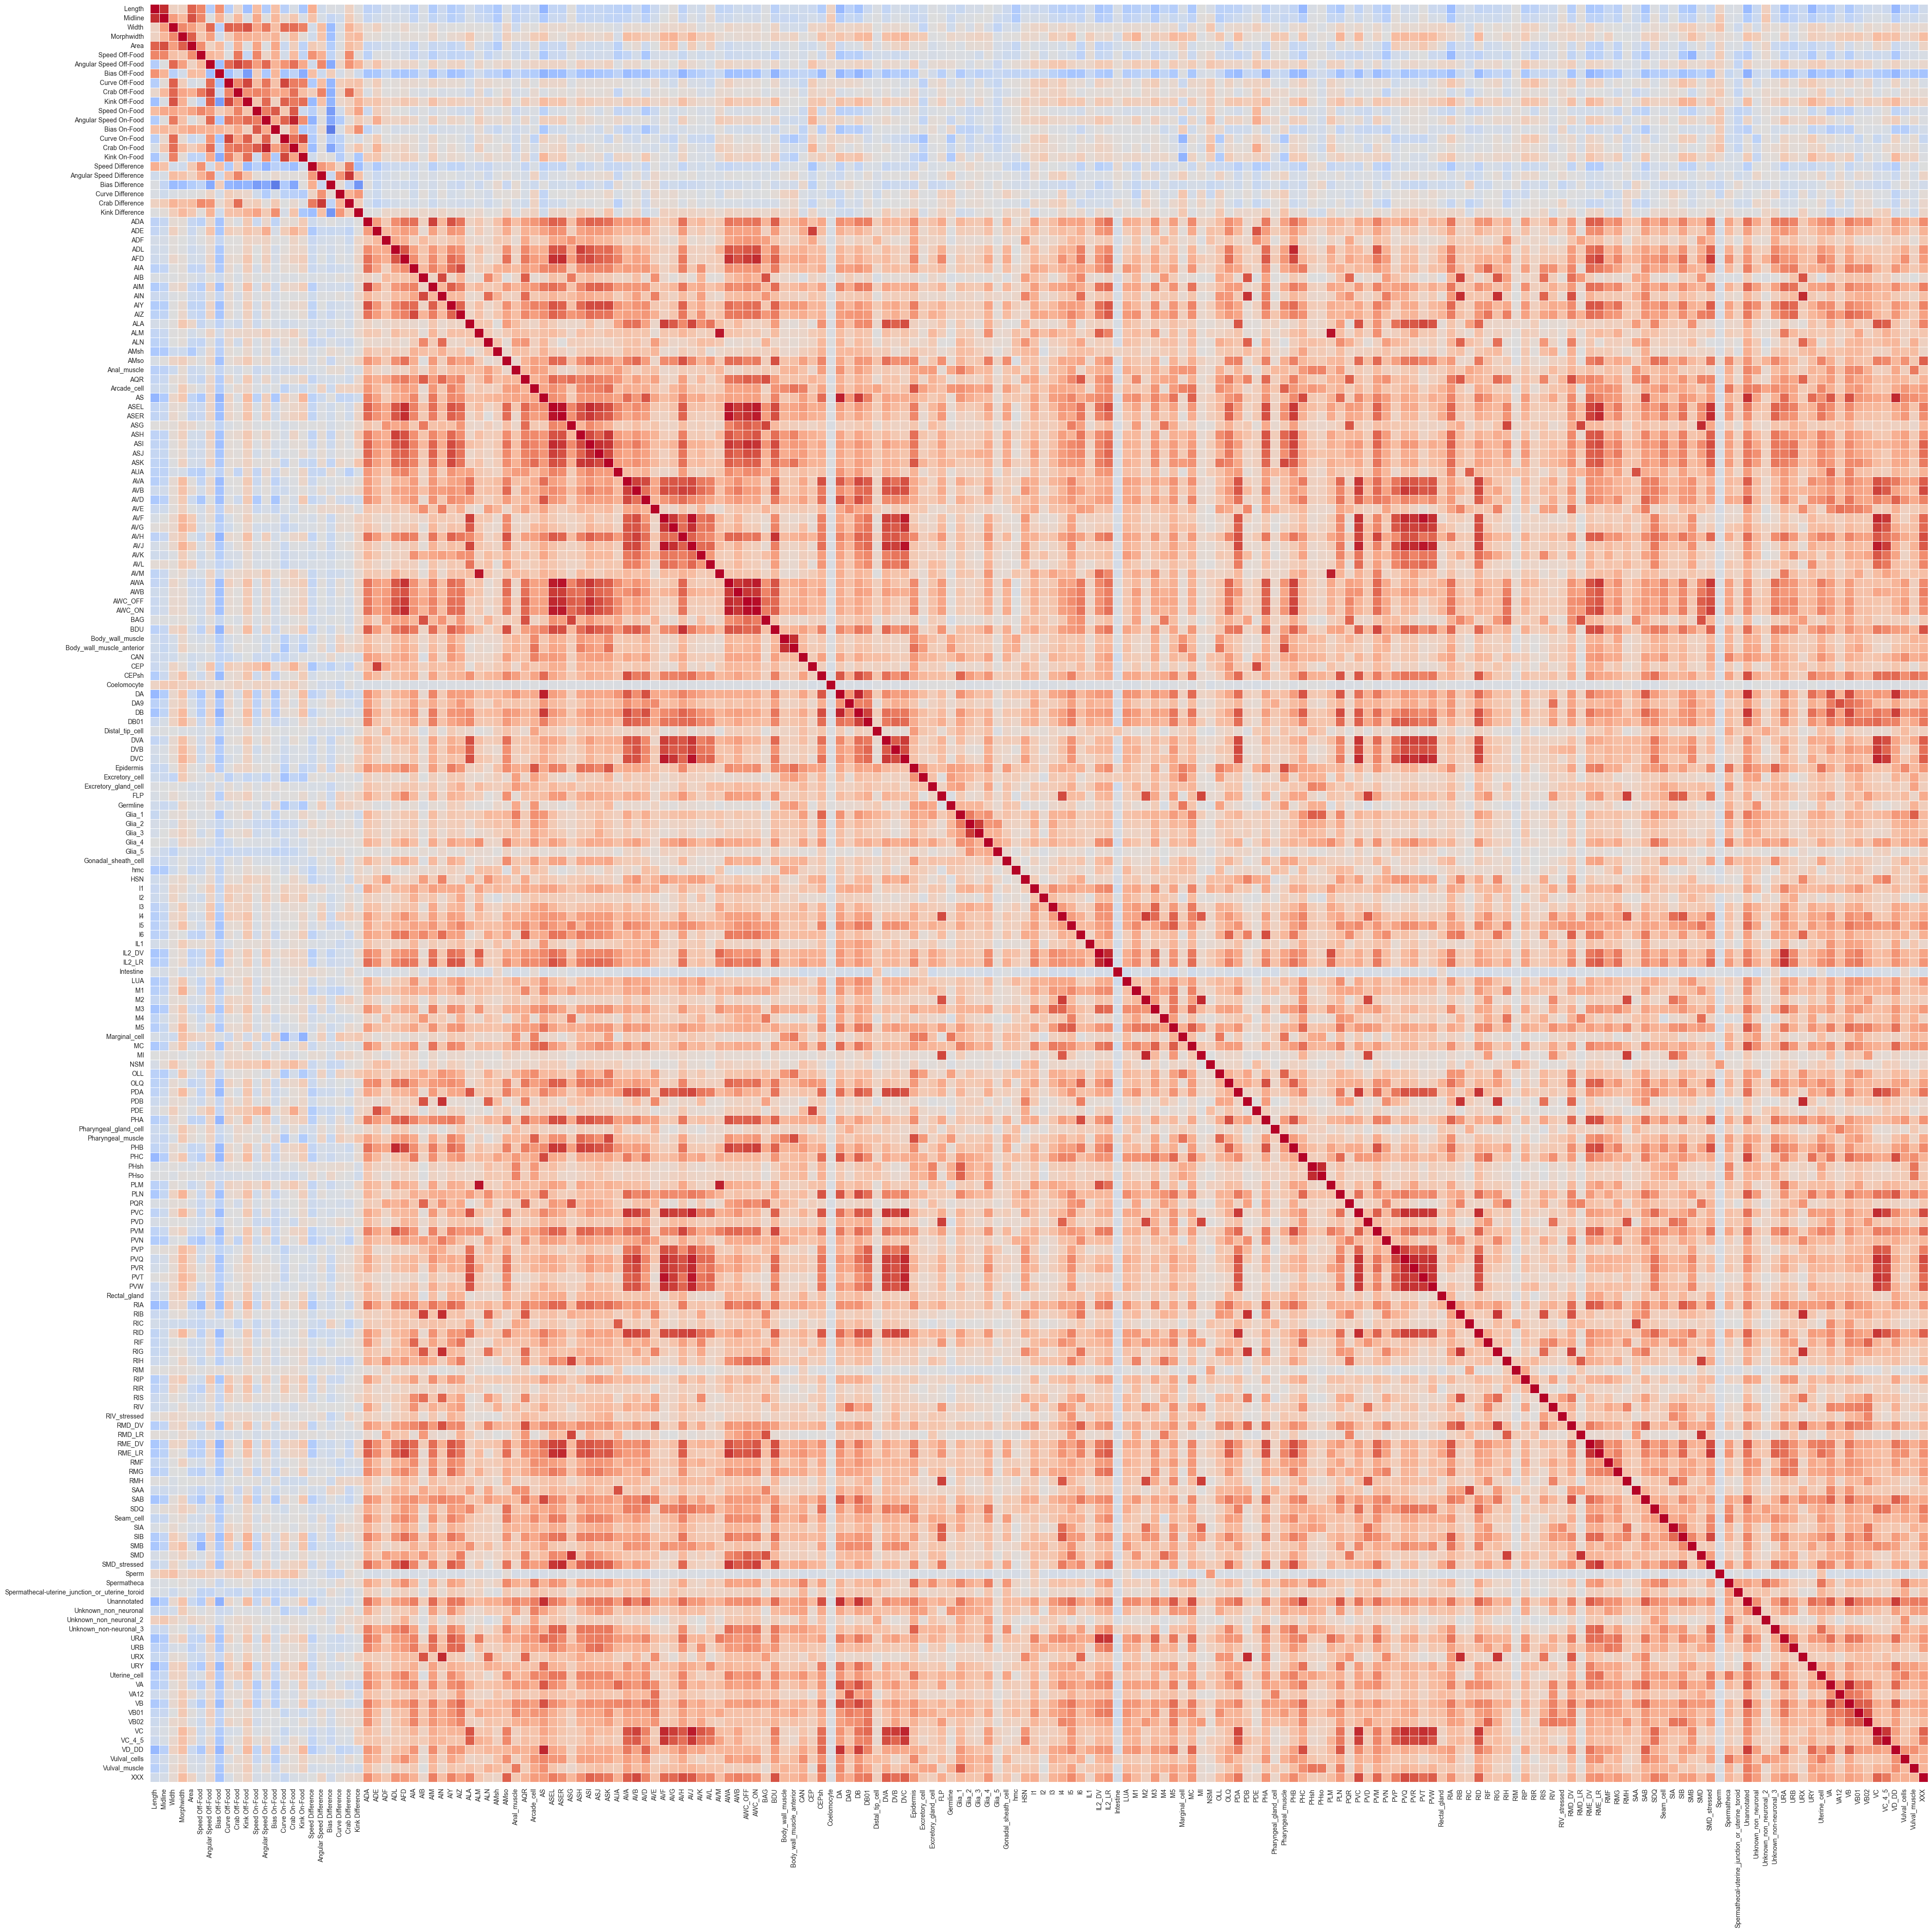

In [44]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_CenGEN_corr = PD_DataWithCenGEN.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_CenGEN_corr, dtype=bool))

plt.figure(figsize = (50,50))
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.heatmap(data = PD_Screen_CenGEN_corr, 
                 annot = False, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_CenGEN_Correlation_AllGenseCombined.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

Only DOPAMINE genes


In [45]:
PD_DataWithCenGEN_Dopamine = PD_DataWithCenGEN[PD_DataWithCenGEN.Category == 'DOPAMINE']

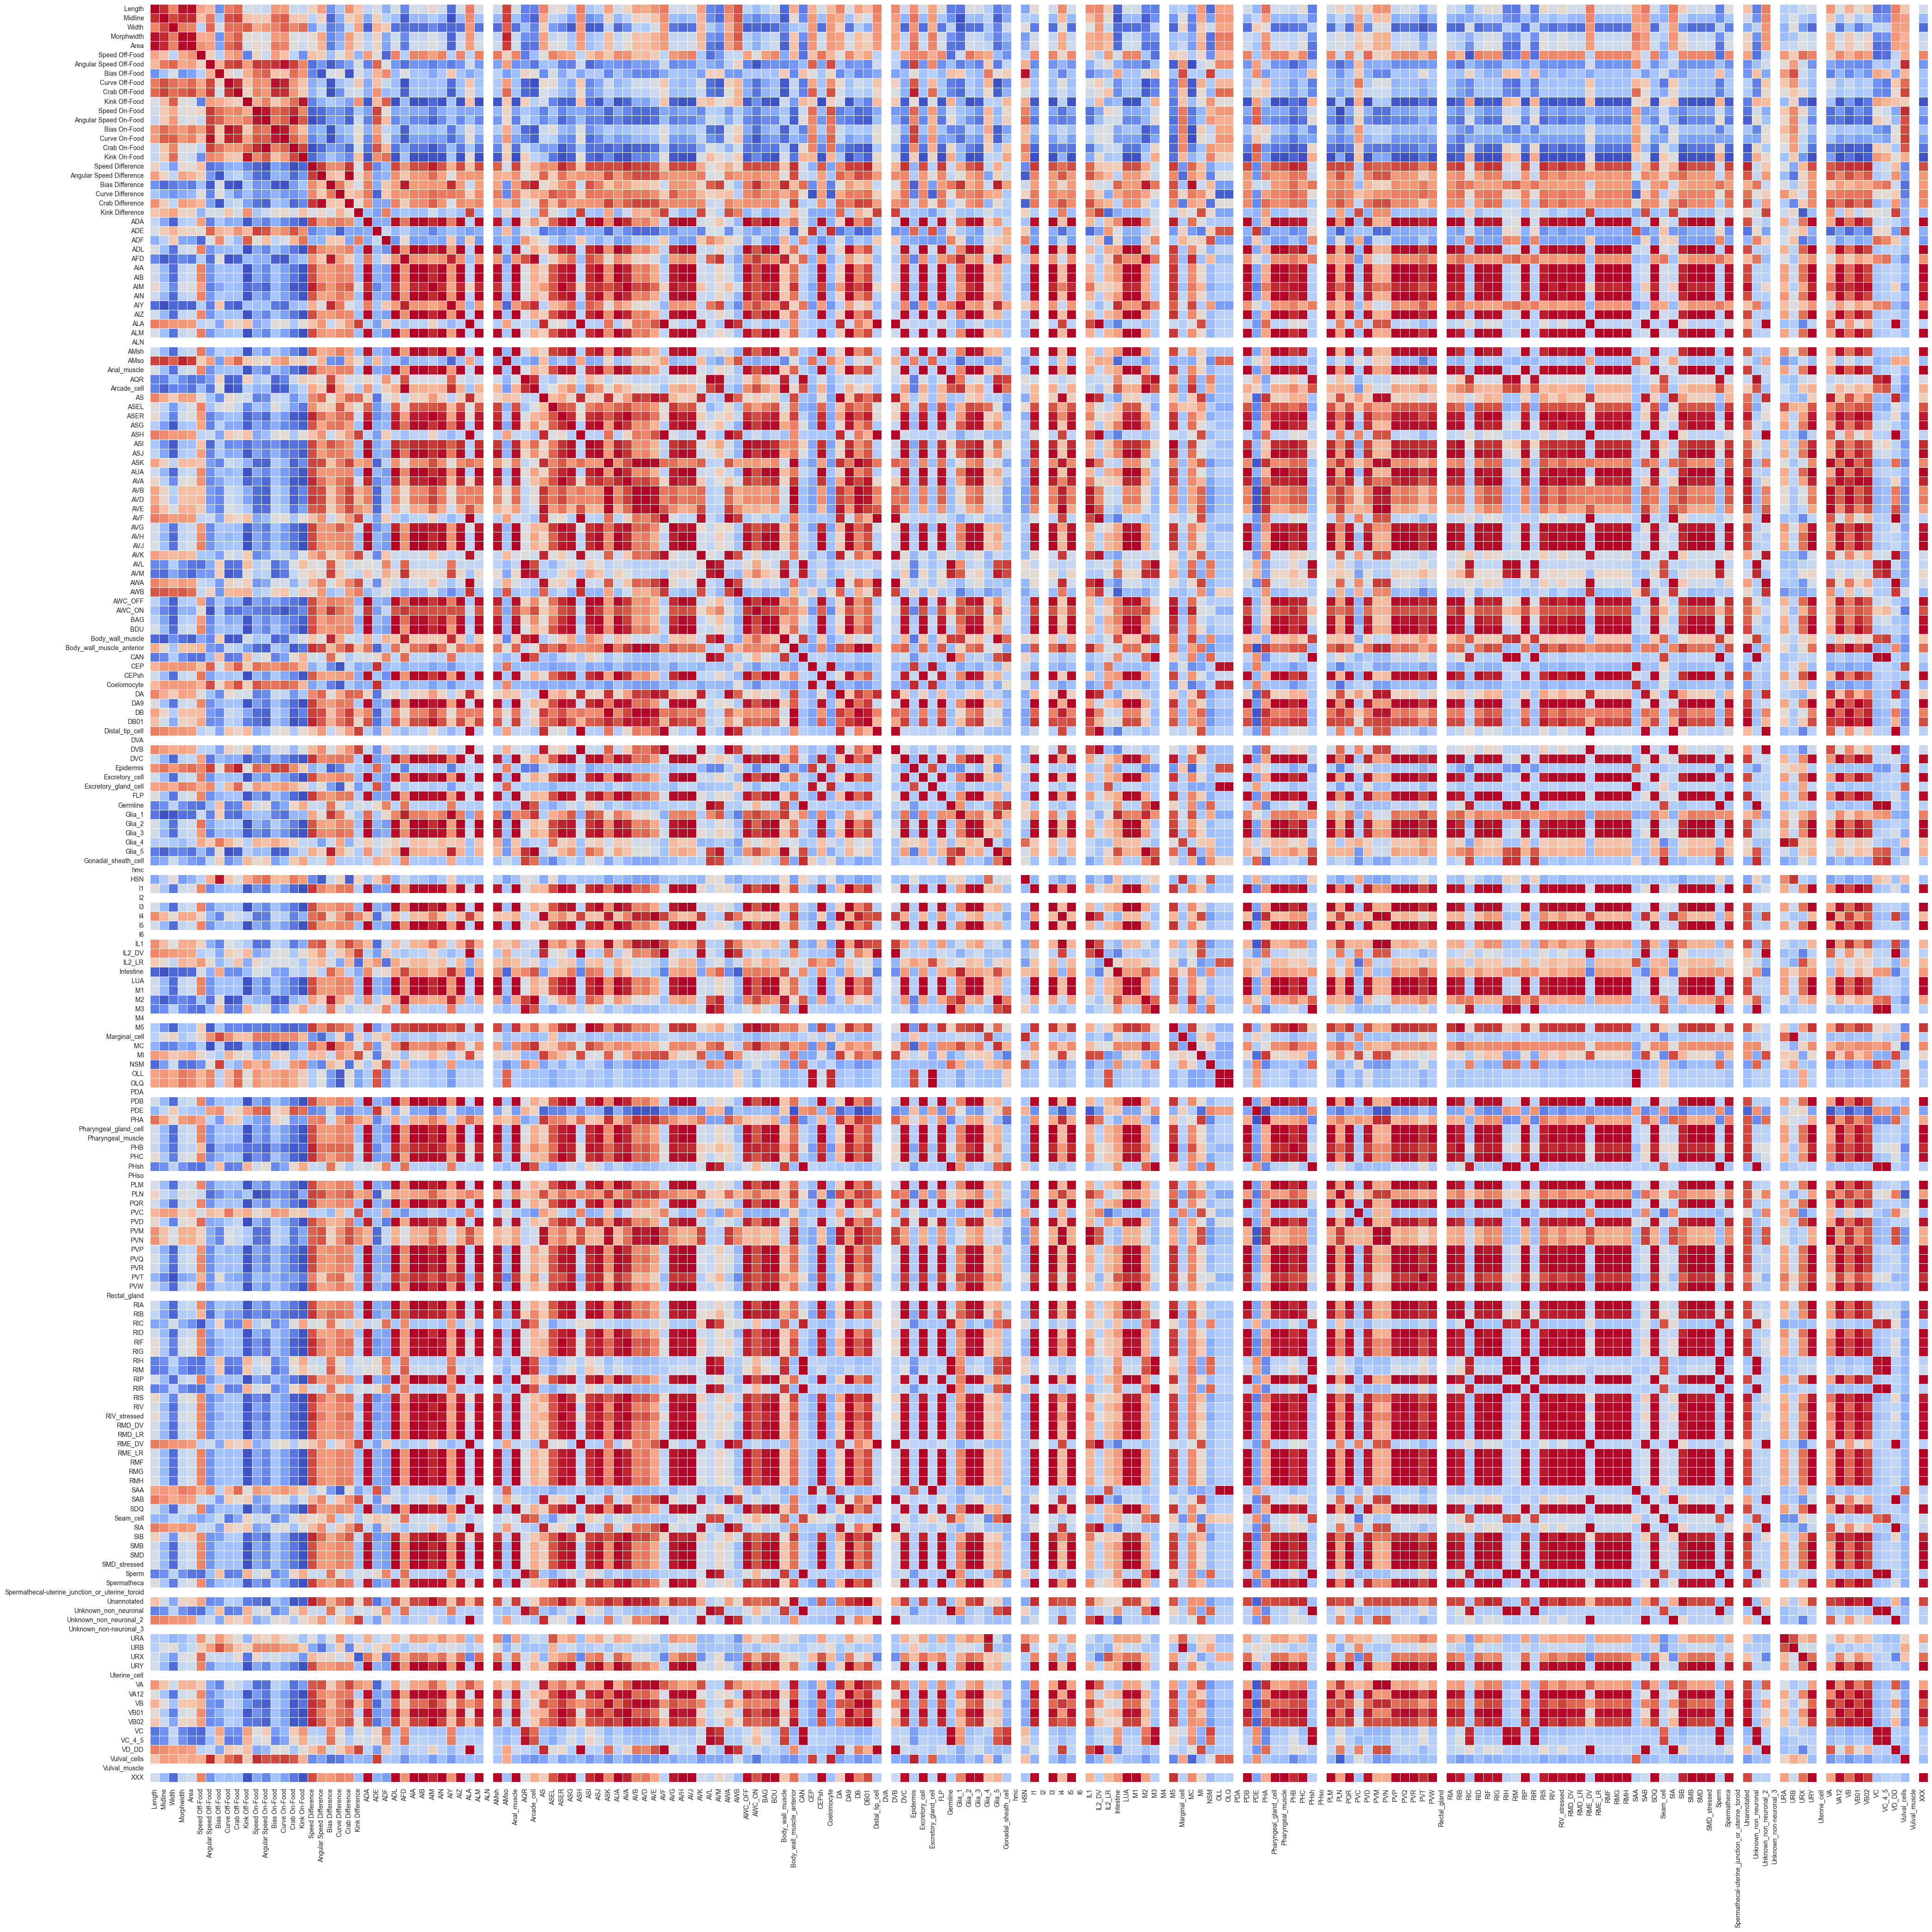

In [46]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_CenGEN_corr = PD_DataWithCenGEN_Dopamine.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_CenGEN_corr, dtype=bool))

plt.figure(figsize = (50,50))
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.heatmap(data = PD_Screen_CenGEN_corr, 
                 annot = False, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_CenGEN_Correlation_DOPAMINE_Only.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [47]:
Dopamine_Correlations = PD_DataWithCenGEN_Dopamine.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()
Dopamine_Correlations

Length   Midline     Width  Morphwidth      Area  \
Length         1.000000  0.921321  0.595355    0.973372  0.980793   
Midline        0.921321  1.000000  0.841766    0.921900  0.937484   
Width          0.595355  0.841766  1.000000    0.646564  0.614684   
Morphwidth     0.973372  0.921900  0.646564    1.000000  0.977246   
Area           0.980793  0.937484  0.614684    0.977246  1.000000   
...                 ...       ...       ...         ...       ...   
VC_4_5        -0.763950 -0.683413 -0.241794   -0.668003 -0.806013   
VD_DD          0.621238  0.562146  0.488185    0.509450  0.471260   
Vulval_cells   0.255893  0.478418  0.481562    0.367233  0.434059   
Vulval_muscle       NaN       NaN       NaN         NaN       NaN   
XXX           -0.080510 -0.428811 -0.846898   -0.169910 -0.111327   

               Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  \
Length               0.458761                0.341381      -0.672181   
Midline              0.281880                0.637502      -0.376935   
Width               -0.217103                0.732243      -0.035290   
Morphwidth           0.414965                0.417784      -0.664961   
Area                 0.542488                0.483352      -0.571848   
...                       ...                     ...            ...   
VC_4_5              -0.829992               -0.399263       0.290208   
VD_DD               -0.222695               -0.144394      -0.549530   
Vulval_cells         0.403359                0.926077       0.345969   
Vulval_muscle             NaN                     NaN            NaN   
XXX                  0.601663               -0.651552      -0.358494   

               Curve Off-Food  Crab Off-Food  Kink Off-Food  Speed On-Food  \
Length               0.632099       0.719575      -0.048950      -0.097669   
Midline              0.812193       0.854887       0.289150       0.215756   
Width                0.688671       0.689545       0.753661       0.407369   
Morphwidth           0.592923       0.763995       0.008256       0.009000   
Area                 0.715807       0.832928      -0.052641       0.079025   
...                       ...            ...            ...            ...   
VC_4_5              -0.773725      -0.734534       0.364325      -0.114134   
VD_DD                0.218845       0.065882       0.280656      -0.552523   
Vulval_cells         0.704549       0.845557       0.195206       0.914222   
Vulval_muscle             NaN            NaN            NaN            NaN   
XXX                 -0.392828      -0.355257      -0.970390      -0.536217   

               Angular Speed On-Food  Bias On-Food  Curve On-Food  \
Length                     -0.163285      0.515364       0.491268   
Midline                     0.203385      0.715729       0.752007   
Width                       0.514223      0.610408       0.764900   
Morphwidth                 -0.061865      0.507607       0.525428   
Area                       -0.014406      0.636981       0.611743   
...                              ...           ...            ...   
VC_4_5                      0.042296     -0.727975      -0.563592   
VD_DD                      -0.422280     -0.006019       0.022195   
Vulval_cells                0.807379      0.833987       0.865914   
Vulval_muscle                    NaN           NaN            NaN   
XXX                        -0.716148     -0.370260      -0.588238   

               Crab On-Food  Kink On-Food  Speed Difference  \
Length            -0.128292     -0.153668          0.160947   
Midline            0.247561      0.214585         -0.227858   
Width              0.592426      0.700640         -0.599561   
Morphwidth        -0.015703     -0.053517          0.070714   
Area               0.008113     -0.109746          0.039758   
...                     ...           ...               ...   
VC_4_5             0.095909      0.403264         -0.118315   
VD_DD             -0.345248      0.026336          0.

In [48]:
cols = Dopamine_Correlations.columns.to_list()
cols_new = cols[23:]
Dopamine_Correlations_CENGEN=Dopamine_Correlations[cols_new]
Dopamine_Correlations_CENGEN

ADA       ADE       ADF       ADL       AFD       AIA  \
Length        -0.188896 -0.054434 -0.503097 -0.040399 -0.722708 -0.080510   
Midline       -0.538040  0.179146 -0.259253 -0.398535 -0.914183 -0.428811   
Width         -0.900346  0.369227  0.214700 -0.825115 -0.844971 -0.846898   
Morphwidth    -0.269232  0.140561 -0.540352 -0.110109 -0.706595 -0.169910   
Area          -0.232635  0.113014 -0.566316 -0.067344 -0.782294 -0.111327   
...                 ...       ...       ...       ...       ...       ...   
VC_4_5        -0.093492  0.090665  0.599988 -0.235242  0.685620 -0.241712   
VD_DD         -0.224691 -0.604352  0.210969 -0.219127 -0.374910 -0.208601   
Vulval_cells  -0.495302  0.854945 -0.305163 -0.371942 -0.651291 -0.400376   
Vulval_muscle       NaN       NaN       NaN       NaN       NaN       NaN   
XXX            0.988247 -0.493889 -0.593930  0.994058  0.540652  1.000000   

                    AIB       AIM       AIN       AIY       AIZ       ALA  \
Length        -0.086692  0.096045 -0.106919 -0.848043 -0.084468  0.632068   
Midline       -0.434913 -0.280207 -0.444228 -0.981783 -0.432784  0.579818   
Width         -0.850363 -0.705736 -0.855961 -0.881398 -0.849188  0.508531   
Morphwidth    -0.175579 -0.031342 -0.205322 -0.879709 -0.173010  0.522636   
Area          -0.117838  0.003322 -0.135359 -0.896043 -0.115233  0.485002   
...                 ...       ...       ...       ...       ...       ...   
VC_4_5        -0.234651 -0.267463 -0.250419  0.632055 -0.236704 -0.260372   
VD_DD         -0.211112  0.148848 -0.219899 -0.422184 -0.211616  0.999709   
Vulval_cells  -0.404016 -0.611761 -0.395139 -0.622353 -0.401582 -0.412892   
Vulval_muscle       NaN       NaN       NaN       NaN       NaN       NaN   
XXX            0.999973  0.933445  0.997802  0.523944  0.999984 -0.226257   

                    ALM  ALN      AMsh      AMso  Anal_muscle       AQR  \
Length        -0.040455  NaN -0.115360  0.857260    -0.040969 -0.750080   
Midline       -0.393935  NaN -0.436010  0.874564    -0.396997 -0.757620   
Width         -0.825627  NaN -0.849818  0.753423    -0.824909 -0.399837   
Morphwidth    -0.126310  NaN -0.217630  0.944937    -0.138513 -0.684607   
Area          -0.070454  NaN -0.132157  0.868602    -0.081608 -0.822349   
...                 ...  ...       ...       ...          ...       ...   
VC_4_5        -0.266288  NaN -0.288121 -0.411403    -0.261454  0.971840   
VD_DD         -0.194446  NaN -0.256262  0.445143    -0.147081 -0.186291   
Vulval_cells  -0.384141  NaN -0.340034  0.407356    -0.431897 -0.586623   
Vulval_muscle       NaN  NaN       NaN       NaN          NaN       NaN   
XXX            0.998929  NaN  0.989989 -0.392407     0.998045 -0.040064   

               Arcade_cell        AS      ASEL      ASER       ASG       ASH  \
Length           -0.754117  0.607426  0.009462  0.065318 -0.271385  0.628587   
Midline          -0.900866  0.415786 -0.214739 -0.309268 -0.601124  0.572238   
Width            -0.746569  0.177078 -0.606019 -0.739536 -0.932956  0.498423   
Morphwidth       -0.718855  0.461086 -0.176568 -0.056119 -0.358282  0.518189   
Area             -0.817977  0.446351 -0.020606 -0.015626 -0.311845  0.480151   
...                    ...       ...       ...       ...       ...       ...   
VC_4_5            0.796797 -0.359743 -0.514421 -0.269847 -0.054259 -0.257596   
VD_DD            -0.342284  0.928356  0.005115  0.079684 -0.266730  0.999919   
Vulval_cells     -0.649019 -0.577274 -0.296654 -0.573004 -0.502381 -0.422751   
Vulval_muscle          NaN       NaN       NaN       NaN       NaN       NaN   
XXX               0.392788  0.169518  0.796048  0.956833  0.978196 -0.216306   

                    ASI  ...       SMD  SMD_stressed     Sperm  Spermatheca  \
Length        -0.329915  ... -0.064292     -0.080510 -0.765072     0.015065   
Midline       -0.668294  ... -0.415799     -0.428811 -0.684271    -0.337045   
Width         -0.933263  ... -0.838321     -0.846898 -0.242398    -0.77

In [52]:
BSR_Dopamine_Correlations = Dopamine_Correlations_CENGEN[Dopamine_Correlations_CENGEN.index == 'Speed Difference'].T.dropna()
BSR_Dopamine_Correlations['Speed Difference abs'] = abs(BSR_Dopamine_Correlations['Speed Difference'])
BSR_Dopamine_Correlations['Direction']= BSR_Dopamine_Correlations['Speed Difference']/BSR_Dopamine_Correlations['Speed Difference abs']
BSR_Dopamine_Correlations = BSR_Dopamine_Correlations.sort_values(by='Speed Difference abs', key=abs, ascending=False).reset_index(drop=False)
BSR_Dopamine_Correlations = BSR_Dopamine_Correlations[BSR_Dopamine_Correlations['index'] != 'Speed Difference'].reset_index(drop=True)
BSR_Dopamine_Correlations

index  Speed Difference  Speed Difference abs  Direction
0            AIM          0.949099              0.949099        1.0
1            PHB          0.943722              0.943722        1.0
2           VB02          0.942452              0.942452        1.0
3           DB01          0.941755              0.941755        1.0
4    Unannotated          0.940897              0.940897        1.0
..           ...               ...                   ...        ...
151    Seam_cell          0.083207              0.083207        1.0
152          RIC         -0.047691              0.047691       -1.0
153          RIM         -0.017831              0.017831       -1.0
154          AVL          0.015976              0.015976        1.0
155          URA         -0.015738              0.015738       -1.0

[156 rows x 4 columns]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_47351/1320806933.py:7: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.barplot(y= 'index',


<Figure size 640x480 with 0 Axes>

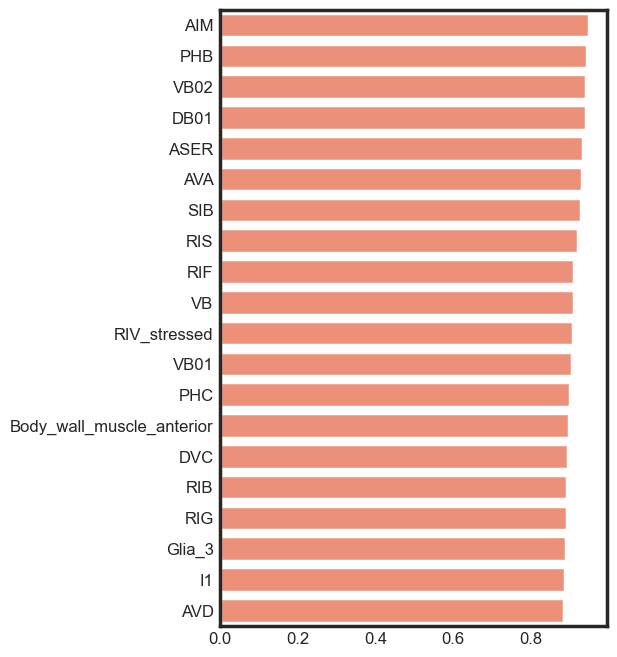

In [55]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR Screen CenGEN Correlations"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 8))
plt.gca().xaxis.grid(False)
ax = sns.barplot(y= 'index', 
                x = 'Speed Difference', 
                data = BSR_Dopamine_Correlations[BSR_Dopamine_Correlations['index'] != 'Unannotated'].head(20), #<--------------- Input Here -------------
                # color = 'CornflowerBlue',
                orient = 'h',
                hue = 'Direction',
                 palette = ['#ff8566','#6666ff'],
                 legend = False,
             # edgecolor="DodgerBlue",
               linewidth = 2.5, 
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [56]:
Dopamine_Correlations

Length   Midline     Width  Morphwidth      Area  \
Length         1.000000  0.921321  0.595355    0.973372  0.980793   
Midline        0.921321  1.000000  0.841766    0.921900  0.937484   
Width          0.595355  0.841766  1.000000    0.646564  0.614684   
Morphwidth     0.973372  0.921900  0.646564    1.000000  0.977246   
Area           0.980793  0.937484  0.614684    0.977246  1.000000   
...                 ...       ...       ...         ...       ...   
VC_4_5        -0.763950 -0.683413 -0.241794   -0.668003 -0.806013   
VD_DD          0.621238  0.562146  0.488185    0.509450  0.471260   
Vulval_cells   0.255893  0.478418  0.481562    0.367233  0.434059   
Vulval_muscle       NaN       NaN       NaN         NaN       NaN   
XXX           -0.080510 -0.428811 -0.846898   -0.169910 -0.111327   

               Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  \
Length               0.458761                0.341381      -0.672181   
Midline              0.281880                0.637502      -0.376935   
Width               -0.217103                0.732243      -0.035290   
Morphwidth           0.414965                0.417784      -0.664961   
Area                 0.542488                0.483352      -0.571848   
...                       ...                     ...            ...   
VC_4_5              -0.829992               -0.399263       0.290208   
VD_DD               -0.222695               -0.144394      -0.549530   
Vulval_cells         0.403359                0.926077       0.345969   
Vulval_muscle             NaN                     NaN            NaN   
XXX                  0.601663               -0.651552      -0.358494   

               Curve Off-Food  Crab Off-Food  Kink Off-Food  Speed On-Food  \
Length               0.632099       0.719575      -0.048950      -0.097669   
Midline              0.812193       0.854887       0.289150       0.215756   
Width                0.688671       0.689545       0.753661       0.407369   
Morphwidth           0.592923       0.763995       0.008256       0.009000   
Area                 0.715807       0.832928      -0.052641       0.079025   
...                       ...            ...            ...            ...   
VC_4_5              -0.773725      -0.734534       0.364325      -0.114134   
VD_DD                0.218845       0.065882       0.280656      -0.552523   
Vulval_cells         0.704549       0.845557       0.195206       0.914222   
Vulval_muscle             NaN            NaN            NaN            NaN   
XXX                 -0.392828      -0.355257      -0.970390      -0.536217   

               Angular Speed On-Food  Bias On-Food  Curve On-Food  \
Length                     -0.163285      0.515364       0.491268   
Midline                     0.203385      0.715729       0.752007   
Width                       0.514223      0.610408       0.764900   
Morphwidth                 -0.061865      0.507607       0.525428   
Area                       -0.014406      0.636981       0.611743   
...                              ...           ...            ...   
VC_4_5                      0.042296     -0.727975      -0.563592   
VD_DD                      -0.422280     -0.006019       0.022195   
Vulval_cells                0.807379      0.833987       0.865914   
Vulval_muscle                    NaN           NaN            NaN   
XXX                        -0.716148     -0.370260      -0.588238   

               Crab On-Food  Kink On-Food  Speed Difference  \
Length            -0.128292     -0.153668          0.160947   
Midline            0.247561      0.214585         -0.227858   
Width              0.592426      0.700640         -0.599561   
Morphwidth        -0.015703     -0.053517          0.070714   
Area               0.008113     -0.109746          0.039758   
...                     ...           ...               ...   
VC_4_5             0.095909      0.403264         -0.118315   
VD_DD             -0.345248      0.026336          0.

Only PD Genes

In [57]:
PD_DataWithCenGEN_Screen = PD_DataWithCenGEN[PD_DataWithCenGEN.Category != 'DOPAMINE']

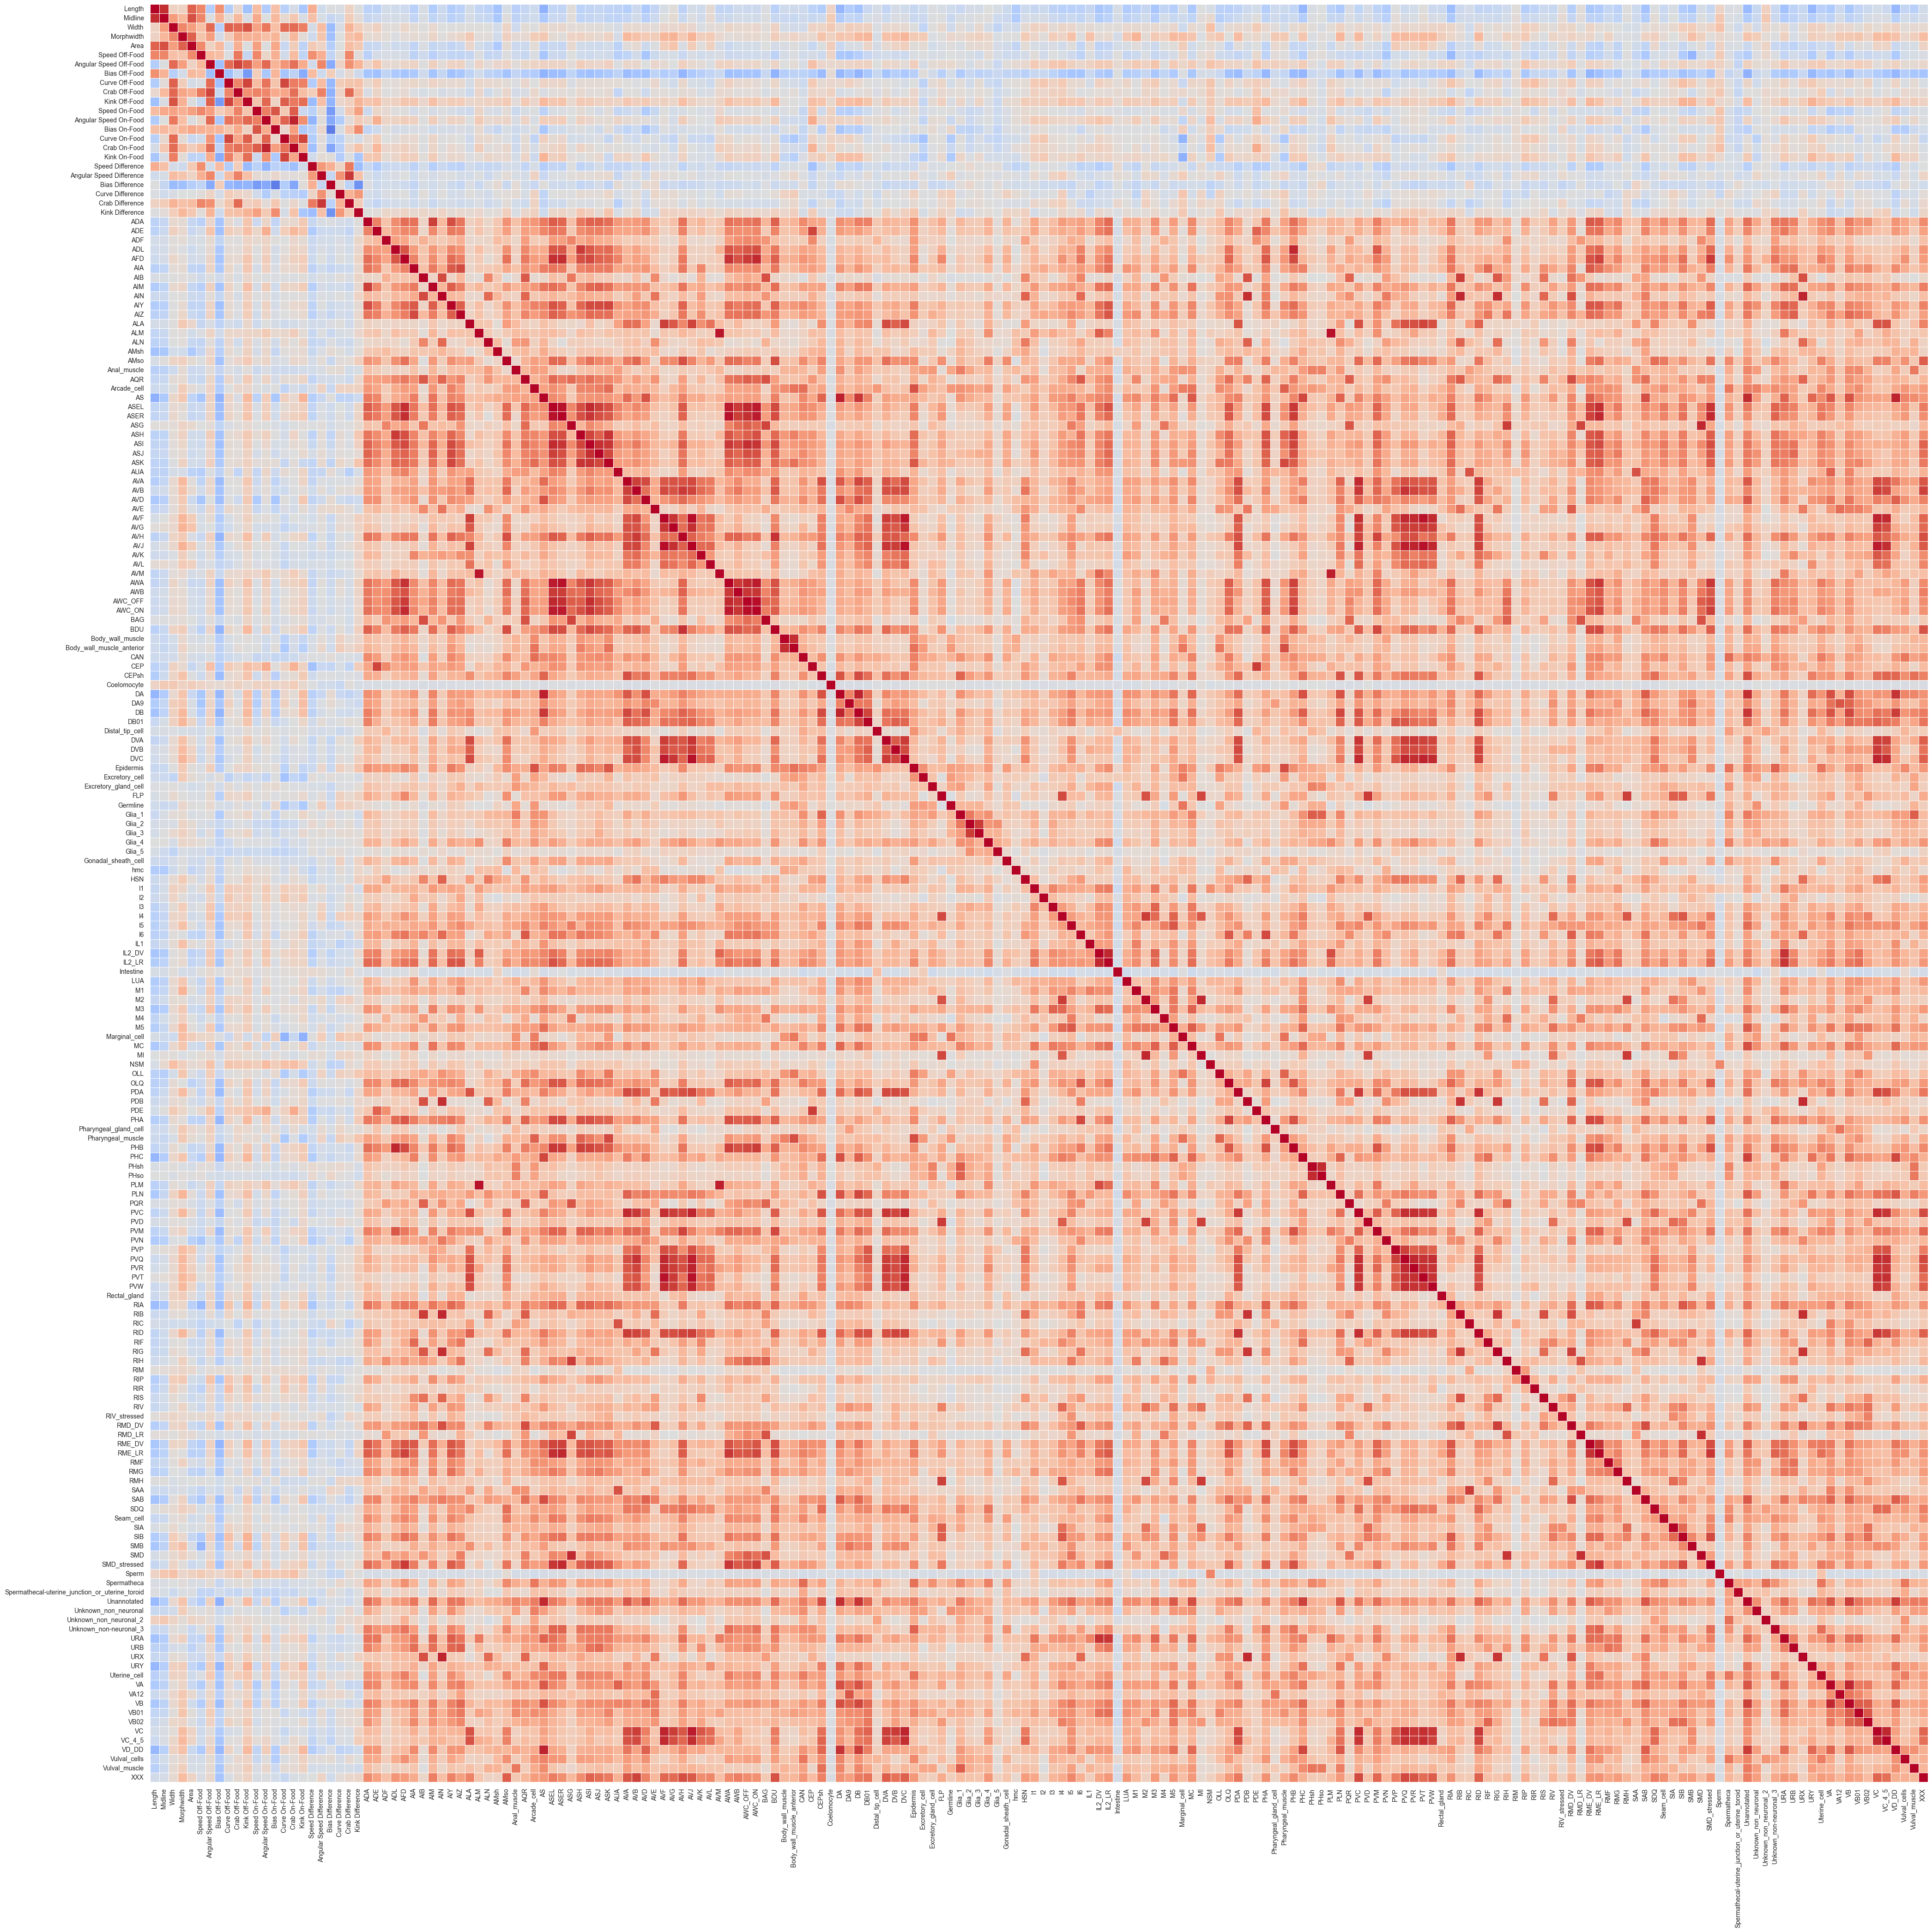

In [58]:
# sns.set_context('notebook')
sns.set_theme(style="white")

# Compute the correlation matrix
PD_Screen_CenGEN_corr = PD_DataWithCenGEN_Screen.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(PD_Screen_CenGEN_corr, dtype=bool))

plt.figure(figsize = (50,50))
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.heatmap(data = PD_Screen_CenGEN_corr, 
                 annot = False, 
                 annot_kws={"size": 12},
                 linewidths = 0.5, 
                 square = True, 
                 cmap = sns.color_palette("coolwarm", as_cmap=True), 
                 center = 0, 
                 vmax = 1,
                 vmin = -1, 
                #  mask = mask,
                 cbar=False,
                 # xticklabels = 1,
                #  xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                #                 'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                #                 'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                #                 'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                #                 'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                #  yticklabels = 1,
                 cbar_kws = {"shrink": .4,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)

# for t in ax.texts:
#     if float(t.get_text())>=0.8 or float(t.get_text())<=-0.8:
#         t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
#     else:
#         t.set_text("") # if not it sets an empty text

# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_CombinedSTats_CenGEN_Correlation_PDGenesOnly.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [59]:
PD_Screen_Correlations = PD_DataWithCenGEN_Screen.drop(columns=['Worm Gene','Human Gene','Category']).dropna().set_index('Gene').corr()


In [60]:
PD_Screen_Correlations.columns.to_list()

cols = PD_Screen_Correlations.columns.to_list()
cols_new = cols[23:]
PD_Screen_Correlations_CENGEN=PD_Screen_Correlations[cols_new]
PD_Screen_Correlations_CENGEN


ADA       ADE       ADF       ADL       AFD       AIA  \
Length        -0.219672 -0.219990 -0.079678 -0.094121 -0.114067 -0.248306   
Midline       -0.157742 -0.131893 -0.069085 -0.076013 -0.069721 -0.184579   
Width          0.078038  0.163508  0.022442  0.030802  0.101871  0.045889   
Morphwidth     0.051467  0.082376  0.042008 -0.019699  0.036501  0.057841   
Area          -0.162441 -0.142476 -0.054531 -0.114947 -0.087718 -0.187722   
...                 ...       ...       ...       ...       ...       ...   
VC_4_5         0.261434  0.250728  0.115933  0.200468  0.208267  0.294106   
VD_DD          0.524440  0.504282  0.154088  0.280077  0.315776  0.569830   
Vulval_cells   0.431394  0.401958  0.191919  0.398915  0.538154  0.395894   
Vulval_muscle  0.301525  0.193188  0.070546  0.148527  0.156357  0.241494   
XXX            0.563326  0.455717  0.275488  0.519180  0.486910  0.398663   

                    AIB       AIM       AIN       AIY       AIZ       ALA  \
Length        -0.040059 -0.287312 -0.127254 -0.285527 -0.227382 -0.075642   
Midline       -0.040567 -0.197378 -0.121005 -0.248604 -0.190770 -0.054917   
Width          0.004809  0.074616 -0.006325  0.005403  0.014838  0.012678   
Morphwidth     0.030689  0.111843  0.012119  0.070128  0.108396  0.218585   
Area          -0.029884 -0.167814 -0.118713 -0.192968 -0.134496  0.098968   
...                 ...       ...       ...       ...       ...       ...   
VC_4_5         0.224814  0.370272  0.359005  0.270108  0.280824  0.797538   
VD_DD          0.078042  0.562880  0.217329  0.518650  0.526852  0.253632   
Vulval_cells   0.061355  0.375450  0.172187  0.431804  0.313603  0.120874   
Vulval_muscle -0.003818  0.322152  0.108569  0.247262  0.204237  0.273498   
XXX            0.101952  0.617608  0.284121  0.602729  0.465408  0.607715   

                    ALM       ALN      AMsh      AMso  Anal_muscle       AQR  \
Length        -0.183342 -0.219874 -0.363872 -0.051105    -0.238853 -0.170092   
Midline       -0.136814 -0.165821 -0.321491  0.008510    -0.216073 -0.133948   
Width          0.010100 -0.006562 -0.085649  0.119224    -0.109419  0.043260   
Morphwidth     0.024048  0.024650 -0.093972  0.158461     0.057555  0.068448   
Area          -0.085248 -0.153037 -0.304125  0.052899    -0.130139 -0.118294   
...                 ...       ...       ...       ...          ...       ...   
VC_4_5         0.393485  0.353866  0.211434  0.606664     0.193835  0.306935   
VD_DD          0.260431  0.338455  0.372884  0.338458     0.430578  0.356985   
Vulval_cells   0.165132  0.126777  0.311103  0.537226     0.172576  0.317884   
Vulval_muscle  0.193192  0.370129  0.357836  0.224668     0.646996  0.187307   
XXX            0.238871  0.145962  0.145233  0.750572     0.219629  0.343696   

               Arcade_cell        AS      ASEL      ASER       ASG       ASH  \
Length           -0.115873 -0.480035 -0.182609 -0.194316  0.015705 -0.220104   
Midline          -0.096911 -0.306483 -0.137049 -0.142059  0.026630 -0.197565   
Width             0.005982  0.107479  0.067909  0.088152  0.035596  0.041188   
Morphwidth        0.193087  0.223973  0.052398  0.020556  0.125468  0.145161   
Area              0.040126 -0.203200 -0.134514 -0.159173  0.073962 -0.089870   
...                    ...       ...       ...       ...       ...       ...   
VC_4_5            0.242365  0.422969  0.312427  0.219908  0.190318  0.242902   
VD_DD             0.408916  0.944707  0.432285  0.383955  0.152319  0.374258   
Vulval_cells      0.512137  0.599650  0.508698  0.499843  0.187290  0.468771   
Vulval_muscle     0.402029  0.561913  0.247774  0.159387  0.095690  0.206275   
XXX               0.485804  0.500918  0.629283  0.547213  0.324767  0.557045   

                    ASI  ...       SMD  SMD_stressed     Sperm  Spermatheca  \
Length        -0.192657  ... -0.058336     -0.159918  0.130872    -0.036932   
Midline       -0.168276  ... -0.009617     -0.095932  0.227167    -0.024296   
Width      

In [62]:
BSR_Screen_Correlations = PD_Screen_Correlations_CENGEN[PD_Screen_Correlations_CENGEN.index == 'Speed Difference'].T.dropna()
BSR_Screen_Correlations['Speed Difference abs'] = abs(BSR_Screen_Correlations['Speed Difference'])
BSR_Screen_Correlations['Direction']= BSR_Screen_Correlations['Speed Difference']/BSR_Screen_Correlations['Speed Difference abs']
BSR_Screen_Correlations = BSR_Screen_Correlations.sort_values(by=['Speed Difference abs'], key=abs, ascending=False).reset_index(drop=False)
BSR_Screen_Correlations = BSR_Screen_Correlations[BSR_Screen_Correlations['index'] != 'Speed Difference'].reset_index(drop=True)
BSR_Screen_Correlations

index  Speed Difference  Speed Difference abs  Direction
0                     CEP         -0.373233              0.373233       -1.0
1                     RIA         -0.320532              0.320532       -1.0
2                  RME_DV         -0.297823              0.297823       -1.0
3                     ADE         -0.295902              0.295902       -1.0
4                     PHC         -0.277383              0.277383       -1.0
..                    ...               ...                   ...        ...
164                   XXX         -0.004219              0.004219       -1.0
165                   PVD         -0.003763              0.003763       -1.0
166              Germline         -0.001619              0.001619       -1.0
167                    I1         -0.001594              0.001594       -1.0
168  Unknown_non_neuronal          0.001312              0.001312        1.0

[169 rows x 4 columns]

In [436]:
BSR_Screen_Correlations.to_csv('/Users/Joseph/Desktop/BSR_Correlations_PDGenes.csv')

In [63]:
BSR_Screen_Correlations = pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/CENGEN_Correlations/BSR_Correlations_PDGenes.csv').drop(columns=['Unnamed: 0'])
BSR_Screen_Correlations

index  Speed Difference  Speed Difference abs  Direction  \
0                     CEP         -0.372437              0.372437         -1   
1                     RIA         -0.319349              0.319349         -1   
2                  RME_DV         -0.296315              0.296315         -1   
3                     ADE         -0.294841              0.294841         -1   
4                     PHC         -0.276855              0.276855         -1   
..                    ...               ...                   ...        ...   
163                   PVD         -0.003316              0.003316         -1   
164                   XXX         -0.003260              0.003260         -1   
165              Germline         -0.001616              0.001616         -1   
166  Unknown_non_neuronal          0.001586              0.001586          1   
167                    I1         -0.001010              0.001010         -1   

    Neurotransmitter  
0           Dopamine  
1          Glutamate  
2               GABA  
3           Dopamine  
4          Glutamate  
..               ...  
163              NaN  
164              NaN  
165              NaN  
166              NaN  
167              NaN  

[168 rows x 5 columns]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_47351/2619901405.py:7: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.barplot(y= 'index',


<Figure size 640x480 with 0 Axes>

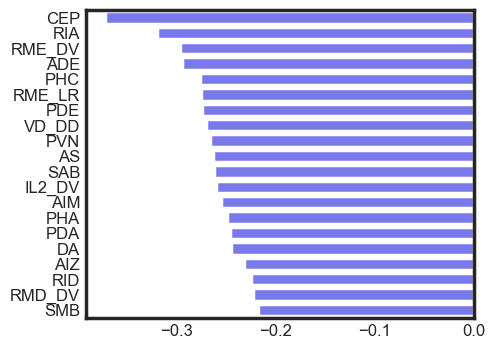

In [65]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR CenGEN Correlations PDScreen"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 4))
plt.gca().xaxis.grid(False)
ax = sns.barplot(y= 'index', 
                x = 'Speed Difference', 
                data = BSR_Screen_Correlations[BSR_Screen_Correlations['index'] != 'Unannotated'].head(20), #<--------------- Input Here -------------
                orient = 'h',
                hue = 'Direction',
                 palette = ['#6666ff','#ff8566'],
                 legend = False,
               linewidth = 2.5, 
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [66]:
PD_Screen_Correlations.columns.to_list()

cols = PD_Screen_Correlations.columns.to_list()
cols_new = cols[:23]
PD_Screen_Correlations_Phenotypes=PD_Screen_Correlations[cols_new]
PD_Screen_Correlations_Phenotypes

Length   Midline     Width  Morphwidth      Area  \
Length         1.000000  0.914691  0.143838    0.142152  0.736991   
Midline        0.914691  1.000000  0.487156    0.330296  0.807808   
Width          0.143838  0.487156  1.000000    0.586192  0.468782   
Morphwidth     0.142152  0.330296  0.586192    1.000000  0.749743   
Area           0.736991  0.807808  0.468782    0.749743  1.000000   
...                 ...       ...       ...         ...       ...   
VC_4_5        -0.125632 -0.038228  0.102157    0.314055  0.121935   
VD_DD         -0.435068 -0.246090  0.135831    0.272350 -0.137662   
Vulval_cells  -0.177003 -0.085615  0.032978    0.089540 -0.059727   
Vulval_muscle -0.246160 -0.119081  0.068212    0.164777 -0.047558   
XXX           -0.091077 -0.064662  0.066726    0.301482  0.125649   

               Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  \
Length               0.590146               -0.273054       0.545902   
Midline              0.593380               -0.010933       0.359467   
Width                0.288083                0.713672      -0.250256   
Morphwidth           0.250990                0.472147      -0.077038   
Area                 0.574074                0.133593       0.312696   
...                       ...                     ...            ...   
VC_4_5              -0.096779                0.087824      -0.345327   
VD_DD               -0.304232                0.146379      -0.438671   
Vulval_cells        -0.079350                0.053679      -0.267995   
Vulval_muscle       -0.053275                0.062301      -0.333357   
XXX                 -0.031728                0.092965      -0.358297   

               Curve Off-Food  Crab Off-Food  Kink Off-Food  Speed On-Food  \
Length              -0.274234       0.082497      -0.379007       0.298549   
Midline              0.034964       0.318332      -0.034811       0.419820   
Width                0.748269       0.726413       0.791004       0.445528   
Morphwidth           0.173103       0.442096       0.374027       0.377447   
Area                -0.071912       0.379028      -0.011290       0.461706   
...                       ...            ...            ...            ...   
VC_4_5               0.011527       0.028823       0.224985       0.033004   
VD_DD                0.131171      -0.022292       0.314922      -0.192056   
Vulval_cells        -0.026931       0.083696       0.130073      -0.136068   
Vulval_muscle        0.061174       0.056274       0.175527      -0.037179   
XXX                 -0.046546       0.059723       0.137566      -0.046320   

               Angular Speed On-Food  Bias On-Food  Curve On-Food  \
Length                     -0.289592      0.276054      -0.246813   
Midline                    -0.001160      0.324055       0.074279   
Width                       0.650914      0.288578       0.709498   
Morphwidth                  0.285826      0.353096       0.054254   
Area                       -0.011271      0.423499      -0.142013   
...                              ...           ...            ...   
VC_4_5                      0.115889     -0.021200      -0.061179   
VD_DD                       0.191020     -0.269464       0.137017   
Vulval_cells                0.008968     -0.267848      -0.026055   
Vulval_muscle               0.092701     -0.129493       0.059334   
XXX                        -0.014818     -0.079111      -0.149265   

               Crab On-Food  Kink On-Food  Speed Difference  \
Length            -0.054761     -0.331402          0.397813   
Midline            0.227405     -0.036198          0.277276   
Width              0.696241      0.617237         -0.068314   
Morphwidth         0.323740      0.045478         -0.105951   
Area               0.178344     -0.207147          0.209063   
...                     ...           ...               ...   
VC_4_5             0.073331      0.020289         -0.190878   
VD_DD              0.087537      0.325884         -0.

In [69]:
BSR_Screen_Correlations = PD_Screen_Correlations_Phenotypes[PD_Screen_Correlations_Phenotypes.index == 'Speed Difference'].T.dropna()
BSR_Screen_Correlations['Speed Difference abs'] = abs(BSR_Screen_Correlations['Speed Difference'])
BSR_Screen_Correlations['Direction']= BSR_Screen_Correlations['Speed Difference']/BSR_Screen_Correlations['Speed Difference abs']
BSR_Screen_Correlations = BSR_Screen_Correlations.sort_values(by=['Speed Difference abs'], key=abs, ascending=False).reset_index(drop=False)
BSR_Screen_Correlations = BSR_Screen_Correlations[BSR_Screen_Correlations['index'] != 'Speed Difference'].reset_index(drop=True)
BSR_Screen_Correlations

index  Speed Difference  Speed Difference abs  \
0            Crab Difference          0.645186              0.645186   
1             Speed Off-Food          0.548767              0.548767   
2   Angular Speed Difference          0.496235              0.496235   
3      Angular Speed On-Food         -0.461758              0.461758   
4              Kink Off-Food         -0.416169              0.416169   
5            Kink Difference         -0.400260              0.400260   
6                     Length          0.397813              0.397813   
7               Crab On-Food         -0.389104              0.389104   
8            Bias Difference          0.377728              0.377728   
9              Bias Off-Food          0.307504              0.307504   
10            Curve Off-Food         -0.288486              0.288486   
11             Curve On-Food         -0.285122              0.285122   
12                   Midline          0.277276              0.277276   
13             Speed On-Food         -0.233097              0.233097   
14              Bias On-Food         -0.228541              0.228541   
15                      Area          0.209063              0.209063   
16             Crab Off-Food          0.182342              0.182342   
17          Curve Difference          0.121664              0.121664   
18                Morphwidth         -0.105951              0.105951   
19    Angular Speed Off-Food         -0.089024              0.089024   
20              Kink On-Food         -0.087843              0.087843   
21                     Width         -0.068314              0.068314   

    Direction  
0         1.0  
1         1.0  
2         1.0  
3        -1.0  
4        -1.0  
5        -1.0  
6         1.0  
7        -1.0  
8         1.0  
9         1.0  
10       -1.0  
11       -1.0  
12        1.0  
13       -1.0  
14       -1.0  
15        1.0  
16        1.0  
17        1.0  
18       -1.0  
19       -1.0  
20       -1.0  
21       -1.0

<Figure size 640x480 with 0 Axes>

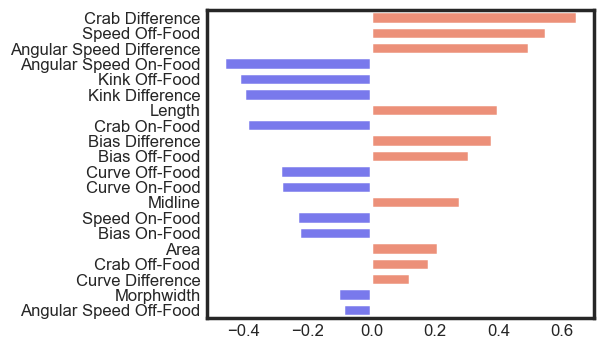

In [152]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR Phenotypes Correlations PDScreen"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 4))
plt.gca().xaxis.grid(False)
ax = sns.barplot(y= 'index', 
                x = 'Speed Difference', 
                data = BSR_Screen_Correlations.head(20), #<--------------- Input Here -------------
                orient = 'h',
                hue = 'Direction',
                 palette = ['#6666ff','#ff8566'],
                 legend = False,
               linewidth = 2.5, 
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [170]:
GeneExpression_BSR_Neurons = pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/CENGEN_Correlations/GenesExpressingNeurotransmitterExpression.csv')
GeneExpression_BSR_Neurons

Gene                       Category          ADE         AIM  \
0     bas-1             Amine Transmission   747.493636    0.000000   
1     cat-1             Amine Transmission   869.493189    0.000000   
2     cat-2          Dopamine Transmission  1404.314170    0.000000   
3     dop-1              Dopamine Receptor    86.346325   60.395326   
4     dop-2              Dopamine Receptor   722.163097    0.000000   
5     dop-3              Dopamine Receptor     0.000000    0.000000   
6     dop-4              Dopamine Receptor     0.000000  118.657627   
7     tph-1         Serotonin Transmission     0.000000    0.000000   
8     mod-5         Serotonin Transmission     0.000000  515.922743   
9     mod-1             Serotonin Receptor   118.359755  617.437685   
10    ser-1             Serotonin Receptor     0.000000   48.263495   
11    ser-4             Serotonin Receptor    66.005365    0.000000   
12    ser-5             Serotonin Receptor     0.000000  151.334079   
13    ser-7             Serotonin Receptor     0.000000    0.000000   
14    tdc-1          Tyramine Transmission     0.000000    0.000000   
15   01-Oct          Tyramine Transmission     0.000000    0.000000   
16    tbh-1        Octopamine Transmission     0.000000    0.000000   
17    ser-3            Octopamine Receptor     0.000000    0.000000   
18    ser-6            Octopamine Receptor   154.351219    0.000000   
19   octr-1            Octopamine Receptor     0.000000    0.000000   
20    snf-3           Betaine Transmission     0.000000  102.011908   
21    eat-4         Glutamate Transmission     0.000000  189.062857   
22    glr-1  Glutamate Receptor (non-NMDA)     0.000000    0.000000   
23    glr-2  Glutamate Receptor (non-NMDA)     0.000000    0.000000   
24    glr-4  Glutamate Receptor (non-NMDA)     0.000000    0.000000   
25    glr-5  Glutamate Receptor (non-NMDA)     0.000000  100.382941   
26    nmr-1      Glutamate Receptor (NMDA)     0.000000    0.000000   
27    nmr-2      Glutamate Receptor (NMDA)     0.000000    0.000000   
28    glr-3     Glutamate Receptor (Other)     0.000000    0.000000   
29    glr-6     Glutamate Receptor (Other)     0.000000    0.000000   
30    glr-7     Glutamate Receptor (Other)     0.000000    0.000000   
31    glr-8     Glutamate Receptor (Other)     0.000000    0.000000   
32   unc-25              GABA Transmission   229.345945    0.000000   
33   unc-47              GABA Transmission     0.000000    0.000000   
34   snf-11              GABA Transmission     0.000000    0.000000   
35   unc-49                  GABA Receptor    95.345858    0.000000   
36    exp-1                  GABA Receptor   887.853219    0.000000   
37    gab-1                  GABA Receptor     0.000000    0.000000   
38   lgc-38                  GABA Receptor     0.000000  371.064038   
39  srsx-33                  GABA Receptor     0.000000    0.000000   
40    cha-1     Acetylcholine Transmission     0.000000    0.000000   
41    cho-1     Acetylcholine Transmission     0.000000    0.000000   
42   unc-17     Acetylcholine Transmission     0.000000    0.000000   
43   unc-29         Acetylcholine Receptor     0.000000    0.000000   
44   unc-38         Acetylcholine Receptor   150.363375   94.951355   
45   unc-63         Acetylcholine Receptor    34.480516   44.881690   
46    deg-3         Acetylcholine Receptor     0.000000    0.000000   
47    des-2         Acetylcholine Receptor     0.000000    0.000000   
48    acr-8         Acetylcholine Receptor     0.000000    0.000000   
49   acr-16         Acetylcholine Receptor     0.000000    0.000000   
50    acc-1         Acetylcholine Receptor     0.000000    0.000000   
51    acc-2         Acetylcholine Receptor    49.519688   97.054363   
52    acc-3         Acetylcholine Receptor     0.000000    0.000000   
53    acc-4         Acetylcholine Receptor     0.000000    0.000000   
54    gar-1         Acetylcholine Receptor   128.605836    0.000000   
55    gar-2         Acetylcholi

In [171]:
GeneExpressionCategories = GeneExpression_BSR_Neurons.pop("Category")
GeneExpressionCategories.unique()

array(['Amine Transmission', 'Dopamine Transmission', 'Dopamine Receptor',
       'Serotonin Transmission', 'Serotonin Receptor',
       'Tyramine Transmission', 'Octopamine Transmission',
       'Octopamine Receptor', 'Betaine Transmission',
       'Glutamate Transmission', 'Glutamate Receptor (non-NMDA)',
       'Glutamate Receptor (NMDA)', 'Glutamate Receptor (Other)',
       'GABA Transmission', 'GABA Receptor', 'Acetylcholine Transmission',
       'Acetylcholine Receptor'], dtype=object)

In [172]:
lut = dict(zip(GeneExpressionCategories.unique(),
                ["darkslategray",
                 "seagreen", "mediumseagreen",
                 "royalblue", "cornflowerblue",
                 "mediumpurple",
                 "steelblue",
                 "darkviolet","mediumorchid",
                 "darkgoldenrod","goldenrod","tan","burlywood",
                 "purple","mediumpurple",
                 "crimson","palevioletred"]))
row_colors = GeneExpressionCategories.map(lut)

In [173]:
row_labels = GeneExpression_BSR_Neurons.pop("Gene")
row_labels 

0       bas-1
1       cat-1
2       cat-2
3       dop-1
4       dop-2
5       dop-3
6       dop-4
7       tph-1
8       mod-5
9       mod-1
10      ser-1
11      ser-4
12      ser-5
13      ser-7
14      tdc-1
15     01-Oct
16      tbh-1
17      ser-3
18      ser-6
19     octr-1
20      snf-3
21      eat-4
22      glr-1
23      glr-2
24      glr-4
25      glr-5
26      nmr-1
27      nmr-2
28      glr-3
29      glr-6
30      glr-7
31      glr-8
32     unc-25
33     unc-47
34     snf-11
35     unc-49
36      exp-1
37      gab-1
38     lgc-38
39    srsx-33
40      cha-1
41      cho-1
42     unc-17
43     unc-29
44     unc-38
45     unc-63
46      deg-3
47      des-2
48      acr-8
49     acr-16
50      acc-1
51      acc-2
52      acc-3
53      acc-4
54      gar-1
55      gar-2
56      gar-3
Name: Gene, dtype: object

In [164]:
row_labels 

0       bas-1
1       cat-1
2       cat-2
3       dop-1
4       dop-2
5       dop-3
6       dop-4
7       tph-1
8       mod-5
9       mod-1
10      ser-1
11      ser-4
12      ser-5
13      ser-7
14      tdc-1
15      oct-1
16      tbh-1
17      ser-3
18      ser-6
19     octr-1
20      snf-3
21      eat-4
22      glr-1
23      glr-2
24      glr-4
25      glr-5
26      nmr-1
27      nmr-2
28      glr-3
29      glr-6
30      glr-7
31      glr-8
32     unc-25
33     unc-47
34     snf-11
35     unc-49
36      exp-1
37      gab-1
38     lgc-38
39    srsx-33
40      cha-1
41      cho-1
42     unc-17
43     unc-29
44     unc-38
45     unc-63
46      deg-3
47      des-2
48      acr-8
49     acr-16
50      acc-1
51      acc-2
52      acc-3
53      acc-4
54      gar-1
55      gar-2
56      gar-3
Name: Gene, dtype: object

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 5000x5000 with 0 Axes>

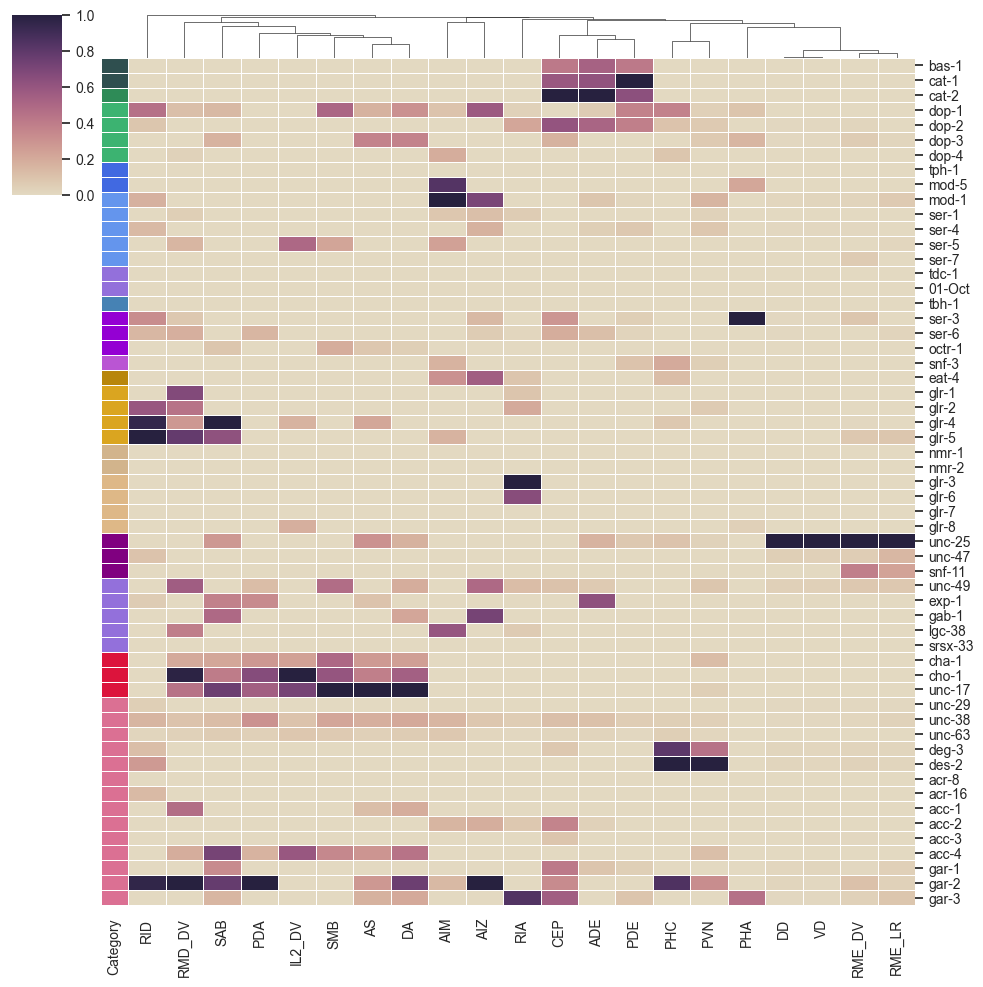

In [175]:
# sns.set_context('notebook')
sns.set_theme(style="white")

plt.figure(figsize = (50,50)) 
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10) 
ax = sns.clustermap(data = GeneExpression_BSR_Neurons, 
                 linewidths = 0.5, 
                 cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
                 square=True,
                #  cbar=False,
                 row_cluster=False,
                 row_colors=row_colors,
                 # xticklabels = 1,
                 yticklabels = row_labels,
                 standard_scale=1,
                 dendrogram_ratio=(0.1, .05),
                #  yticklabels = 1,
                )

# ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('/Users/Joseph/Desktop/BSRScreen_CenGEN_Correlation_GeneExpressions.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Now, Feature Engineering and Clustering

### Feature Selection/Removal by Correlation

In [91]:
# PD_DataWithCenGEN = PD_DataWithCenGEN[PD_DataWithCenGEN.Category != 'CONTROL (WT)']
# PD_DataWithCenGEN = PD_DataWithCenGEN.drop(columns = ['Worm Gene','Human Gene'])
PD_DataWithCenGEN_Categories = PD_DataWithCenGEN.pop('Category')
PD_DataWithCenGEN

Gene    Length   Midline     Width  Morphwidth      Area  \
0           GALC•C29E4.10  0.517831  1.091403  1.626410    0.629774  0.734510   
1           KPNA1•F53B2.5 -0.429558 -0.533616 -0.213476    0.152934 -0.143104   
2         RNF141•F54B11.5 -0.290355 -0.039982  0.496293   -0.668895 -0.638349   
4    FAM49B\CYRIB•R07G3.8 -0.143239 -0.588886 -1.029085   -0.235422 -0.252785   
5          IGSF9B•SSSD1.1 -1.113001 -1.221517  0.030610    0.190169 -0.679577   
..                    ...       ...       ...       ...         ...       ...   
99          SCARB2•scav-1 -1.692114 -2.246826 -1.429146   -0.643293 -1.555483   
100         WBSCR17•gly-7 -1.669936 -2.082908 -1.398373   -1.209039 -1.764676   
101          GIGYF2•gyf-1 -1.302163 -2.193614 -3.371285   -1.789860 -1.921505   
102          SYNJ1•unc-26 -1.082697 -1.078503 -0.715610   -0.228204 -1.334535   
103             DAT•dat-1 -0.331869 -0.388785 -0.339273   -0.470703 -0.554339   

     Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  \
0          0.349462                0.286067      -0.076228        0.479489   
1         -0.491249               -0.046602      -0.554485        0.071677   
2         -0.330638               -0.015881      -0.406797        0.790494   
4         -0.986024               -1.567153       0.010129       -1.544102   
5         -0.749463                0.412167      -1.014704        0.257137   
..              ...                     ...            ...             ...   
99        -1.348022               -0.392279      -0.371128       -2.580495   
100       -0.296843                0.264935       0.043726        0.006052   
101       -1.325387               -2.429190       1.564263       -2.080976   
102       -1.780722               -0.470100      -1.287345       -0.427950   
103       -0.195841               -0.033610      -1.001300       -0.078542   

     Crab Off-Food  Kink Off-Food  Speed On-Food  Angular Speed On-Food  \
0         0.631385       0.715583       0.008288               1.001102   
1        -0.298900       0.320884      -1.110508              -0.779681   
2        -0.112602       0.796821      -0.735726              -0.264076   
4        -1.993329      -1.034126      -2.020191              -1.894726   
5        -0.320599       0.779174      -0.848952              -0.198457   
..             ...            ...            ...                    ...   
99       -1.528704      -1.120457      -2.363851              -1.133539   
100      -0.019074      -0.169709       0.233564               0.066407   
101      -2.485975      -2.693466      -0.631834              -0.893225   
102      -2.924795       0.064889      -0.343886               0.030107   
103      -0.360042      -0.115526      -0.197102               0.129291   

     Bias On-Food  Curve On-Food  Crab On-Food  Kink On-Food  \
0       -0.271929       0.907889      0.898328      1.275942   
1       -0.647912      -0.276367     -0.782528     -0.005790   
2        0.105538       0.658608     -0.564233      0.695492   
4       -2.066289      -1.356235     -2.214352     -0.053572   
5       -0.638973      -0.441848     -0.720786      0.283916   
..            ...            ...           ...           ...   
99      -2.030137      -1.588722     -2.023509     -0.108632   
100      0.879652      -1.271774     -0.239399     -1.763942   
101      0.498634      -1.669216     -1.186566     -2.016308   
102     -0.523249      -0.176907     -0.383043      0.082851   
103     -0.453190       0.040792     -0.115123      0.378005   

     Speed Difference  Angular Speed Difference  Bias Difference  \
0            0.397975                 -1.028424         0.239683   
1           -0.009826                  0.994395         0.055438   
2            0.493278                  0.231977        -0.307585   
4            1.206324                 -0.525239         2.905321   
5            0.462140                  1.081593         0.301920   
..                ...            

In [93]:
# PD_DataWithCenGEN_Categories = PD_DataWithCenGEN.pop('Category')
# PD_DataWithCenGEN
PD_DataWithCenGEN_Categories

0          GWAS
1          GWAS
2          GWAS
4          GWAS
5          GWAS
         ...   
99         GWAS
100        GWAS
101        PARK
102        PARK
103    DOPAMINE
Name: Category, Length: 103, dtype: object

In [92]:
PD_DataWithCenGEN = PD_DataWithCenGEN.set_index('Gene')
PD_DataWithCenGEN

Length   Midline     Width  Morphwidth      Area  \
Gene                                                                       
GALC•C29E4.10         0.517831  1.091403  1.626410    0.629774  0.734510   
KPNA1•F53B2.5        -0.429558 -0.533616 -0.213476    0.152934 -0.143104   
RNF141•F54B11.5      -0.290355 -0.039982  0.496293   -0.668895 -0.638349   
FAM49B\CYRIB•R07G3.8 -0.143239 -0.588886 -1.029085   -0.235422 -0.252785   
IGSF9B•SSSD1.1       -1.113001 -1.221517  0.030610    0.190169 -0.679577   
...                        ...       ...       ...         ...       ...   
SCARB2•scav-1        -1.692114 -2.246826 -1.429146   -0.643293 -1.555483   
WBSCR17•gly-7        -1.669936 -2.082908 -1.398373   -1.209039 -1.764676   
GIGYF2•gyf-1         -1.302163 -2.193614 -3.371285   -1.789860 -1.921505   
SYNJ1•unc-26         -1.082697 -1.078503 -0.715610   -0.228204 -1.334535   
DAT•dat-1            -0.331869 -0.388785 -0.339273   -0.470703 -0.554339   

                      Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  \
Gene                                                                          
GALC•C29E4.10               0.349462                0.286067      -0.076228   
KPNA1•F53B2.5              -0.491249               -0.046602      -0.554485   
RNF141•F54B11.5            -0.330638               -0.015881      -0.406797   
FAM49B\CYRIB•R07G3.8       -0.986024               -1.567153       0.010129   
IGSF9B•SSSD1.1             -0.749463                0.412167      -1.014704   
...                              ...                     ...            ...   
SCARB2•scav-1              -1.348022               -0.392279      -0.371128   
WBSCR17•gly-7              -0.296843                0.264935       0.043726   
GIGYF2•gyf-1               -1.325387               -2.429190       1.564263   
SYNJ1•unc-26               -1.780722               -0.470100      -1.287345   
DAT•dat-1                  -0.195841               -0.033610      -1.001300   

                      Curve Off-Food  Crab Off-Food  Kink Off-Food  \
Gene                                                                 
GALC•C29E4.10               0.479489       0.631385       0.715583   
KPNA1•F53B2.5               0.071677      -0.298900       0.320884   
RNF141•F54B11.5             0.790494      -0.112602       0.796821   
FAM49B\CYRIB•R07G3.8       -1.544102      -1.993329      -1.034126   
IGSF9B•SSSD1.1              0.257137      -0.320599       0.779174   
...                              ...            ...            ...   
SCARB2•scav-1              -2.580495      -1.528704      -1.120457   
WBSCR17•gly-7               0.006052      -0.019074      -0.169709   
GIGYF2•gyf-1               -2.080976      -2.485975      -2.693466   
SYNJ1•unc-26               -0.427950      -2.924795       0.064889   
DAT•dat-1                  -0.078542      -0.360042      -0.115526   

                      Speed On-Food  Angular Speed On-Food  Bias On-Food  \
Gene                                                                       
GALC•C29E4.10              0.008288               1.001102     -0.271929   
KPNA1•F53B2.5             -1.110508              -0.779681     -0.647912   
RNF141•F54B11.5           -0.735726              -0.264076      0.105538   
FAM49B\CYRIB•R07G3.8      -2.020191              -1.894726     -2.066289   
IGSF9B•SSSD1.1            -0.848952              -0.198457     -0.638973   
...                             ...                    ...           ...   
SCARB2•scav-1             -2.363851              -1.133539     -2.030137   
WBSCR17•gly-7              0.233564               0.066407      0.879652   
GIGYF2•gyf-1              -0.631834              -0.893225      0.498634   
SYNJ1•unc-26              -0.343886               0.030107     -0.523249   
DAT•dat-1                 -0.197102               0.129291     -0.453190   

                      Curve On-Food  Crab On-Food  Kink On-Food  \
Gene                                    

In [94]:
# Calculate the correlation matrix
correlation_matrix = PD_DataWithCenGEN.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Identify and remove highly correlated features among independent variables
# (e.g., absolute correlation > 0.8)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8 and correlation_matrix.columns[i] != 'target' and correlation_matrix.columns[j] != 'target':
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

features_to_keep = [col for col in PD_DataWithCenGEN.columns if col not in correlated_features and col != 'target']
print("\nFeatures to keep after removing highly inter-correlated features:\n", features_to_keep)

Correlation Matrix:
                  Length   Midline     Width  Morphwidth      Area  \
Length         1.000000  0.914418  0.145975    0.142959  0.734869   
Midline        0.914418  1.000000  0.489778    0.331748  0.806861   
Width          0.145975  0.489778  1.000000    0.584802  0.470523   
Morphwidth     0.142959  0.331748  0.584802    1.000000  0.752299   
Area           0.734869  0.806861  0.470523    0.752299  1.000000   
...                 ...       ...       ...         ...       ...   
VC_4_5        -0.130385 -0.051031  0.090494    0.269187  0.089269   
VD_DD         -0.430478 -0.240930  0.139240    0.277699 -0.129660   
Vulval_cells  -0.179382 -0.087261  0.033659    0.095957 -0.056276   
Vulval_muscle -0.248677 -0.121052  0.068540    0.171608 -0.043593   
XXX           -0.094447 -0.067710  0.065005    0.304441  0.126925   

               Speed Off-Food  Angular Speed Off-Food  Bias Off-Food  \
Length               0.589638               -0.267723       0.538240   
Midlin

In [95]:
Features_Selected = PD_DataWithCenGEN[features_to_keep]
Features_Selected

Length     Width  Morphwidth  Speed Off-Food  \
Gene                                                                   
GALC•C29E4.10         0.517831  1.626410    0.629774        0.349462   
KPNA1•F53B2.5        -0.429558 -0.213476    0.152934       -0.491249   
RNF141•F54B11.5      -0.290355  0.496293   -0.668895       -0.330638   
FAM49B\CYRIB•R07G3.8 -0.143239 -1.029085   -0.235422       -0.986024   
IGSF9B•SSSD1.1       -1.113001  0.030610    0.190169       -0.749463   
...                        ...       ...         ...             ...   
SCARB2•scav-1        -1.692114 -1.429146   -0.643293       -1.348022   
WBSCR17•gly-7        -1.669936 -1.398373   -1.209039       -0.296843   
GIGYF2•gyf-1         -1.302163 -3.371285   -1.789860       -1.325387   
SYNJ1•unc-26         -1.082697 -0.715610   -0.228204       -1.780722   
DAT•dat-1            -0.331869 -0.339273   -0.470703       -0.195841   

                      Angular Speed Off-Food  Bias Off-Food  Curve Off-Food  \
Gene                                                                          
GALC•C29E4.10                       0.286067      -0.076228        0.479489   
KPNA1•F53B2.5                      -0.046602      -0.554485        0.071677   
RNF141•F54B11.5                    -0.015881      -0.406797        0.790494   
FAM49B\CYRIB•R07G3.8               -1.567153       0.010129       -1.544102   
IGSF9B•SSSD1.1                      0.412167      -1.014704        0.257137   
...                                      ...            ...             ...   
SCARB2•scav-1                      -0.392279      -0.371128       -2.580495   
WBSCR17•gly-7                       0.264935       0.043726        0.006052   
GIGYF2•gyf-1                       -2.429190       1.564263       -2.080976   
SYNJ1•unc-26                       -0.470100      -1.287345       -0.427950   
DAT•dat-1                          -0.033610      -1.001300       -0.078542   

                      Speed On-Food  Angular Speed On-Food  Bias On-Food  \
Gene                                                                       
GALC•C29E4.10              0.008288               1.001102     -0.271929   
KPNA1•F53B2.5             -1.110508              -0.779681     -0.647912   
RNF141•F54B11.5           -0.735726              -0.264076      0.105538   
FAM49B\CYRIB•R07G3.8      -2.020191              -1.894726     -2.066289   
IGSF9B•SSSD1.1            -0.848952              -0.198457     -0.638973   
...                             ...                    ...           ...   
SCARB2•scav-1             -2.363851              -1.133539     -2.030137   
WBSCR17•gly-7              0.233564               0.066407      0.879652   
GIGYF2•gyf-1              -0.631834              -0.893225      0.498634   
SYNJ1•unc-26              -0.343886               0.030107     -0.523249   
DAT•dat-1                 -0.197102               0.129291     -0.453190   

                      Speed Difference  Angular Speed Difference  \
Gene                                                               
GALC•C29E4.10                 0.397975                 -1.028424   
KPNA1•F53B2.5                -0.009826                  0.994395   
RNF141•F54B11.5               0.493278                  0.231977   
FAM49B\CYRIB•R07G3.8          1.206324                 -0.525239   
IGSF9B•SSSD1.1                0.462140                  1.081593   
...                                ...                       ...   
SCARB2•scav-1                 0.936744                  0.354070   
WBSCR17•gly-7                -0.417949                  0.212412   
GIGYF2•gyf-1                 -0.448923                 -1.314594   
SYNJ1•unc-26                 -2.292131                 -2.931450   
DAT•dat-1                    -0.126589                 -0.250036   

                      Bias Difference  Curve Difference  Kink Difference  \
Gene                                                                       
GALC•C29E4.10                0.23

In [96]:
import umap
from sklearn.preprocessing import StandardScaler

In [97]:
scaled_data = StandardScaler().fit_transform(Features_Selected)

In [101]:
# n_neighbors 2 or 3
reducer = umap.UMAP(n_neighbors=2)

In [102]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(103, 2)

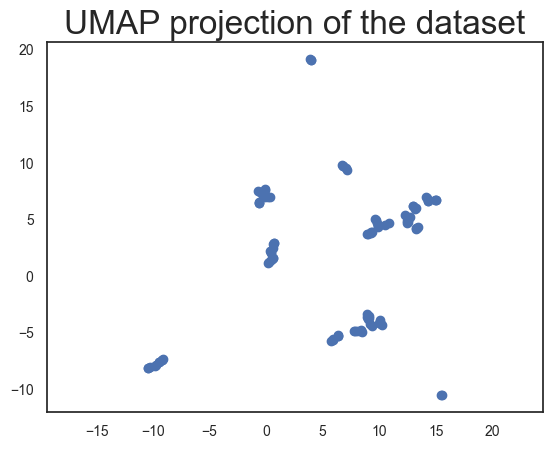

In [103]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    # c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);

### HBDSCAN

In [104]:
import hdbscan
from sklearn.cluster import HDBSCAN
from sklearn.datasets import make_blobs
import textalloc as ta

In [105]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=3)

In [106]:
clusterer.fit(embedding)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(min_cluster_size=2, min_samples=3)

In [107]:
clusterer.labels_

array([ 1,  0,  6,  5, -1,  3, 11,  0,  9,  6,  9,  9,  1,  1,  1,  1,  1,
        8,  2,  1,  9, 10,  1, 10, 12, 10,  0, 10,  7,  6,  2,  2, 11,  6,
        6,  8, 12,  7, 12,  2,  1,  2,  3,  4, -1, -1,  2,  5,  3,  6,  6,
       -1,  6, 11,  5,  5,  2,  9,  0,  1,  2,  6,  8,  9,  2,  0, 12, -1,
       12,  9,  5,  2, 11,  1,  5,  8,  6,  0,  3,  3,  0,  0,  1,  2,  7,
        6,  4,  0,  2, 12,  3,  4,  4,  7,  6,  7,  7,  0,  2, 12,  4,  7,
        1])

In [108]:
clusterer.labels_.max()

np.int64(12)

In [110]:
cluster = pd.DataFrame(embedding, columns = ['x','y'])
cluster['cluster']=clusterer.labels_
cluster['Gene'] = Features_Selected.index
cluster[['Human Gene','Worm Gene']] = cluster.Gene.str.split("•", expand=True)
cluster

x          y  cluster                  Gene    Human Gene  \
0    -0.084189   6.929532        1         GALC•C29E4.10          GALC   
1    -9.481382  -7.663441        0         KPNA1•F53B2.5         KPNA1   
2     9.319472   3.744375        6       RNF141•F54B11.5        RNF141   
3     8.449247  -4.983676        5  FAM49B\CYRIB•R07G3.8  FAM49B\CYRIB   
4     3.941586  19.117050       -1        IGSF9B•SSSD1.1        IGSF9B   
..         ...        ...      ...                   ...           ...   
98    0.391607   1.397957        2         SCARB2•scav-1        SCARB2   
99   12.265964   5.348796       12         WBSCR17•gly-7       WBSCR17   
100   6.826156   9.737724        4          GIGYF2•gyf-1        GIGYF2   
101   9.077997  -3.722517        7          SYNJ1•unc-26         SYNJ1   
102  -0.110370   7.556546        1             DAT•dat-1           DAT   

    Worm Gene  
0    C29E4.10  
1     F53B2.5  
2    F54B11.5  
3     R07G3.8  
4     SSSD1.1  
..        ...  
98     scav-1  
99      gly-7  
100     gyf-1  
101    unc-26  
102     dat-1  

[103 rows x 6 columns]

In [127]:
list = ['black',
        '#8dd3c7',
        '#ffffb3',
        '#bebada',
        '#fb8072',
        '#80b1d3',
        '#fdb462',
        '#b3de69',
        '#fccde5',
        '#d9d9d9',
        '#bc80bd',
        '#ccebc5',
        '#ffed6f',
        '#b15928']

<Figure size 640x480 with 0 Axes>

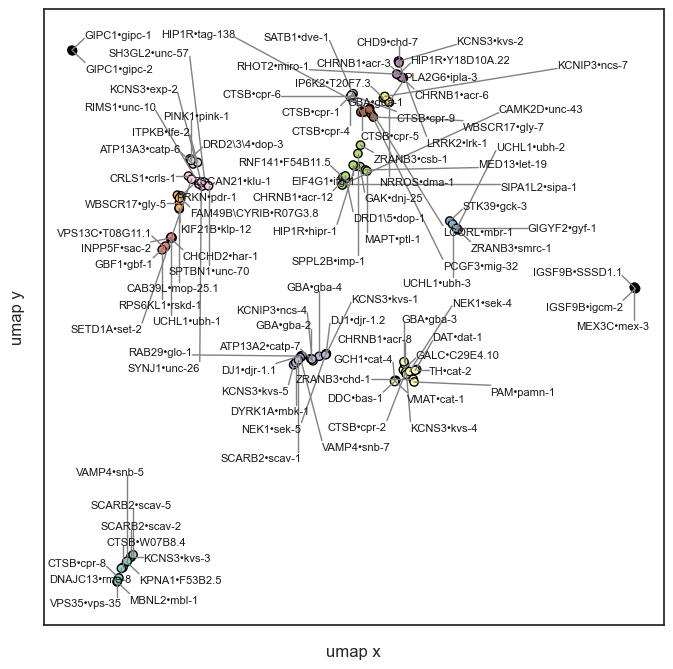

In [150]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR Phenotypes Correlations PDScreen"
sns.set_context("notebook")
plt.figure(linewidth = 1)
plt.figure(figsize=(8, 8))
plt.gca().xaxis.grid(False)
ax = sns.scatterplot(y= 'x', 
                x = 'y', 
                data = cluster,
                hue = 'cluster',
                palette = list,
                legend = False,
                linewidth = 1,
                edgecolor="black",    
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:], fontsize = 18)
plt.xlabel("umap x")
# plt.xticks(rotation=90)
plt.ylabel("umap y")
# plt.ylim(top = 14, bottom = 4)
# plt.xlim(left = 0, right = 12)
plt.title("")
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.tick_params(axis='both', labelsize=12, length = 1)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
ta.allocate(ax,cluster.y,cluster.x,
            cluster.Gene,
            x_scatter=cluster.y, y_scatter=cluster.x,
            textsize=8, min_distance= 0.02, max_distance=0.5,avoid_label_lines_overlap=True, linecolor='grey', margin = 0.01, nbr_candidates=500)
plt.savefig('/Users/Joseph/Desktop/BSRScreen_HDBSCAN_Cluster.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [151]:
cluster.to_csv('/Users/Joseph/Desktop/BSR_PDScreen_HDBSCAN_Clusters.csv')

In [ ]:
BSR_Tstat_orthology_cluster = BSR_Tstat_orthology.replace('NEGATIVE','DOPAMINE').drop(columns=['Human Gene','Worm Gene'])
print(BSR_Tstat_orthology_cluster.Category.unique())

In [ ]:
colours = ['grey',sns.color_palette()[1],sns.color_palette()[2]]

In [ ]:
BSR_Tstat_orthology_cluster.Category.unique()

In [ ]:
Gene = BSR_Tstat_orthology_cluster.pop("Gene")
Category = BSR_Tstat_orthology_cluster.pop("Category")
lut = dict(zip(tuple(Category.unique()),colours))
print(lut)
row_colors = Category.map(lut)

In [ ]:
BSR_Tstat_orthology_cluster

In [ ]:
sns.set_context('notebook')
# plt.figure(figsize = (100,70))
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12) 
ax = sns.clustermap(data = BSR_Tstat_orthology_cluster, 
                    figsize=(10,20),
                    linewidth = 0.5, 
                    cmap = "vlag", 
                    center = 0, 
                    vmax = 2.5,
                    vmin = -2.5, 
                    col_cluster=False,
                    dendrogram_ratio=(0.2,0),
                    cbar_pos=None,
                    metric='correlation',
                    method='complete',
                 # xticklabels = 1,
                    # cbar_kws = {"shrink": .01,
                    #          # "label": "Normalized Behaviour Score"
                    #         }
                   )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [ ]:
Category_reordered=Category.reindex(ax.dendrogram_row.reordered_ind)
print(Category_reordered)
# print("-"*50)
# print(Category)
lut = dict(zip(tuple(Category.unique()),colours))
# # print(lut)
# # # print("-"*50)
row_colors = Category_reordered.map(lut)
# print(row_colors)

In [ ]:
print(type(Gene))
print(ax.dendrogram_row.reordered_ind)

In [ ]:
sns.set_context('notebook')
# plt.figure(figsize = (100,70))
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12) 
ax = sns.clustermap(data = BSR_Tstat_orthology_cluster, 
                    figsize=(10,20),
                    linewidth = 0.5, 
                    cmap = "vlag", 
                    center = 0, 
                    vmax = 2.5,
                    vmin = -2.5, 
                    col_cluster=False,
                    row_colors=row_colors.reset_index().Category,
                    dendrogram_ratio=(0.1,0),
                    cbar_pos=None,
                    yticklabels=Gene.reindex(ax.dendrogram_row.reordered_ind),
                    metric='correlation',
                    method='complete',
                 # xticklabels = 1,
                    # cbar_kws = {"shrink": .01,
                    #          # "label": "Normalized Behaviour Score"
                    #         }
                   )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_clustermap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

# Stats stuff here